## Initial Installation 


In [1]:
# ! py -m pip install -U nbopen   # Install to open ipynb straight away
# ! py -m nbopen.install_win

In [2]:
# ! pip install missingno       # install the missingo for the Jupyter notebook
# ! pip install mplcursors

##  Import libraries and Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import mplcursors  # import the mplcursors library

import json
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mtick
import matplotlib.dates as mdates

from matplotlib.lines import Line2D

In [6]:
amazon = pd.read_csv('Amazon Sale Report.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Amazon Sale Report.csv'

## Dataset exploration using Pandas


In [7]:
amazon.info()

NameError: name 'amazon' is not defined

In [ ]:
amazon.set_index('index', inplace = True)

In [ ]:
msno.matrix(amazon)

In this graph, we can see each column and the missing data points, We can see that the last column `Unnamed:22` has nearly a half missing. So it requires a much closer inspection.

In [ ]:
amazon.nunique() # check if the datapoints are unique

In [ ]:
amazon.apply(pd.unique)

Here we can notice that `Unnamed:22` has only one unique value, which is 'False'. This suggests we can remove this column as it provides no use. 

Similar logic can be applied to `ship-country`, `currency` and `fulfilled-by` and we therefore can drop these columns.


In [ ]:
amazon.drop(columns = ['Unnamed: 22','ship-country', 'currency','fulfilled-by'], inplace = True)

This leaves us with 19 columns. 

In [ ]:
amazon.info()

## Dupplicates removal

In [ ]:
print("Before: ",len(amazon))
amazon.drop_duplicates(inplace = True)   # duplicate removal
print("After: ",len(amazon))

Now I would like to look into datapoints with null values for each column and see if we can replace. 

We will start with `Courier Status` , `Amount`, `promotion-ids`.

In [ ]:
amazon[amazon['Courier Status'].isnull()]

For the `Courier Status` we only had three options -> nan, Shipped, Cancelled, Unshipped.

It would therefore make sense to replace all the missing values with Unknown

In [14]:
amazon['Courier Status'].fillna('Unknown', inplace = True) 

For the `promotion-ids` we only had three options -> nan, Shipped, Cancelled, Unshipped.

It would therefore make sense to replace all the missing values with Unknown

In [15]:
amazon['promotion-ids'].fillna('No Promotion', inplace = True)


In [16]:
amazon[amazon['Amount'].isnull()]

Order ID      Date     Status Fulfilment Sales Channel   \
index                                                                        
8       407-5443024-5233168  04-30-22  Cancelled     Amazon      Amazon.in   
29      404-5933402-8801952  04-30-22  Cancelled   Merchant      Amazon.in   
65      171-4137548-0481151  04-30-22  Cancelled     Amazon      Amazon.in   
84      403-9950518-0349133  04-30-22  Cancelled     Amazon      Amazon.in   
95      405-9112089-3379536  04-30-22  Cancelled     Amazon      Amazon.in   
...                     ...       ...        ...        ...            ...   
128903  406-3923120-4345139  05-31-22  Cancelled     Amazon      Amazon.in   
128907  403-6757403-6097100  05-31-22  Cancelled     Amazon      Amazon.in   
128908  403-6757403-6097100  05-31-22  Cancelled     Amazon      Amazon.in   
128958  408-9513596-4393945  05-31-22  Cancelled     Amazon      Amazon.in   
128967  404-5182288-1653947  05-31-22  Cancelled     Amazon      Amazon.in   

       ship-service-level    Style                  SKU Category Size  \
index                                                                   
8               Expedited   SET200  SET200-KR-NP-A-XXXL      Set  3XL   
29               Standard  JNE2132  JNE2132-KR-398-XXXL    kurta  3XL   
65              Expedited  JNE3373       JNE3373-KR-XXL    kurta  XXL   
84              Expedited  JNE3510         JNE3510-KR-M    kurta    M   
95              Expedited  JNE3405         JNE3405-KR-L    kurta    L   
...                   ...      ...                  ...      ...  ...   
128903          Expedited  JNE3801         JNE3801-KR-M    kurta    M   
128907          Expedited    NW014     NW014-ST-SR-XXXL      Set  3XL   
128908          Expedited    NW007     NW007-ST-CP-XXXL      Set  3XL   
128958          Expedited   SET058       SET058-KR-NP-L      Set    L   
128967          Expedited  JNE3638        JNE3638-KR-XS    kurta   XS   

              ASIN Courier Status  Qty  Amount      ship-city      ship-state  \
index                                                                           
8       B08L91ZZXN      Cancelled    0     NaN      HYDERABAD       TELANGANA   
29      B07JG3CND8        Unknown    0     NaN       GUWAHATI           ASSAM   
65      B082W8RWN1      Cancelled    0     NaN          Dahod         Gujarat   
84      B08WPR5MCB      Cancelled    0     NaN      HYDERABAD       TELANGANA   
95      B081WSCKPQ      Cancelled    0     NaN           PUNE     MAHARASHTRA   
...            ...            ...  ...     ...            ...             ...   
128903  B09SDZ4FH9      Cancelled    0     NaN      ANANTAPUR  ANDHRA PRADESH   
128907  B0928ZT74Y      Cancelled    0     NaN  GREATER NOIDA   UTTAR PRADESH   
128908  B0928YCMQP      Cancelled    0     NaN  GREATER NOIDA   UTTAR PRADESH   
128958  B07R487XRD      Cancelled    0     NaN      Bengaluru       KARNATAKA   
128967  B09814Q3QH      Cancelled    0     NaN        Kolkata     WEST BENGAL   

        ship-postal-code                                 promotion-ids    B2B  
index                                                                          
8               500008.0  IN Core Free Shipping 2015/04/08 23-48-5-108  False  
29              781003.0                                  No Promotion  False  
65              389151.0                                  No Promotion  False  
84              500072.0                                  No Promotion  False  
95              411046.0                                  No Promotion  False  
...                  ...                                           ...    ...  
128903          515001.0                                  No Promotion  False  
128907          201306.0                                  No Promotion  False  
128908          201306.0                                  No Promotion  False  
128958          560037.0                                  No Promotion  False  
128967          700040.0                

In [17]:
amazon = amazon.dropna(subset=['Amount'])

In [18]:
amazon['ship-city'].fillna('Unknown', inplace = True)
amazon['ship-state'].fillna('Unknown', inplace = True)
amazon['ship-postal-code'].fillna('Unknown', inplace = True)

<AxesSubplot:>

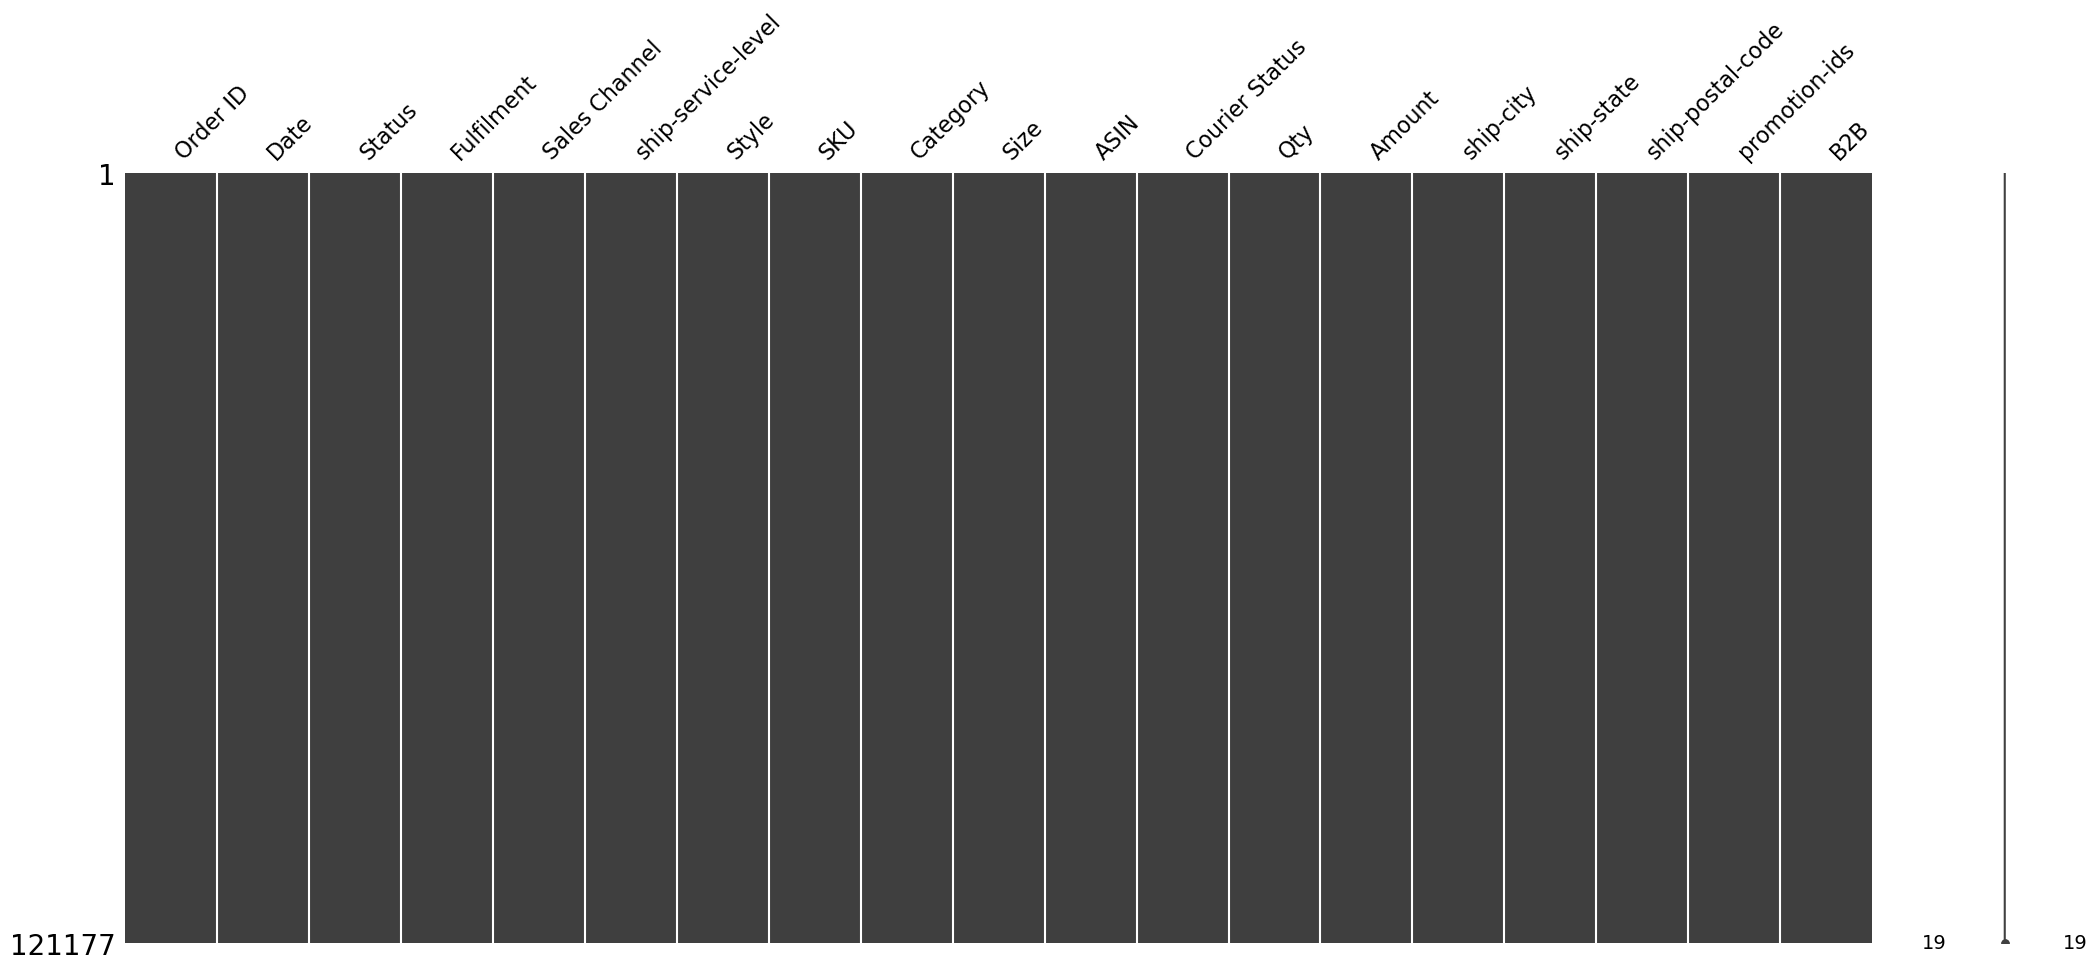

In [19]:
msno.matrix(amazon)

Finally, we get a clean dataset with no missing values, which makes the msno.matrix look complete.

## Column Names

In [20]:
new_names = {'Order ID':'order_id','Sales Channel ':'amazon_or_3rd_party', 'Date':'date', 'Status':'shipping_status','Fulfilment':'fullfilment', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_status', 'Qty':'quantity_ordered', 'Amount':'order_amount', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 'promotion-ids':'promotion','B2B':'business' }
amazon.rename(columns = new_names, inplace = True)
amazon.head()

order_id      date               shipping_status  \
index                                                                
0      405-8078784-5731545  04-30-22                     Cancelled   
1      171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      404-0687676-7273146  04-30-22                       Shipped   
3      403-9615377-8133951  04-30-22                     Cancelled   
4      407-1069790-7240320  04-30-22                       Shipped   

      fullfilment amazon_or_3rd_party ship-service-level    style  \
index                                                               
0        Merchant           Amazon.in           Standard   SET389   
1        Merchant           Amazon.in           Standard  JNE3781   
2          Amazon           Amazon.in          Expedited  JNE3371   
3        Merchant           Amazon.in           Standard    J0341   
4          Amazon           Amazon.in          Expedited  JNE3671   

                   sku product_category size        asin courier_status  \
index                                                                     
0       SET389-KR-NP-S              Set    S  B09KXVBD7Z        Unknown   
1      JNE3781-KR-XXXL            kurta  3XL  B09K3WFS32        Shipped   
2        JNE3371-KR-XL            kurta   XL  B07WV4JV4D        Shipped   
3           J0341-DR-L    Western Dress    L  B099NRCT7B        Unknown   
4      JNE3671-TU-XXXL              Top  3XL  B098714BZP        Shipped   

       quantity_ordered  order_amount         city        state       zip  \
index                                                                       
0                     0        647.62       MUMBAI  MAHARASHTRA  400081.0   
1                     1        406.00    BENGALURU    KARNATAKA  560085.0   
2                     1        329.00  NAVI MUMBAI  MAHARASHTRA  410210.0   
3                     0        753.33   PUDUCHERRY   PUDUCHERRY  605008.0   
4                     1        574.00      CHENNAI   TAMIL NADU  600073.0   

                                               promotion  business  
index                                                               
0                                           No Promotion     False  
1      Amazon PLCC Free-Financing Universal Merchant ...     False  
2           IN Core Free Shipping 2015/04/08 23-48-5-108      True  
3                                           No Promotion     False  
4                                           No Promotion     False

In [21]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121177 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             121177 non-null  object 
 1   date                 121177 non-null  object 
 2   shipping_status      121177 non-null  object 
 3   fullfilment          121177 non-null  object 
 4   amazon_or_3rd_party  121177 non-null  object 
 5   ship-service-level   121177 non-null  object 
 6   style                121177 non-null  object 
 7   sku                  121177 non-null  object 
 8   product_category     121177 non-null  object 
 9   size                 121177 non-null  object 
 10  asin                 121177 non-null  object 
 11  courier_status       121177 non-null  object 
 12  quantity_ordered     121177 non-null  int64  
 13  order_amount         121177 non-null  float64
 14  city                 121177 non-null  object 
 15  state            

All the names are now lower case in a snake case 

### Date conversion

In [22]:
amazon['date'] = pd.to_datetime(amazon['date'])

In [23]:
amazon['date'].max()

Timestamp('2022-06-29 00:00:00')

In [24]:
amazon['date'].min()

Timestamp('2022-03-31 00:00:00')

### Geographic names cleaning

There are too many states and territories, should be 36.

In [25]:
states = amazon['state'].unique()
states.sort()
for state in states:
    print(state)
print(len(states))

ANDAMAN & NICOBAR 
ANDHRA PRADESH
AR
ARUNACHAL PRADESH
ASSAM
Arunachal Pradesh
Arunachal pradesh
BIHAR
Bihar
CHANDIGARH
CHHATTISGARH
Chandigarh
DADRA AND NAGAR
DELHI
Delhi
GOA
Goa
Gujarat
HARYANA
HIMACHAL PRADESH
JAMMU & KASHMIR
JHARKHAND
KARNATAKA
KERALA
LADAKH
LAKSHADWEEP
MADHYA PRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
Manipur
Meghalaya
Mizoram
NAGALAND
NL
Nagaland
New Delhi
ODISHA
Odisha
Orissa
PB
PUDUCHERRY
PUNJAB
Pondicherry
Puducherry
Punjab
Punjab/Mohali/Zirakpur
RAJASTHAN
RJ
Rajasthan
Rajshthan
Rajsthan
SIKKIM
Sikkim
TAMIL NADU
TELANGANA
TRIPURA
UTTAR PRADESH
UTTARAKHAND
Unknown
WEST BENGAL
bihar
delhi
goa
orissa
punjab
rajasthan
rajsthan
69


Replace abbreviations, old names, remove missing values. Now there are exactly 36 states and territories.

In [26]:
amazon['state'] = amazon['state'].apply(lambda x: x.lower())
amazon['state'] = amazon['state'].replace("rj", "rajasthan")
amazon['state'] = amazon['state'].replace("rajshthan", "rajasthan")
amazon['state'] = amazon['state'].replace("rajsthan", "rajasthan")
amazon['state'] = amazon['state'].replace("nl", "nagaland")
amazon['state'] = amazon['state'].replace("pb", "punjab")
amazon['state'] = amazon['state'].replace("ar", "arunachal pradesh")
amazon['state'] = amazon['state'].replace("new delhi", "delhi")
amazon['state'] = amazon['state'].replace("orissa", "odisha")
amazon['state'] = amazon['state'].replace("pondicherry", "puducherry")
amazon['state'] = amazon['state'].replace("punjab/mohali/zirakpur", "punjab")
amazon = amazon.loc[amazon['state'] != "unknown"]  # Remove rows with unknown delivery state
print(len(amazon['state'].unique()))

36


Now clean cimy names

In [27]:
print(len(amazon['city'].unique()))
amazon['city'] = amazon['city'].apply(lambda x: x.lower())
print(len(amazon['city'].unique()))

8704
7099


In [28]:
amazon['city'].unique()

array(['mumbai', 'bengaluru', 'navi mumbai', ..., 'vaishali nagar nagpur',
       'gulabpura, distt bhilwara', 'prayagraj (allahabad)'], dtype=object)

Further inspection of the city names shows that they are extremely dirty and require a lot of manual cleaning which out of the scope of this project.

### Cancelled parcels

In [29]:
# check all the unique the datapoints 
amazon['shipping_status'].unique() 

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [30]:
cancelled_returned = amazon[amazon['shipping_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller','Shipped - Rejected by Buyer','Cancelled']) ]
main_orders = amazon[amazon['shipping_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller','Shipped - Rejected by Buyer','Cancelled','Shipped - Delivered to Buyer']) ]
delivered_orders = amazon[amazon['shipping_status'].isin(['Shipped - Delivered to Buyer']) ]

In [31]:
main_orders.head()

order_id       date               shipping_status  \
index                                                                 
0      405-8078784-5731545 2022-04-30                     Cancelled   
1      171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
3      403-9615377-8133951 2022-04-30                     Cancelled   
7      406-7807733-3785945 2022-04-30  Shipped - Delivered to Buyer   
12     405-5513694-8146768 2022-04-30  Shipped - Delivered to Buyer   

      fullfilment amazon_or_3rd_party ship-service-level    style  \
index                                                               
0        Merchant           Amazon.in           Standard   SET389   
1        Merchant           Amazon.in           Standard  JNE3781   
3        Merchant           Amazon.in           Standard    J0341   
7        Merchant           Amazon.in           Standard  JNE3405   
12       Merchant           Amazon.in           Standard  JNE3405   

                   sku product_category size        asin courier_status  \
index                                                                     
0       SET389-KR-NP-S              Set    S  B09KXVBD7Z        Unknown   
1      JNE3781-KR-XXXL            kurta  3XL  B09K3WFS32        Shipped   
3           J0341-DR-L    Western Dress    L  B099NRCT7B        Unknown   
7         JNE3405-KR-S            kurta    S  B081WX4G4Q        Shipped   
12       JNE3405-KR-XS            kurta   XS  B081XCMYXJ        Shipped   

       quantity_ordered  order_amount        city        state       zip  \
index                                                                      
0                     0        647.62      mumbai  maharashtra  400081.0   
1                     1        406.00   bengaluru    karnataka  560085.0   
3                     0        753.33  puducherry   puducherry  605008.0   
7                     1        399.00   hyderabad    telangana  500032.0   
12                    1        399.00   amravati.  maharashtra  444606.0   

                                               promotion  business  
index                                                               
0                                           No Promotion     False  
1      Amazon PLCC Free-Financing Universal Merchant ...     False  
3                                           No Promotion     False  
7      Amazon PLCC Free-Financing Universal Merchant ...     False  
12     Amazon PLCC Free-Financing Universal Merchant ...     False

### Export to csv

In [32]:
amazon.to_csv('sales_report_cleaned.csv')

# STORY ONE 

## Where should the shop expand its operations?

### Setup

In [33]:
MAPBOX_ACCESS_TOKEN = "pk.eyJ1IjoibnQtY2l0IiwiYSI6ImNsZHZ2ZW5ubDAxZjQ0MHBoeGpsZmczMTcifQ.jarFcwTNgDL4HHy9vF2yag"

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from IPython.display import display, HTML
from mapboxgl.viz import *
from mapboxgl.utils import *

In [35]:
df = pd.read_csv('sales_report_cleaned.csv', low_memory=False)

### Exploration

#### Load per state statistical data

In [36]:
states_df = pd.read_csv("state_data_clean.csv")
states_df = states_df.drop('Unnamed: 0', axis=1)

In [37]:
# Convert the data into an easier-to-use dictionary format. We only need population and income data.
states_info = {
    state['States_Union Territories']: {
        "population": state['2011- POP'],
        "income": state['2011-12-INC']
    } for index, state in states_df.iterrows()
}
states_info['telangana'] = {  # Data for Telangana is missing, add it manually
    "population": 35000,
    "income": 55000
}

### Which states are underserved by the shop?
First of all, we need to identify the states in which the shop could expand its operations. Let's look at the states using the OPR (orders per 100k residents) metric. It is calculated as follows:

OPR = orders / 100k residents

OPR shows us how many clients we have in a state compared to its population. The states with a low metric number are likely to be underserved and are potential expansion targets.

In [38]:
# Calculate stats for each state
state_data = dict()

for state in df['state'].unique():
    state_data[state] = {
        "orders": 0
    }
    
    for index, order in df[df['state'] == state].iterrows():
        state_data[state]['orders'] += 1

# Load state geometries (geojson)
with open("states_india_clean.geojson") as f:
    states_geo = json.load(f)

# Add order data to the geojson
for state in states_geo['features']:
    st_name = state['properties']['st_nm']
    # Data for some small states might be missing. Print it for transparency.
    if st_name not in state_data:
        print(f"Skipping {st_name}")
        continue
    
    if st_name not in states_info:
        print(f"Skipping {st_name}")
        continue
    
    # OPR (orders per 100k residents) = number of orders in a state / population * 100k
    state['properties']['Orders Per 100k Residents'] = int(state_data[st_name]['orders'] / states_info[st_name]['population'] * 1000)

Skipping andaman & nicobar
Skipping daman & diu
Skipping lakshadweep
Skipping dadra and nagar


In [39]:
viz = ChoroplethViz(states_geo,
                    access_token=MAPBOX_ACCESS_TOKEN,
                     color_property='Orders Per 100k Residents',
                     color_stops=create_color_stops([0, 30, 60, 100, 200], colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.8,
                     center=(79.480650, 23.079555),
                     zoom=3.3,
                     below_layer='waterway-label')
viz.show()

C:\Users\jegor\anaconda3\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### Show the underserved states on a separate map

In [40]:
# Filter the underserved states
filtered = {'features': [],
           'type': 'FeatureCollection'}
for state in states_geo['features']:
    if 'Orders Per 100k Residents' in state['properties'] and state['properties']['Orders Per 100k Residents'] < 100:
        filtered['features'].append(state)
        
viz = ChoroplethViz(filtered,
                    access_token=MAPBOX_ACCESS_TOKEN,
                     color_property='Orders Per 100k Residents',
                     color_stops=create_color_stops([0, 30, 60, 100, 200], colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.8,
                     center=(79.327355, 25.269443),
                     zoom=3.6,
                     below_layer='waterway-label')
viz.show()

### Findings
In the first map we clearly see that the states can be approximately split into 2 categories: <100 OPR (orders per 100k residents) and >100 OPR. Both groups are distinct, their averages are ~50 OPR and ~170 OPR.

We can argue that these 2 categories represent the well-served and underserved states. We want to consider each of the 17 underserved states from the second map for potential expansion of the shop.

### Which of the underserved states should we expand into?

In the previous step we identified 17 underserved states. Now we need to narrow our search down to 3 candidate states using some additional data. For that, we use the per-state income data. The idea is that it is most effective to expand into economically-developed states as the population there is more wealthy and the CLV (customer lifetime value) is expected to be higher than in less developed states.

In this step we visualise the 2011-2012 income dataset to narrow down our expansion targets list. For each state we display the income encoded by color. We only look at the underserved states.

Yearly income is measured in Rupee.

In [41]:
# Add income data to the filtered states dataset
for state in filtered['features']:
    st_name = state['properties']['st_nm']
    if st_name not in state_data:
        print(f"Skipping {st_name}")
        continue
    
    if st_name not in states_info:
        print(f"Skipping {st_name}")
        continue
    
    state['properties']['income ₹'] = states_info[st_name]['income']

viz = ChoroplethViz(filtered,
                access_token=MAPBOX_ACCESS_TOKEN,
                 color_property='income ₹',
                 color_stops=create_color_stops([0, 30000, 50000, 70000, 100000], colors='YlOrRd'),
                 color_function_type='interpolate',
                 line_stroke='--',
                 line_color='rgb(128,0,38)',
                 line_width=1,
                 line_opacity=0.9,
                 opacity=0.8,
                 center=(79.327355, 25.269443),
                 zoom=3.6,
                 below_layer='waterway-label')
viz.show()

### Findings
We clearly see the 3 best expansion targets:
- Gujarat (income 86k Rupee)
- Punjab (income 77k Rupee)
- Nagaland (income 64k Rupee)

### Should we expand into all 3 states? How to expand into these regions?
We want to take a deeper look at each state and try to understand whether it will be difficult for the Amazon shop to expand its operations there. For that, we're going to look at the neighbours of each state.

Furthermore, we'll look into customer preferences in each state and suggest the items that need to be advertised there.

In [42]:
# For each state, find the most popular item style

state_data = dict()

for state in df['state'].unique():
    state_data[state] = {item: 0 for item in df['style'].unique()}
    
    for index, order in df[df['state'] == state].iterrows():
        state_data[state][order['style']] += 1
    
    most_popular_style = max(state_data[state], key=lambda x: state_data[state][x])
    state_data[state] = most_popular_style

# Add this information to the states dataset
for state in states_geo['features']:
    st_name = state['properties']['st_nm']
    if st_name not in state_data:
        print(f"Skipping {st_name}")
        continue
    
    if st_name not in states_info:
        print(f"Skipping {st_name}")
        continue
    
    state['properties']['most_popular_style'] = state_data[st_name]

Skipping andaman & nicobar
Skipping daman & diu
Skipping lakshadweep
Skipping dadra and nagar


### Gujarat
Gujarat is a highly economically developed state with economically strong neighbours. It borders with Maharashtra, which is one of our biggest customers.

If the same OPR as in Maharashtra can be achieved, this would be a 175% growth. We argue that because of economic and geographical similarity we can expect that OPR can be brought up to the Maharashtra level.

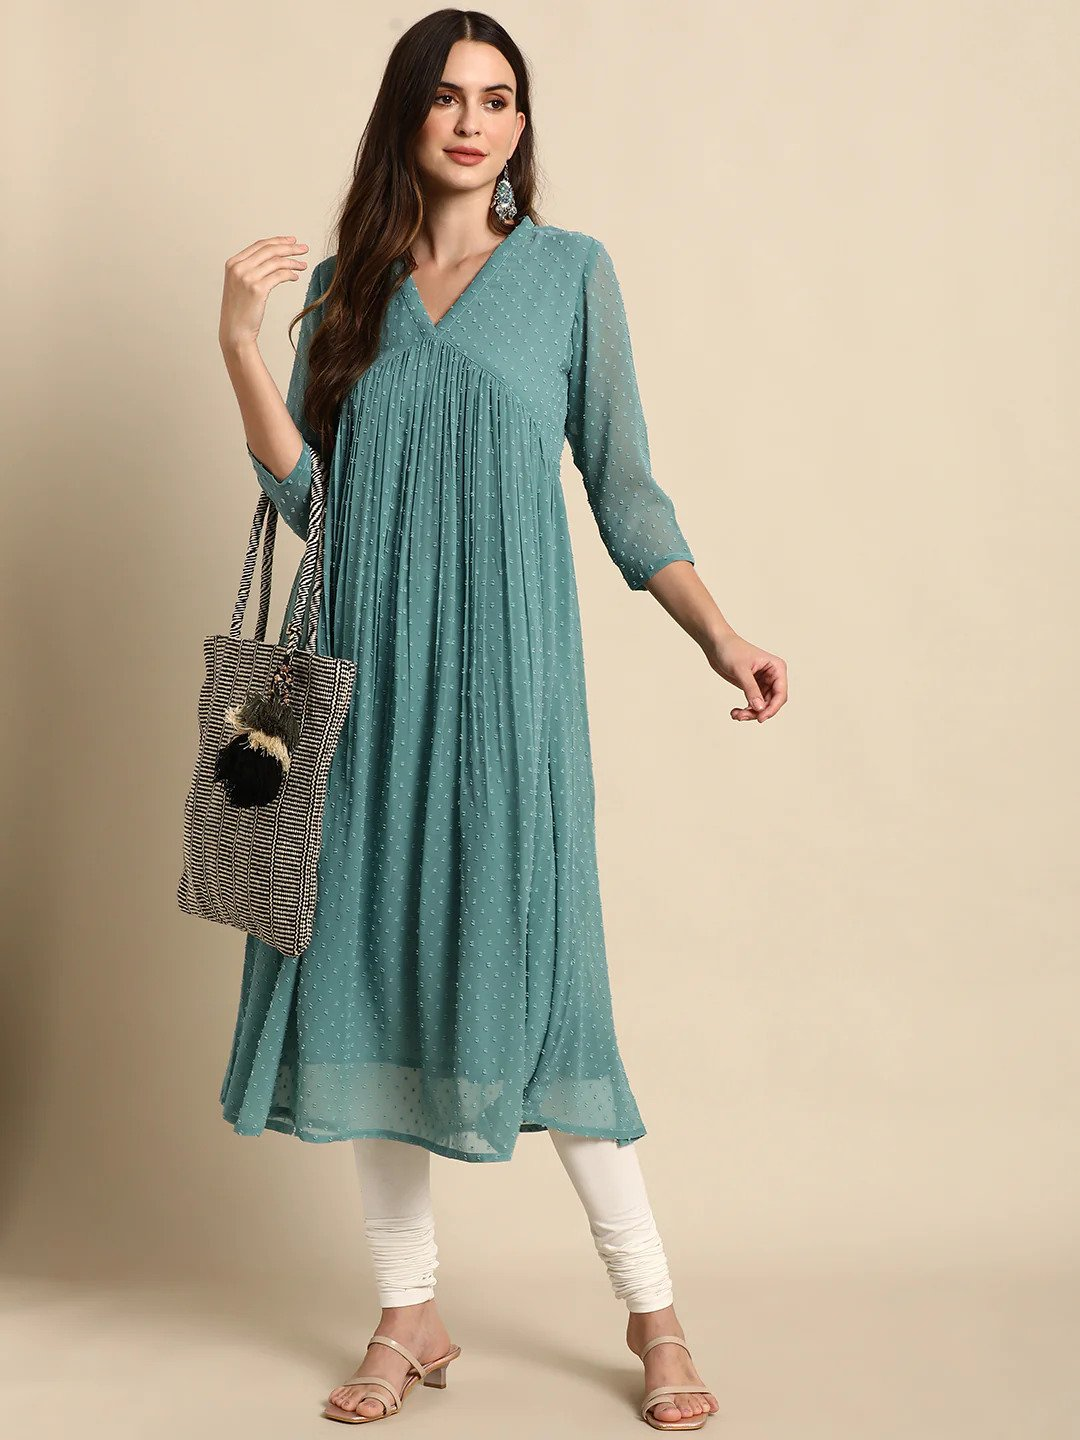

The most popular item in Gujarat Maharashtra and other nearby well-served states (Karnataka, Telangana) is a kurta with style JNE3797. Our suggestion is to set up a marketing campaign in Gujarat focusing on this item to increase the presence of the shop in Gujarat.

In [43]:
viz = ChoroplethViz(states_geo,
                    access_token=MAPBOX_ACCESS_TOKEN,
                     color_property='Orders Per 100k Residents',
                     color_stops=create_color_stops([0, 30, 60, 100, 200], colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.8,
                     center=(74.480650, 20.079555),
                     zoom=5,
                     below_layer='waterway-label')
viz.show()

### Punjab
Punjab is a highly economically developed state with economically strong neighbours. It borders with Himachal Pradesh, Haryana and Uttarakhand, all of which are part of the well-served group.

The most popular item styles of the neighbouring regions are kurtas J0230, J0003 and JNE3405, with the most popular style in Punjab being JNE3405. As the styles are fairly different from each other, we argue that the whole selection (all three styles) can be used for the marketing campaign to increase the chances of customer engagement.

The geographic and economic similarity of neighbouring regions suggests that Punjab has a potential to gain OPR score from 65 to at least 100, signifying a 53% growth.

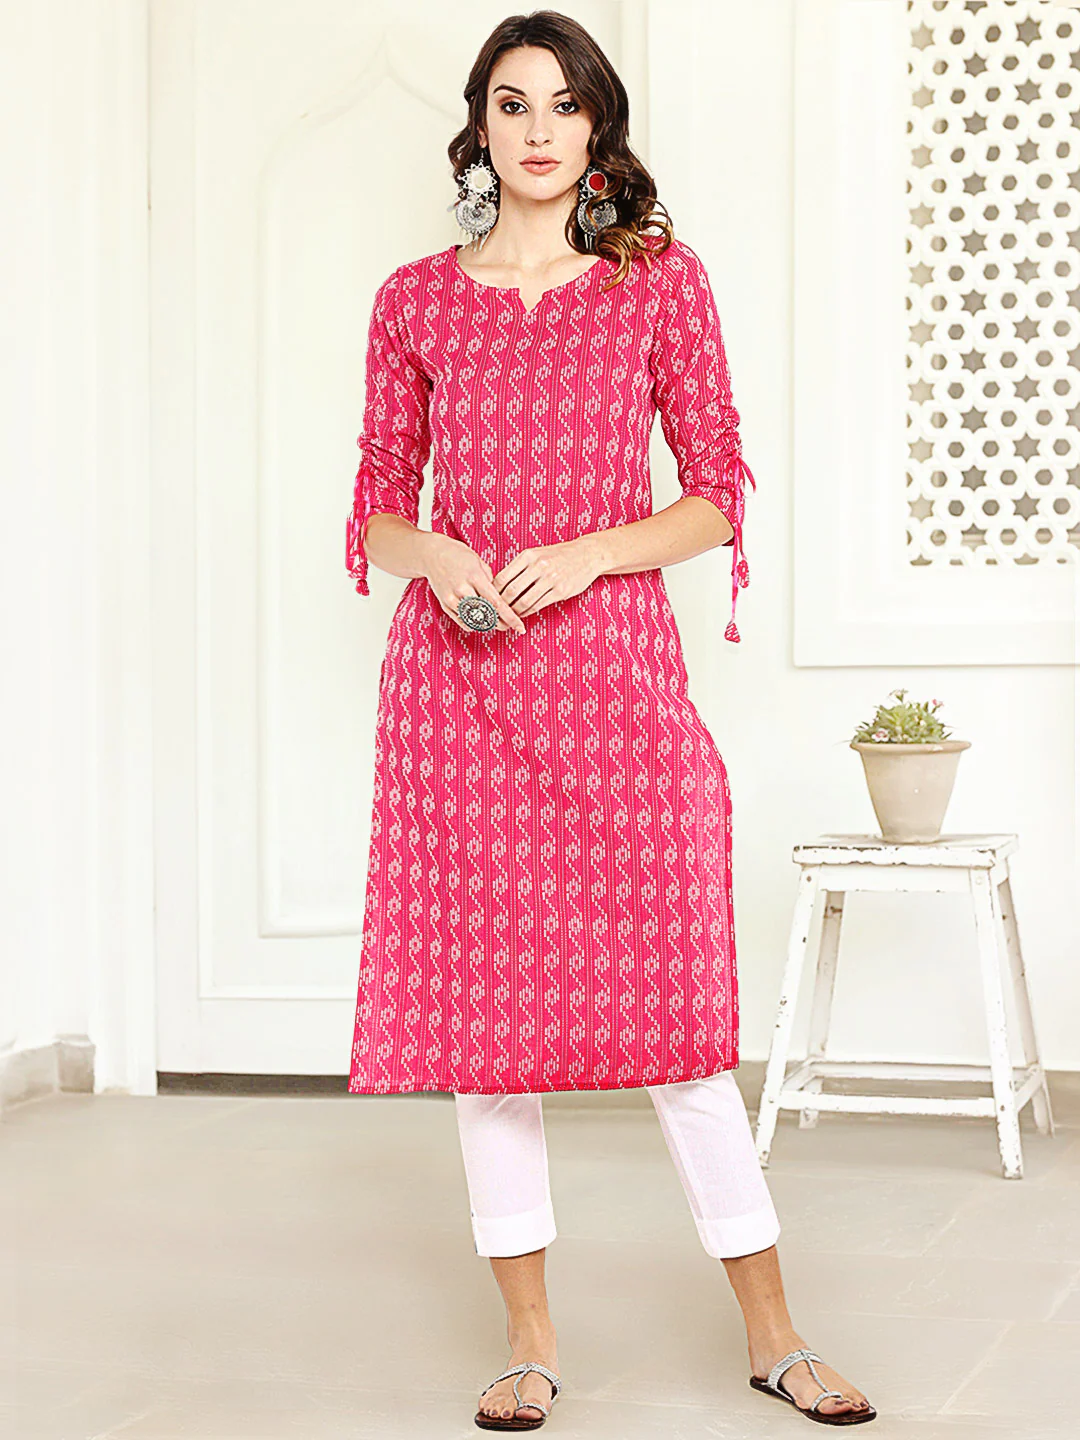

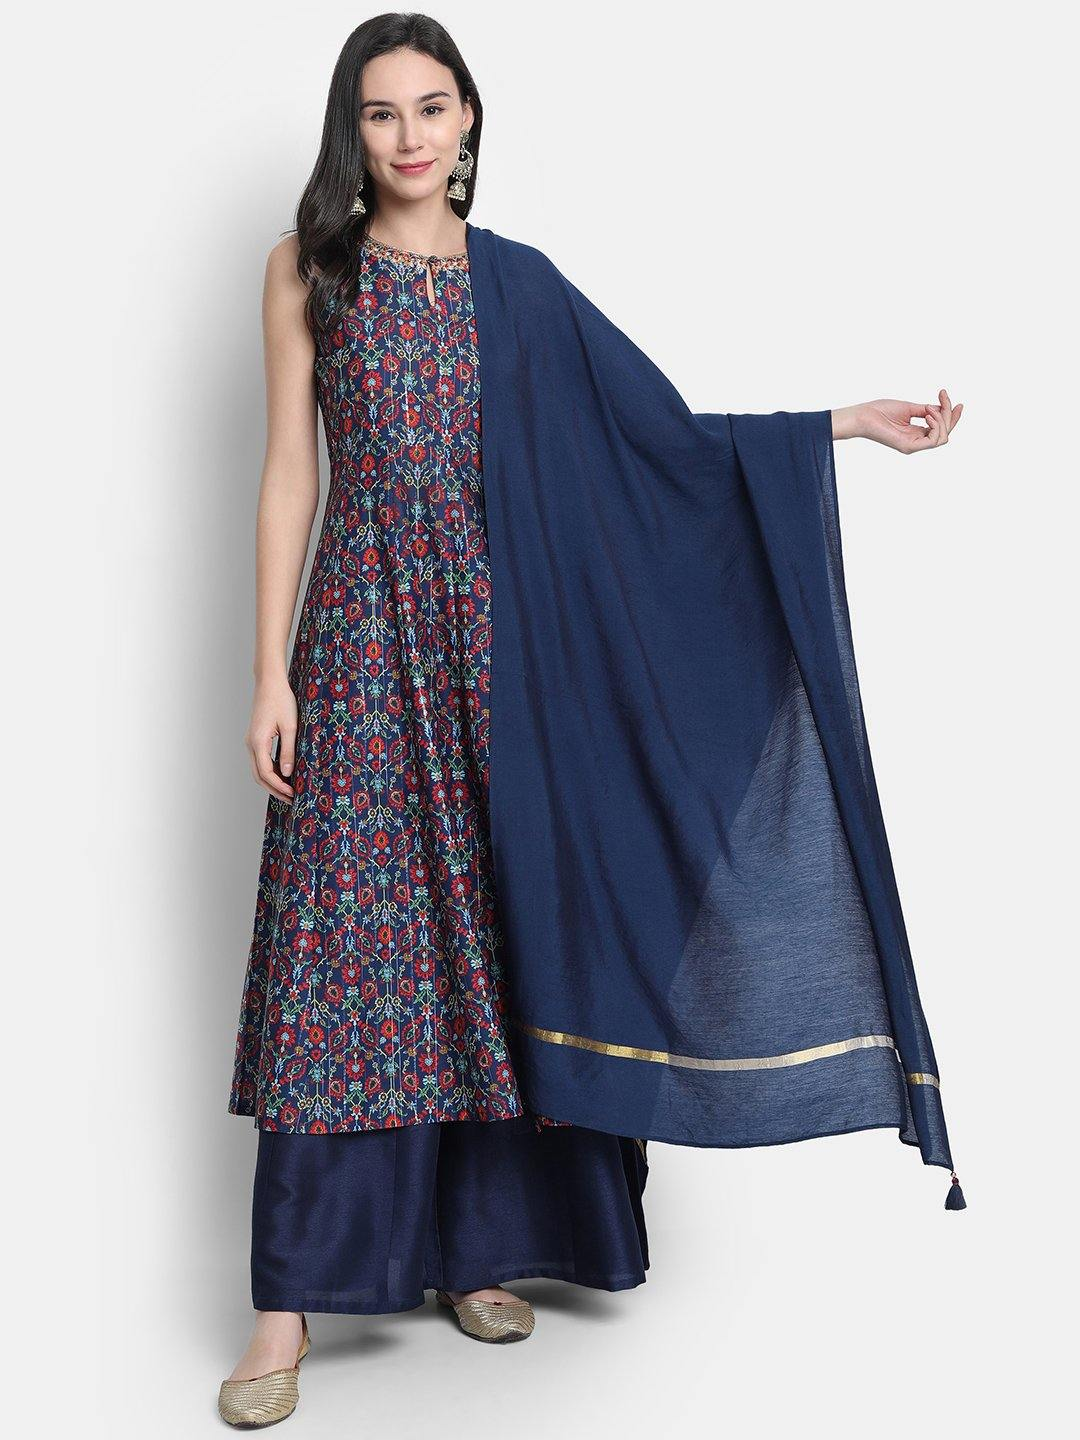

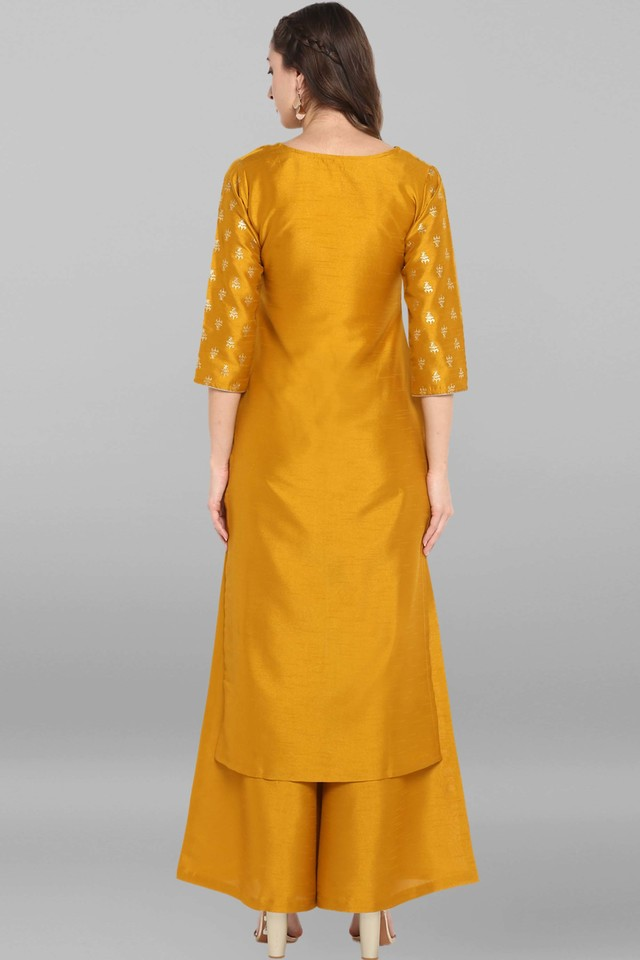

In [44]:
viz = ChoroplethViz(states_geo,
                    access_token=MAPBOX_ACCESS_TOKEN,
                     color_property='Orders Per 100k Residents',
                     color_stops=create_color_stops([0, 30, 60, 100, 200], colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.8,
                     center=(76.480650, 31.079555),
                     zoom=5.5,
                     below_layer='waterway-label')
viz.show()

### Nagaland
Nagaland is a state in the north-eastern part of the country, in a highly mountaneous region. Two neighbours of the state (Arunachal Pradesh, Manipur) are already members of the well-served states group.

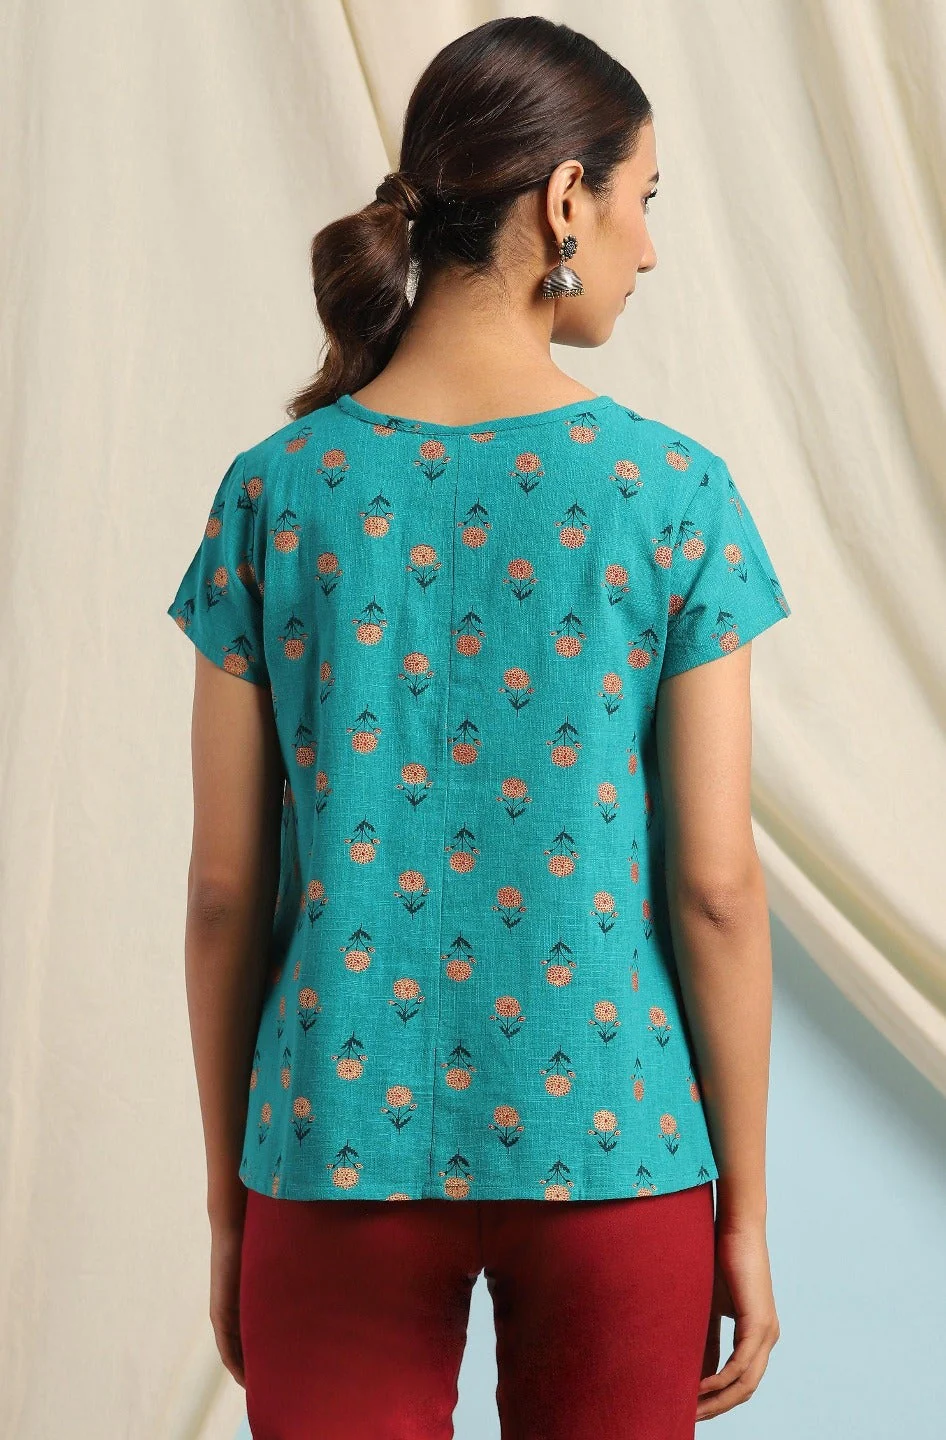

The most popular styles in the region are JNE3659 (Arunachal Pradesh), SET341 (Nagaland) and SET398 (Manipur). It is different from the other regions we considered because the popular items are sets, not kurtas. This probably has to do with the lower temperatures in the region.

We suggest to use on of the sets in the marketing campaign in Nagaland. If the campaign is successful, we can expect to increase the OPR score from 91 to at least 100 (10% growth).

In [45]:
viz = ChoroplethViz(states_geo,
                    access_token=MAPBOX_ACCESS_TOKEN,
                     color_property='Orders Per 100k Residents',
                     color_stops=create_color_stops([0, 30, 60, 100, 200], colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.8,
                     center=(94.480650, 26.5079555),
                     zoom=6,
                     below_layer='waterway-label')
viz.show()

### Insights and suggestions
When assessing the expansion target states, we found some similarities. All 3 states already have multiple well-served neighbours which are similar in both geographical and economical terms. This is really useful for our analysis as we can use the OPR scores of these regions to calculate the potential growth and analyse the customer preferences in the region.

We can rank the states by potential growth:
- Gujarat (175% growth)
- Punjab (53% growth)
- Nagaland (10% growth)

Our suggestion would be to expand the operation in Gujarat by initiating a marketing campaign using the most popular item in the region (kurta JNE3797).

In [46]:
viz = ChoroplethViz(states_geo,
                    access_token=MAPBOX_ACCESS_TOKEN,
                     color_property='Orders Per 100k Residents',
                     color_stops=create_color_stops([1000, 10000, 1000000], colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.8,
                     center=(74.480650, 20.079555),
                     zoom=5,
                     below_layer='waterway-label')
viz.show()

# STORY TWO 


In [47]:
#To view get an insight into what our dataset looks like
amazon.head()

order_id       date               shipping_status  \
index                                                                 
0      405-8078784-5731545 2022-04-30                     Cancelled   
1      171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      404-0687676-7273146 2022-04-30                       Shipped   
3      403-9615377-8133951 2022-04-30                     Cancelled   
4      407-1069790-7240320 2022-04-30                       Shipped   

      fullfilment amazon_or_3rd_party ship-service-level    style  \
index                                                               
0        Merchant           Amazon.in           Standard   SET389   
1        Merchant           Amazon.in           Standard  JNE3781   
2          Amazon           Amazon.in          Expedited  JNE3371   
3        Merchant           Amazon.in           Standard    J0341   
4          Amazon           Amazon.in          Expedited  JNE3671   

                   sku product_category size        asin courier_status  \
index                                                                     
0       SET389-KR-NP-S              Set    S  B09KXVBD7Z        Unknown   
1      JNE3781-KR-XXXL            kurta  3XL  B09K3WFS32        Shipped   
2        JNE3371-KR-XL            kurta   XL  B07WV4JV4D        Shipped   
3           J0341-DR-L    Western Dress    L  B099NRCT7B        Unknown   
4      JNE3671-TU-XXXL              Top  3XL  B098714BZP        Shipped   

       quantity_ordered  order_amount         city        state       zip  \
index                                                                       
0                     0        647.62       mumbai  maharashtra  400081.0   
1                     1        406.00    bengaluru    karnataka  560085.0   
2                     1        329.00  navi mumbai  maharashtra  410210.0   
3                     0        753.33   puducherry   puducherry  605008.0   
4                     1        574.00      chennai   tamil nadu  600073.0   

                                               promotion  business  
index                                                               
0                                           No Promotion     False  
1      Amazon PLCC Free-Financing Universal Merchant ...     False  
2           IN Core Free Shipping 2015/04/08 23-48-5-108      True  
3                                           No Promotion     False  
4                                           No Promotion     False

In [48]:
# check all the unique the datapoints 
amazon['shipping_status'].unique() 

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [49]:
#Here we define the different sets of orders we would like to examine

#We create a dataframe that includes only those unsuccessful orders that were cancelled/returned/rejected/in the process of returnijng
cancelled_returned = amazon[amazon['shipping_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller','Shipped - Rejected by Buyer','Cancelled']) ]

#Here we have the unsuccessful orders + the successfully completed orders
main_orders = amazon[amazon['shipping_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller','Shipped - Rejected by Buyer','Cancelled','Shipped - Delivered to Buyer']) ]

#Here we have only the successfully completed orders
delivered_orders = amazon[amazon['shipping_status'].isin(['Shipped - Delivered to Buyer']) ]

In [50]:
main_orders.head(20)

order_id       date               shipping_status  \
index                                                                 
0      405-8078784-5731545 2022-04-30                     Cancelled   
1      171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
3      403-9615377-8133951 2022-04-30                     Cancelled   
7      406-7807733-3785945 2022-04-30  Shipped - Delivered to Buyer   
12     405-5513694-8146768 2022-04-30  Shipped - Delivered to Buyer   
14     408-1298370-1920302 2022-04-30  Shipped - Delivered to Buyer   
15     403-4965581-9520319 2022-04-30  Shipped - Delivered to Buyer   
18     402-4030358-5835511 2022-04-30  Shipped - Delivered to Buyer   
23     404-6019946-2909948 2022-04-30                     Cancelled   
25     405-8191138-5176316 2022-04-30  Shipped - Delivered to Buyer   
26     403-9230474-9657916 2022-04-30  Shipped - Delivered to Buyer   
32     404-9632124-1107550 2022-04-30  Shipped - Delivered to Buyer   
33     402-1465437-0579556 2022-04-30  Shipped - Delivered to Buyer   
35     402-2764952-1492318 2022-04-30  Shipped - Delivered to Buyer   
42     406-7398201-3869914 2022-04-30  Shipped - Delivered to Buyer   
49     171-9208368-0157156 2022-04-30  Shipped - Delivered to Buyer   
60     171-2592464-6846743 2022-04-30  Shipped - Delivered to Buyer   
70     405-9966506-3155561 2022-04-30  Shipped - Delivered to Buyer   
72     407-2189901-7515567 2022-04-30  Shipped - Delivered to Buyer   
74     406-1326801-8886709 2022-04-30  Shipped - Delivered to Buyer   

      fullfilment amazon_or_3rd_party ship-service-level     style  \
index                                                                
0        Merchant           Amazon.in           Standard    SET389   
1        Merchant           Amazon.in           Standard   JNE3781   
3        Merchant           Amazon.in           Standard     J0341   
7        Merchant           Amazon.in           Standard   JNE3405   
12       Merchant           Amazon.in           Standard   JNE3405   
14       Merchant           Amazon.in           Standard     J0351   
15       Merchant           Amazon.in           Standard  PJNE3368   
18       Merchant           Amazon.in           Standard   JNE3697   
23       Merchant           Amazon.in           Standard    SET291   
25       Merchant           Amazon.in           Standard     NW030   
26       Merchant           Amazon.in           Standard   JNE3415   
32       Merchant           Amazon.in           Standard     J0011   
33       Merchant           Amazon.in           Standard   JNE3766   
35       Merchant           Amazon.in           Standard   MEN5001   
42       Merchant           Amazon.in           Standard   JNE2153   
49       Merchant           Amazon.in           Standard   JNE3405   
60       Merchant           Amazon.in           Standard     NW005   
70       Merchant           Amazon.in           Standard   JNE3068   
72       Merchant           Amazon.in           Standard    SET386   
74       Merchant           Amazon.in           Standard   JNE3467   

                      sku product_category size        asin courier_status  \
index                                                                        
0          SET389-KR-NP-S              Set    S  B09KXVBD7Z        Unknown   
1         JNE3781-KR-XXXL            kurta  3XL  B09K3WFS32        Shipped   
3              J0341-DR-L    Western Dress    L  B099NRCT7B        Unknown   
7            JNE3405-KR-S            kurta    S  B081WX4G4Q        Shipped   
12          JNE3405-KR-XS            kurta   XS  B081XCMYXJ        Shipped   
14            J0351-SET-L              Set    L  B09CSSQY4F        Shipped   
15        PJNE3368-KR-6XL            kurta  6XL  B09PY99SVJ        Shipped   
18         JNE3697-KR-XXL            kurta  XXL  B098133PV5        Shipped   
23         SET291-KR-PP-M              Set    M  B099NK55YG        Unknown   
25         NW030-TP-PJ-XS              Set   XS  B09G2RQ

C:\Users\jegor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


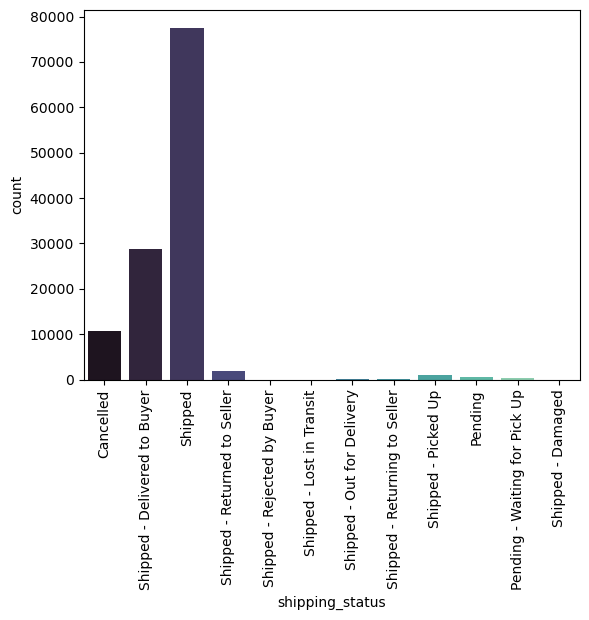

In [51]:
#We create a bar chart to see the number of orders under each category - shipped, cancelled, returned etc.

sns.countplot(amazon['shipping_status'], palette = 'mako')

plt.xticks(rotation= 90) # Rotate the x-axis values to allow for space

plt.show() 


The bar graph above displays the total number of orders under each different shipping status. As we can observe, the orders that were not successfully completed - either they were cancelled, returned, rejected by buyer or in the process of being returned, are expectedly much lower in number than successfully delivered orders. In order to delve deeper we analyse all the orders that were not successfully completed in further detail in the pie chart below :

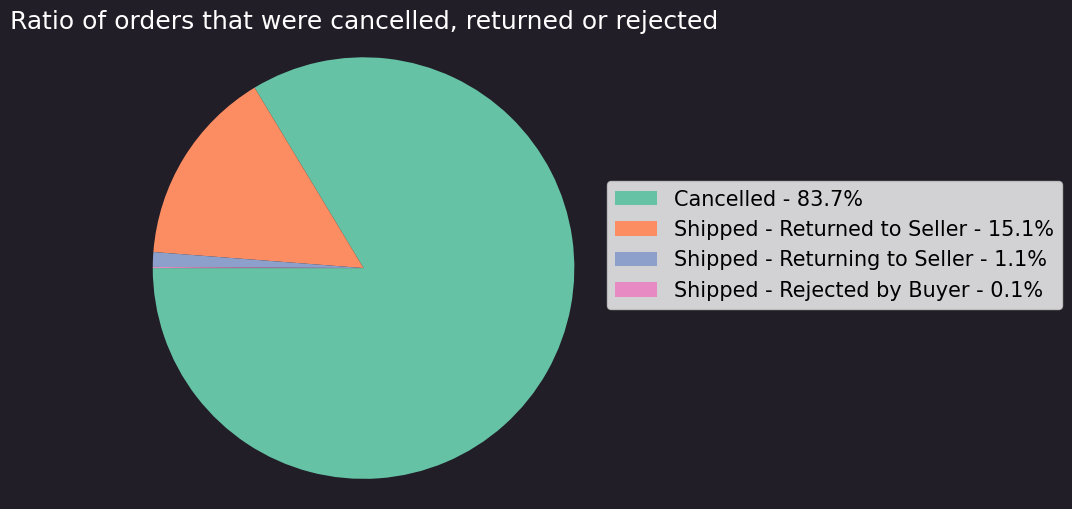

In [52]:
#Here we create a pie chart showing the relative proportions of cancelled versus returned orders

#First we calculate the total number of orders under each of the unsuccessful order categories
cancelled_returned_counts = cancelled_returned['shipping_status'].value_counts()
total_count = sum(cancelled_returned_counts)

#Express these numbers as percentages of the total number of unsuccessful orders
ratios = (cancelled_returned_counts.values/total_count)*100

#Labels - in case we need to label the slices of the pie chart
labels = ['{} - {:.1f}%'.format(category, ratio) for category, ratio in zip(cancelled_returned_counts.index, ratios)]
#label2 = ['{} - {:.1f}%'.format(ratio) for ratio in ratios]
#labels3 = ["{:.1f}%".format(ratio) for ratio in ratios]

#Creating a visualisation of the pie chart
fig, ax = plt.subplots(figsize=(6, 6))

fig.patch.set_facecolor('#211e27')

#plt.figure(figsize=(10, 10), dpi=72)

#Defining the format parameters of the pie chart - for e.g. startangle allows the largest slices to be on the right
ax.pie(cancelled_returned_counts.values, startangle=180,  pctdistance=1.1, colors=sns.color_palette('Set2'))
ax.axis('equal')
ax.set_title('Ratio of orders that were cancelled, returned or rejected', color = 'white') # Set title
ax.title.set_size(18)


#Setting a legend, with location on the figure and font size
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1, 0.55), fontsize=15)

#ax.set_facecolor('')
#fig.patch.set_facecolor('#211e27')

#titles_col = 'white'
#first_axis_col = 'lightblue'
#second_axis_col = '#ffcccb'


piechart = plt.gcf()

plt.show()

piechart.savefig('new_pie_chart_updated2.png', bbox_inches = 'tight', dpi = 300) #Save the image to produce in presentation


The pie chart shows that a much larger proportion, approximately 5 times more, of orders are cancelled versus returned. In comparison, a very small almost neglidgible fraction of orders are rejected by buyers.

### Analysis by Size

Here our goal is to analyse whether certain sizes are more likely to be cancelled or returned over others. Thus, we study the size distribution of each category of orders from those that are successfully delivered to those that are returned.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


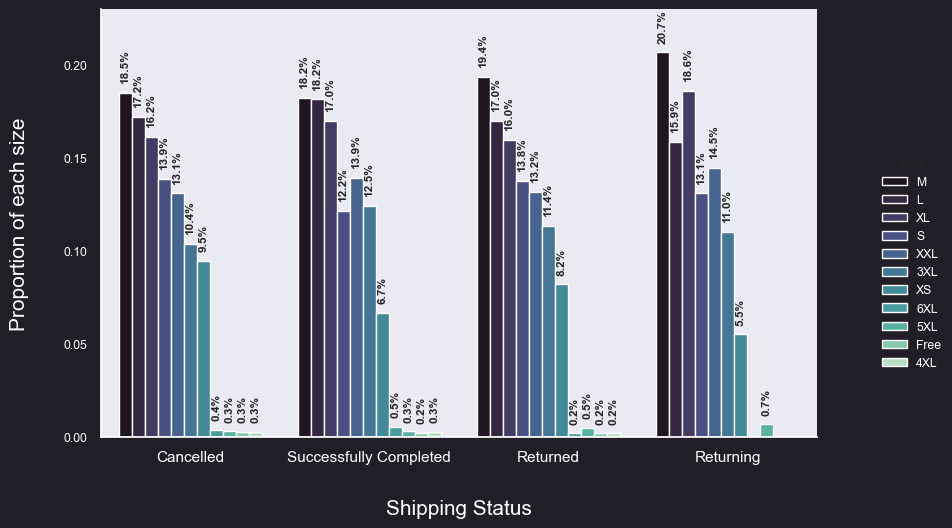

In [53]:
#Since there are missing values in the category of rejected orders for certain sizes, we define a new
#set without rejected orders

main_orders_2 = amazon[amazon['shipping_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller','Cancelled','Shipped - Delivered to Buyer']) ]

#Group by shipping status to calculate the number of orders of seach size for each shipping status
x,y = 'shipping_status', 'size'

size_status = main_orders_2.groupby(x)[y].value_counts(normalize=True)

size_status = size_status.rename('proportion').reset_index()

sns.set(font_scale= 0.8, rc={'figure.facecolor':'#211e27', 'text.color': '.15'})

#Create a bar chart with specific format parameters for e.g. legend_out ensures the legend is enlarged 
#and placed outside the figure

g= sns.catplot(x=x, y='proportion',hue=y, kind='bar', data=size_status, palette = 'mako', legend_out = True)

legend = g._legend
for i in range(len(legend.texts)):
    legend.texts[i].set_color('white')

#Specify labels on the axes
plt.xlabel('Shipping Status', labelpad= 25, fontsize=15, color = 'white') 
plt.ylabel('Proportion of each size', labelpad= 25,  fontsize=15, color = 'white')

#Change label names to allow for more space on graph
updated_labels = ['Cancelled', 'Successfully Completed', 'Returned', 'Returning']

#Specify values on axis with parameters to make them easily visible
plt.xticks(range(len(updated_labels)), updated_labels, rotation=0, fontsize= 11, color = 'white') 
plt.yticks(color = 'white') 
 
plt.grid(False)
plt.ylim((0,0.230)) #Increase the limit of y-axis values to allow all annotations to fit into our graph


g.fig.set_size_inches(10,5) #Setting the graph size


#Here we specify the text that must appear on each instance of an observation in the graph
#The frequencies of each category are the heights of the bars, and we express them as percentages for clearer understanding

for p in g.ax.patches:
    txt = str(((p.get_height().round(3))* 100).round(3)) + '%'
    txt_x = p.get_x() + p.get_width() / 2 
    txt_y = p.get_height() + 0.02
    g.ax.text(txt_x, txt_y-0.015, txt, ha='center', va='bottom', rotation=90, fontsize=8.5, weight='bold') #rotate values to make them easier to read
    
    

#g.set_facecolor('#E1E1E2')
#fig.patch.set_facecolor('#211e27')

#titles_col = 'white'
#first_axis_col = 'lightblue'
#second_axis_col = '#ffcccb'



    
plt.savefig('new_analysis_by_size_updated.png', dpi = 250)


One of the reasons why an order may be cancalled or retruend is due the buyer opting for the wrong size. So, it is worthwhile looking into the different sizes to analyse if orders of certain sizes are more likely to be cancelled than others. As the bar graph shows, size distribution of orders cancelled versus those that were cancelled is very similar with L, M and XL being the most popular orders in both categories. In each category, whether its cancelled, returned or successfully delivered orders, the most popular size is a Medium (M) which is very closely followed by a Large (L). It does not appear that any one size in particular is more likely to be returned or cancelled than others. 

### Analysis by Order Amount
Here we seek to analyse whether the total order amount (in terms of price of order) has an influence on the likelihood of the order being cancelled or returned. It is expected that customers are more likely to change their minds about expensive orders, and more likely to stick to their purchase decisions when the orders are cheaper.


C:\Users\jegor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


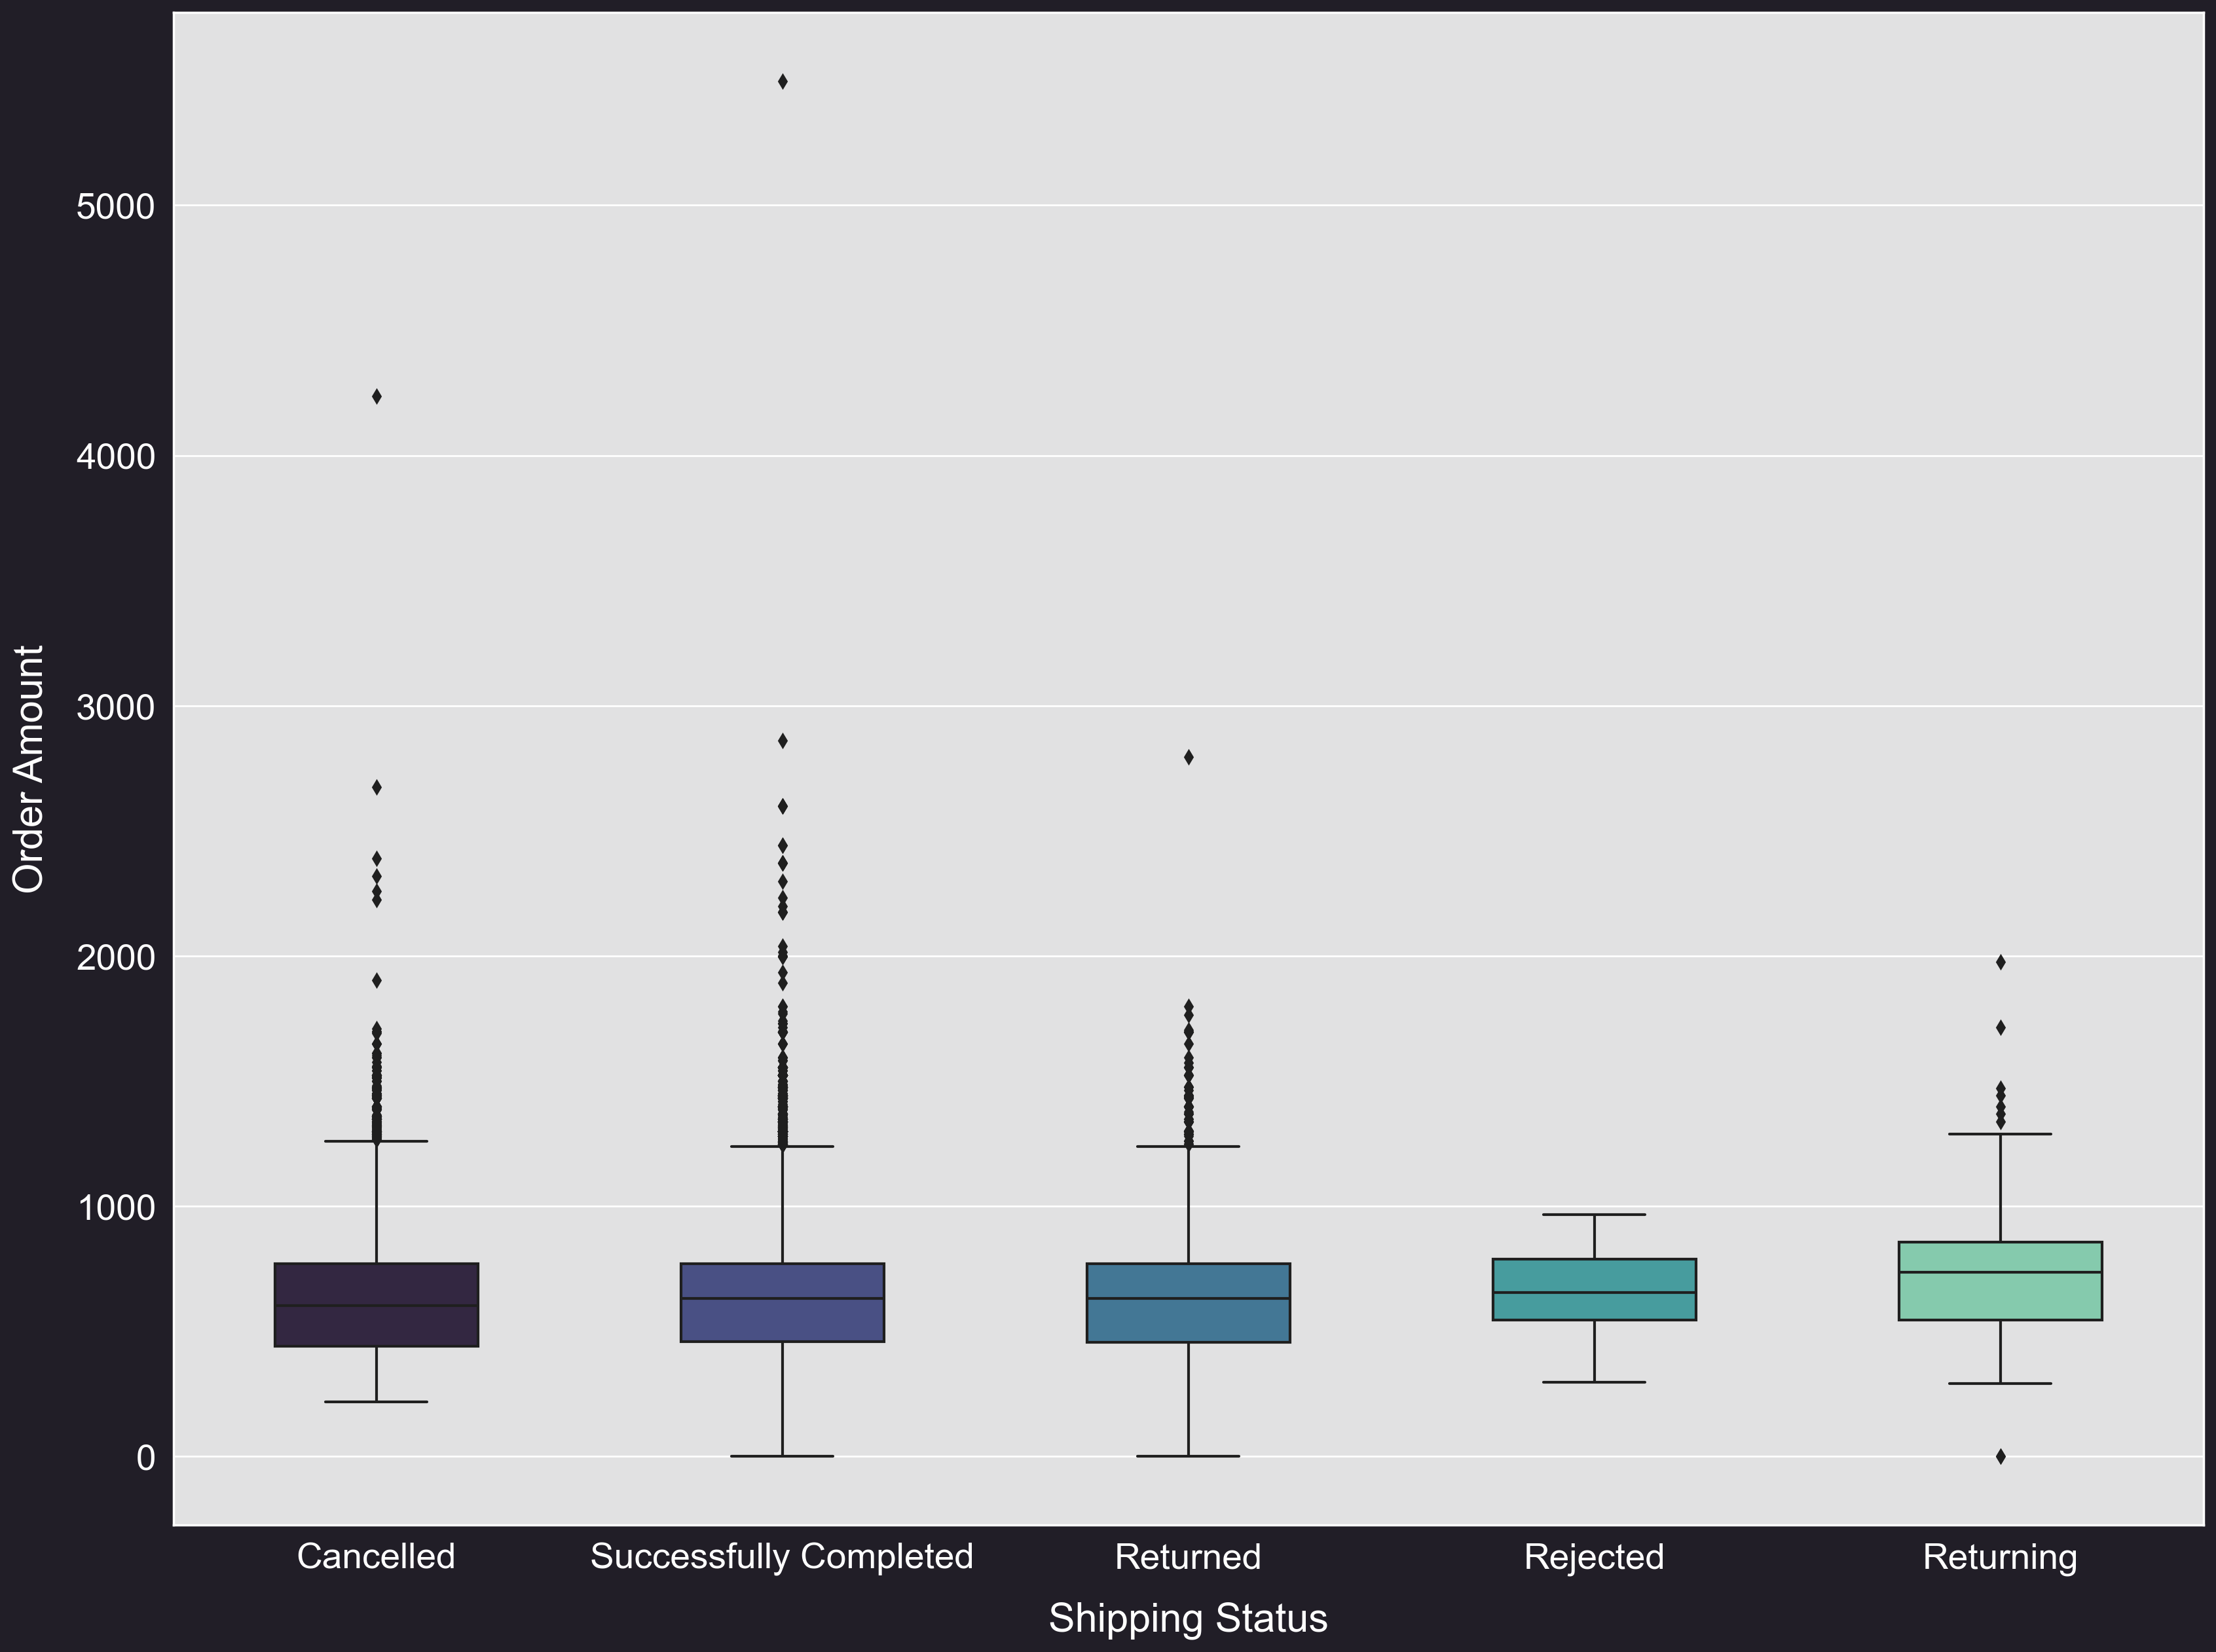

In [54]:
#Plot a boxplot to analyse how the orders returned or cancalled compare with orders delivered in terms of order amount
%config InlineBackend.figure_format = 'retina'

#Set the font size
sns.set(font_scale=1.8, rc={'figure.facecolor':'#211e27'})

g = plt.figure(figsize=(20,15)) #Setting figure size


#Set the font parameters of the boxplot, such as box width, colour palette etc.
p = sns.boxplot(main_orders['shipping_status'], main_orders['order_amount'], palette = 'mako',  width=0.5) 


plt.xlabel('Shipping Status', fontsize=22, labelpad= 14, color = 'white')
plt.ylabel('Order Amount', fontsize=22, labelpad= 14, color = 'white')

new_labels = ['Cancelled', 'Successfully Completed', 'Returned', 'Rejected', 'Returning']
plt.xticks(range(len(new_labels)), new_labels, color = 'white')
plt.yticks(color = 'white')

p.set_facecolor('#E1E1E2')

boxplot = plt.gcf()

plt.show()

boxplot.savefig('new_analysis_by_amount_updated.png', dpi = 250)

As we can observe from the boxplot above, there isn't a significant difference in the median order amounts for cancelled orders and successfully delivered orders. The variation in order amount is also relatively similar across both cancelled/returned orders and successfully delivered orders. However, for cancelled and rejected orders, the 25% quartile is higher than successfully delivered orders. This suggests that comsumers are more likely to change their minds about orders that are more expensive. However the small variation in order amount for rejected orders might also simply be down to the fact that there are very few rejected orders in comparison, and so the range of order amount is muc lower. 

In addition, the median order amount is highest for orders that are 'Shipped - Returning to Seller'. The upper and lower quartiles for this category are also higher than all other categories, yet again indicating that customers may be more liklely to change their minds about orders that are expensive. However, due to the small number of orders in this category, our analysis has a larger likelihood of bias and would be more meaningful with larger data.

### Analysis by Style 
In this section, we aim to identify any styles that are more likely to be cancelled or returned than others. In order to make our comparison fair and meaningful, we limit our analysis to only those styles that have been ordered more than 5 times (styles ordered 5 or less times are ignored). 

In [55]:
#Here we group by style, and find the total number of orders for each style by shipping status

#Define the two variables of interest we wish to examine
y,x = 'shipping_status', 'style'

#Calculate the number of orders in each shipping status category, for each different style
df1 = amazon.groupby(x)[y].value_counts(normalize=True)

#First we focus on those orders that were returned or are in the process of being returned
df1 = df1.rename('proportion').reset_index()
df1 = df1[df1['shipping_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller'])]

#Filter the data to ignore any styles with less than 5 orders
style_filter = amazon['style'].value_counts().index[amazon['style'].value_counts().values > 5]
df1 = df1[df1['style'].isin(style_filter)]  

#Sort the dataframe in descending order to view styles with the highest returns percentage
sorted_by_status = df1.sort_values(by = 'proportion', ascending = False)


In [56]:
#Now we focus on those orders that were cancelled and repeat the above process
y2,x2 = 'shipping_status', 'style'

df2 = amazon.groupby(x2)[y2].value_counts(normalize=True)

df2 = df2.rename('proportion2').reset_index()
df2 = df2[df2['shipping_status'].isin(['Cancelled'])]

style_filter2 = amazon['style'].value_counts().index[amazon['style'].value_counts().values > 5]
df2 = df2[df2['style'].isin(style_filter2)]  
sorted_by_status2 = df2.sort_values(by = 'proportion2', ascending = False)


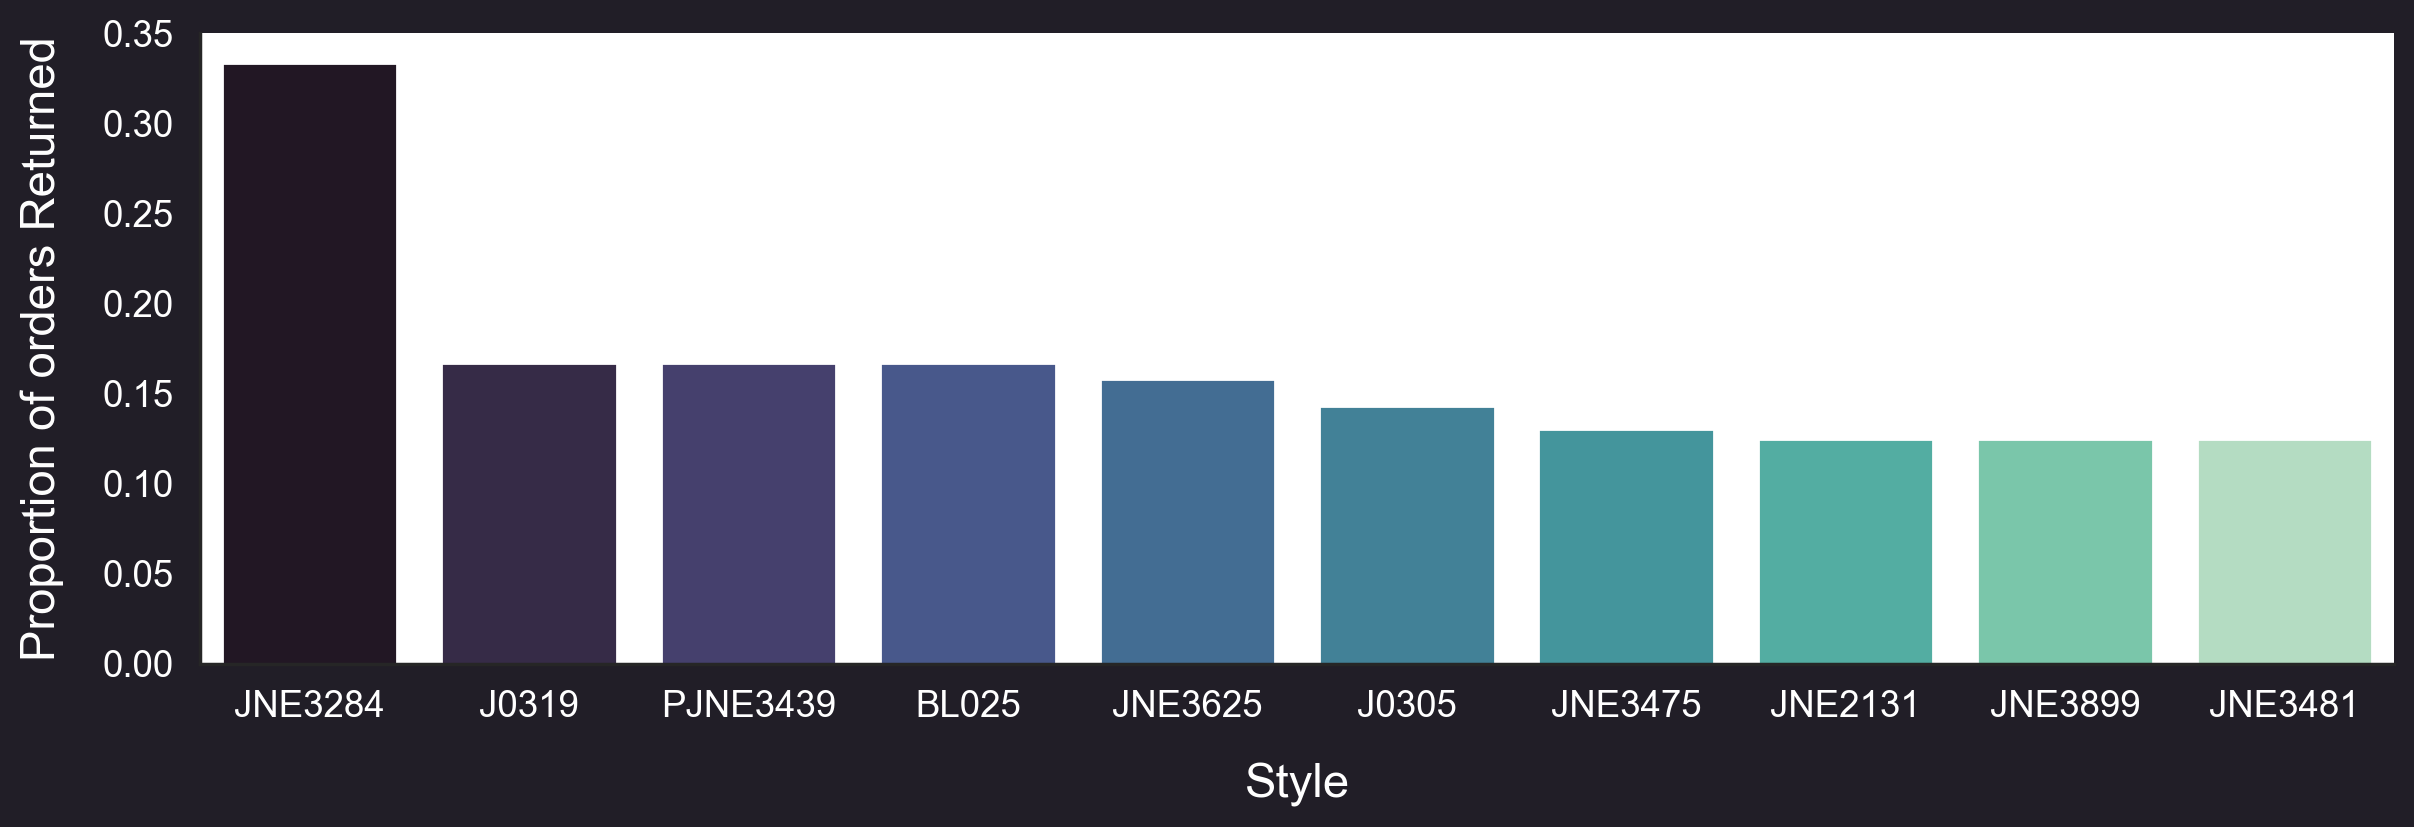

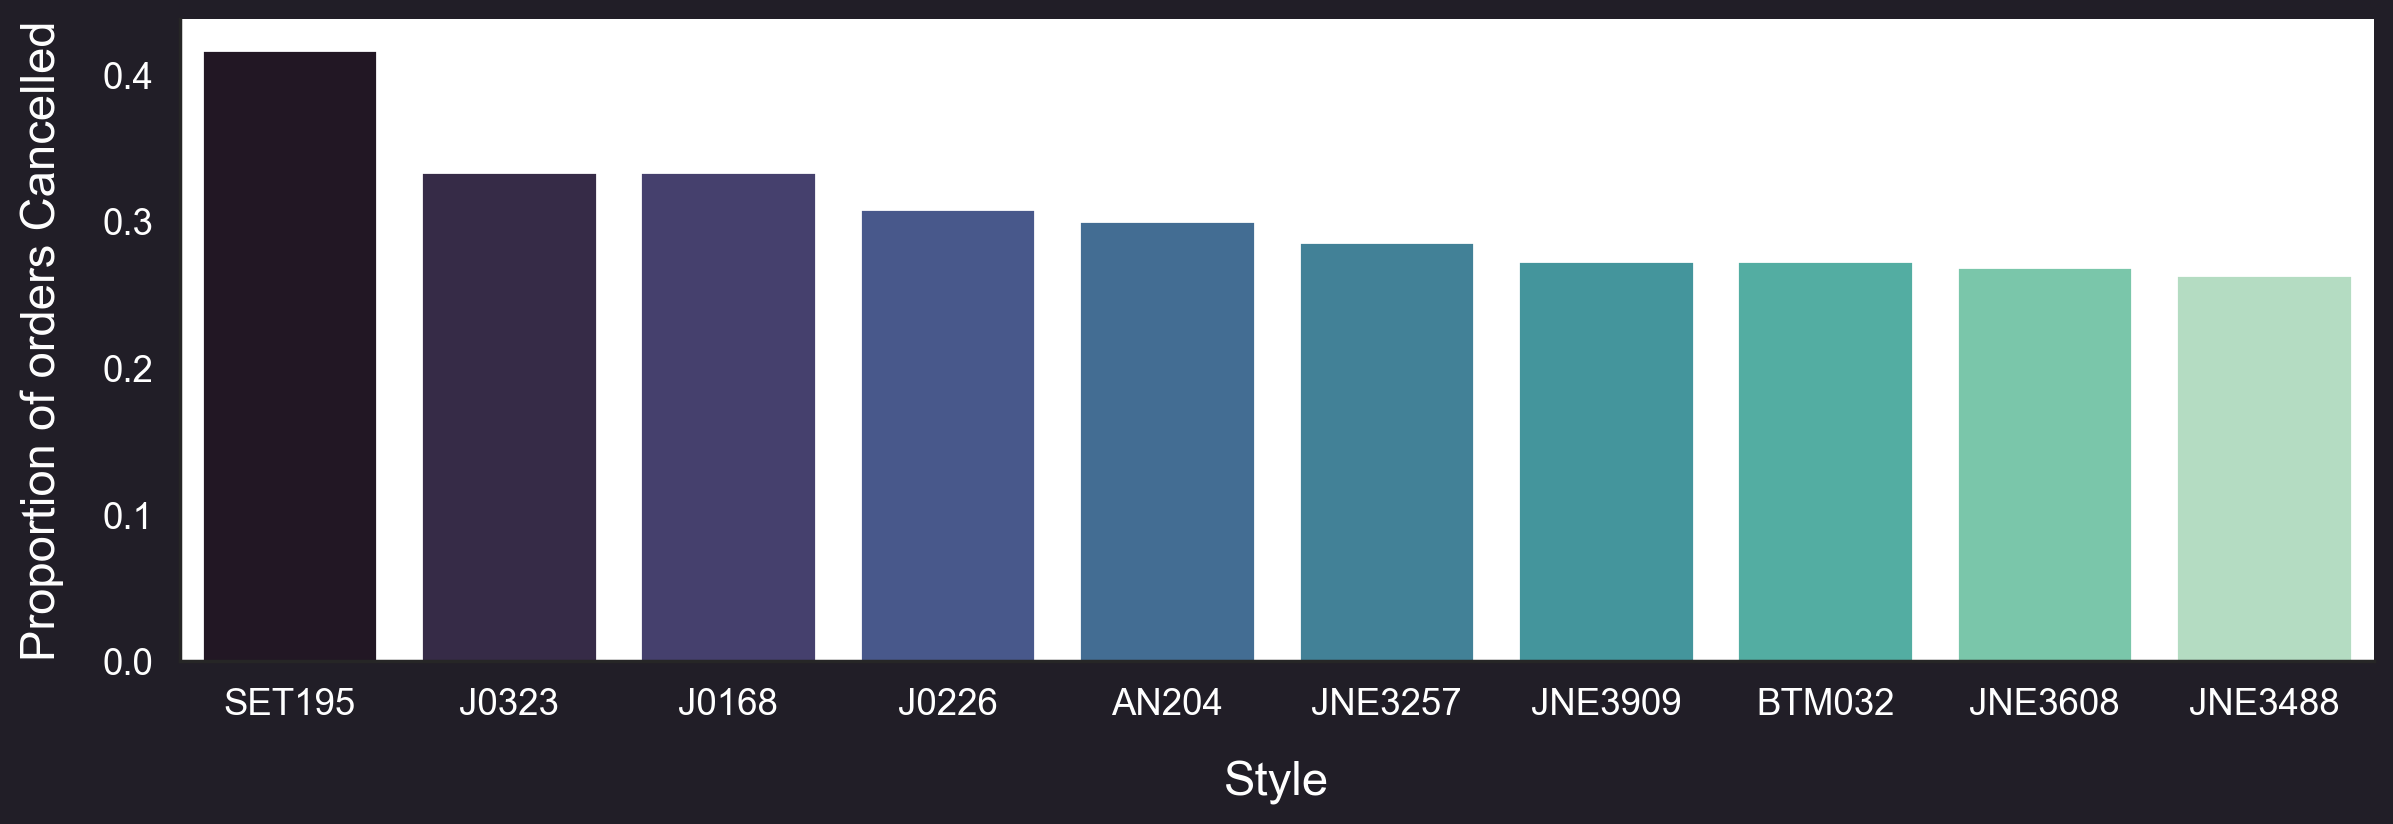

In [57]:
#Set the format parameters for the figure
sns.set(font_scale=1.2, style='white', rc={'figure.facecolor':'#211e27'})

#Create a bar chart with the specified format and using only the top 10 values from each list
barplot = sns.catplot(x= 'style', y='proportion',kind='bar', palette = "mako", data= sorted_by_status.iloc[:10])

plt.ylabel('Proportion of orders Returned',  fontsize=17, labelpad= 14, color = 'white')
plt.xlabel('Style',  fontsize=17, labelpad= 14, color='white')
plt.yticks(color = 'white')
plt.xticks(color = 'white')

barplot.fig.set_size_inches(15,4)


plt.savefig('new_returned_by_style_updated.png', dpi = 200)


#Repeat the process to create a bar chart for cancellations
barplot = sns.catplot(x= 'style', y='proportion2',kind='bar', palette = "mako", data= sorted_by_status2.iloc[:10])

plt.ylabel('Proportion of orders Cancelled',  fontsize=17, labelpad= 14, color = 'white')
plt.xlabel('Style',  fontsize=17, labelpad= 14, color = 'white')
plt.yticks(color = 'white')
plt.xticks(color = 'white')


barplot.fig.set_size_inches(15,4)


plt.savefig('new_cancelled_by_style_updated.png', dpi = 200)


The above bar charts show the item styles that are most liklely to be returned (Plot 1) or cancelled (Plot 2). For style 'SET 195' for instance, approximately 40% of orders so far have been cancelled, and for style 'JNE3284', more than a third of orders have been returned to seller. It might be useful for the shop to evaluate these styles in detail and check for issues with quality. 

#### Iteration 2 : Changing the above graph to allow for better understanding

In [58]:
#Calculate average rates of cancels and returns
status_counts = amazon['shipping_status'].value_counts()

#compute the rate of occurrence of each fruit
status_rates = status_counts / len(amazon)

print(status_rates)

Shipped                          0.640360
Shipped - Delivered to Buyer     0.237350
Cancelled                        0.088827
Shipped - Returned to Seller     0.016072
Shipped - Picked Up              0.008032
Pending                          0.005415
Pending - Waiting for Pick Up    0.002320
Shipped - Returning to Seller    0.001197
Shipped - Out for Delivery       0.000289
Shipped - Rejected by Buyer      0.000091
Shipped - Lost in Transit        0.000041
Shipped - Damaged                0.000008
Name: shipping_status, dtype: float64


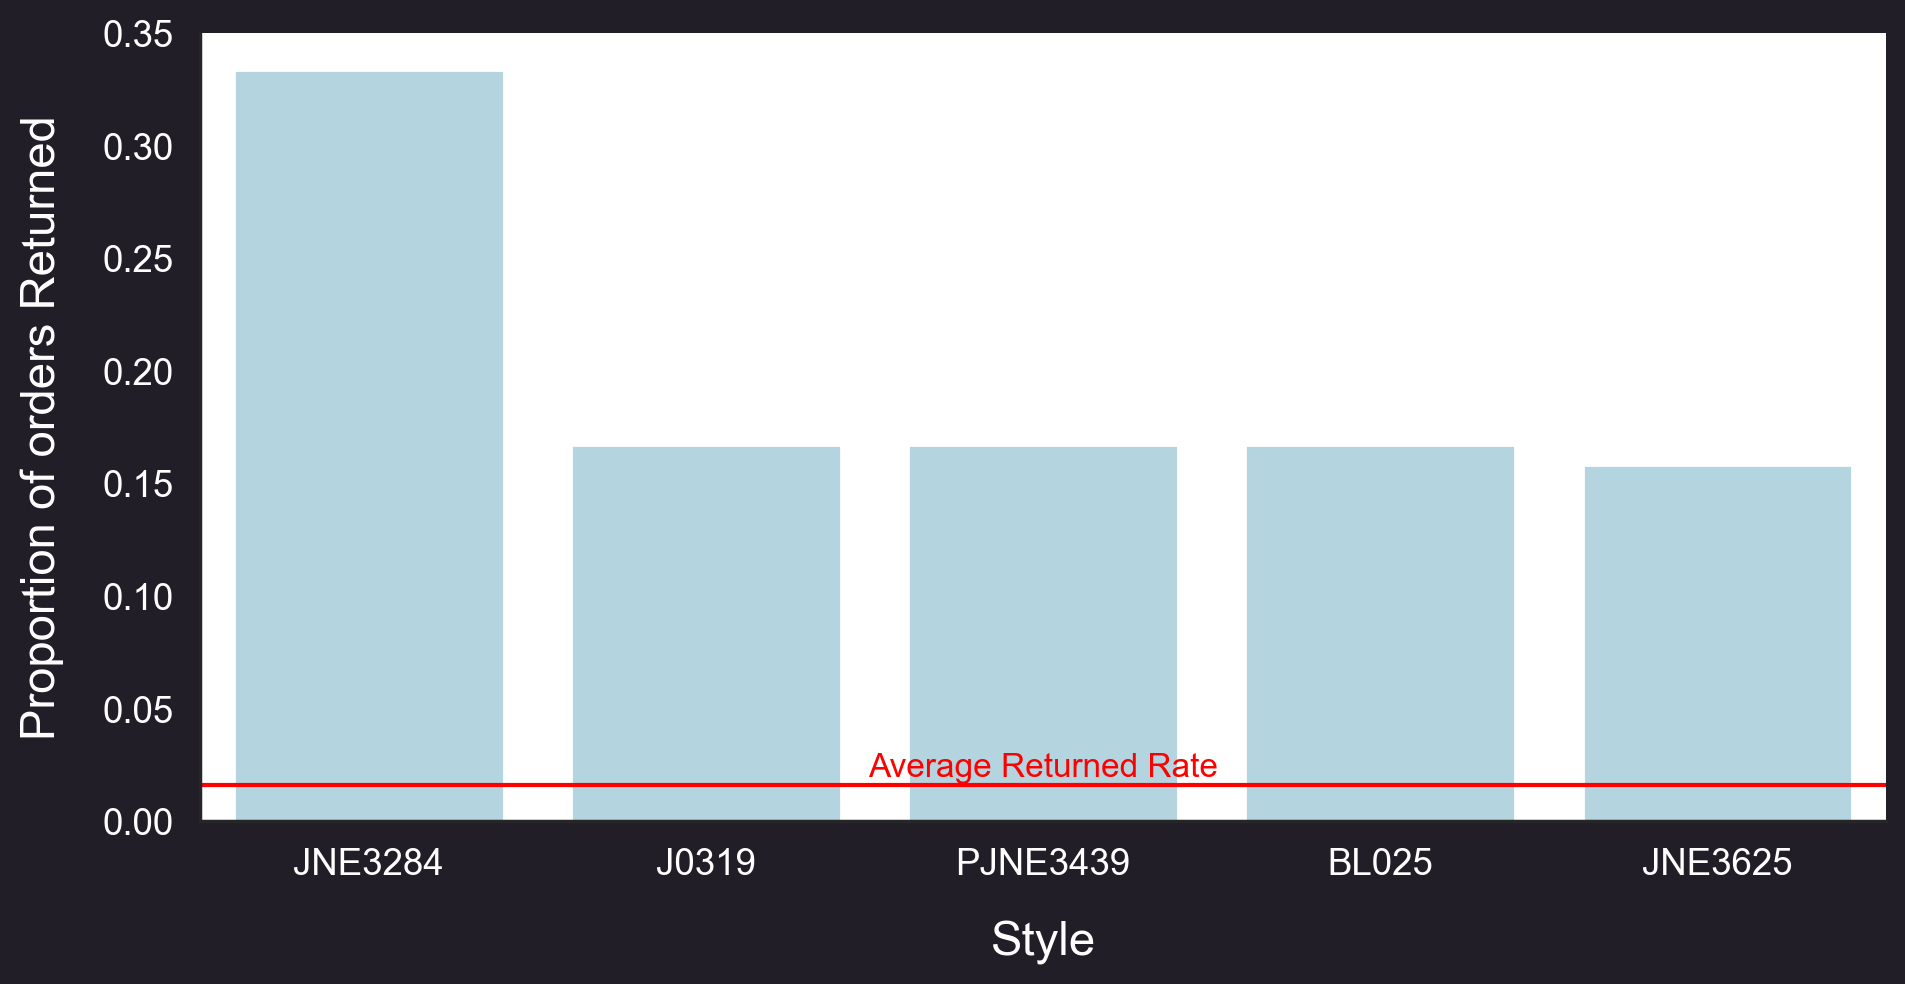

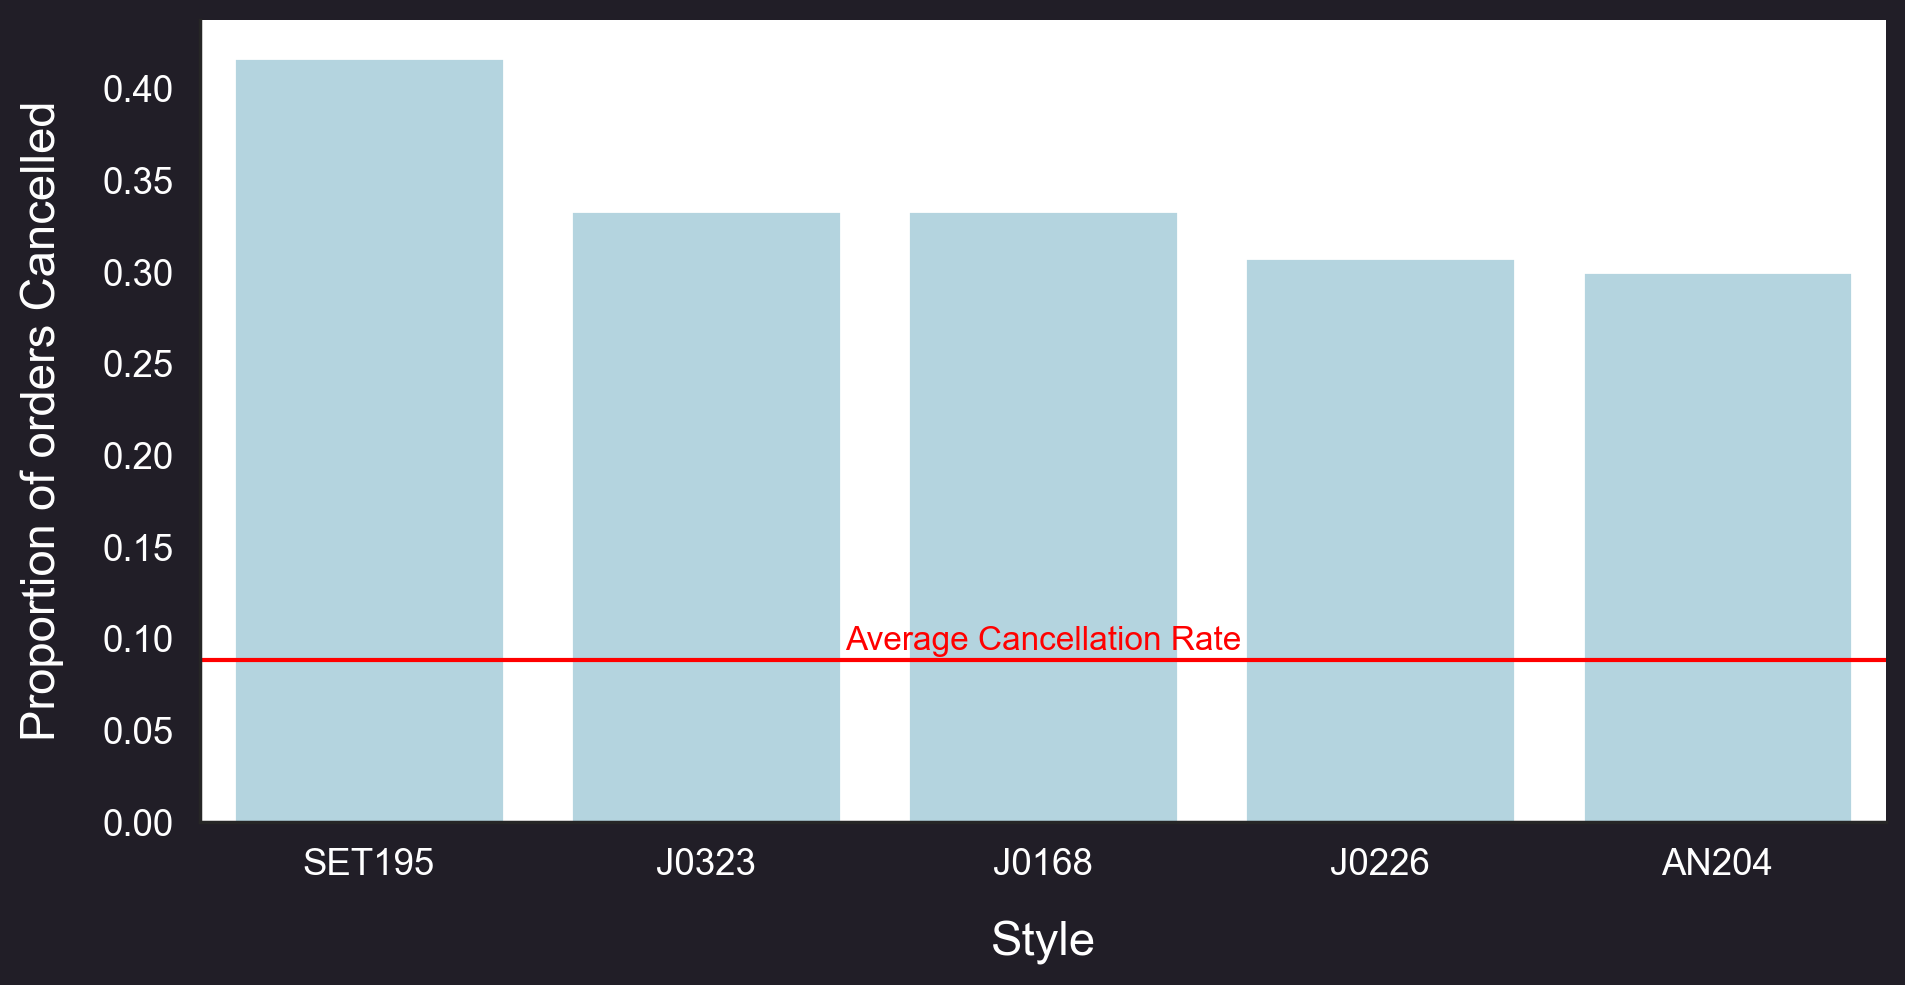

In [59]:
#Create a bar chart with the specified format and using only the top 10 values from each list
sns.set(font_scale=1.2, style='white', rc={'figure.facecolor':'#211e27'})

barplot = sns.catplot(x= 'style', y='proportion', color='lightblue', kind='bar', data= sorted_by_status.iloc[:5])


#Add a line for average rate of cancellation
barplot.ax.axhline(y=0.016, color='red')
barplot.ax.text(2.0, 0.020, 'Average Returned Rate', ha='center', color='red', fontsize = 12)

plt.ylabel('Proportion of orders Returned',  fontsize=17, labelpad= 14, color = 'white')
plt.xlabel('Style',  fontsize=17, labelpad= 14, color='white')
plt.yticks(color = 'white')
plt.xticks(color = 'white')

barplot.fig.set_size_inches(11,5)


plt.savefig('iter2_returned_by_style_updated.png', dpi = 200)


#Repeat the process to create a bar chart for cancellations
barplot = sns.catplot(x= 'style', y='proportion2', color='lightblue', kind='bar', data= sorted_by_status2.iloc[:5])

#Add a line for average rate of returns
barplot.ax.axhline(y=0.088, color='red')
barplot.ax.text(2.0, 0.094, 'Average Cancellation Rate', ha='center', color='red', fontsize = 12)

plt.ylabel('Proportion of orders Cancelled',  fontsize=17, labelpad= 14, color = 'white')
plt.xlabel('Style',  fontsize=17, labelpad= 14, color = 'white')
plt.yticks(color = 'white')
plt.xticks(color = 'white')


barplot.fig.set_size_inches(11,5)


plt.savefig('iter2_cancelled_by_style_updated.png', dpi = 200)



#  +++ STORY THREE 

In [60]:
clean = pd.read_csv('sales_report_cleaned.csv', low_memory=False)

## Dataset exploration using Pandas


In [61]:
clean['date'] = pd.to_datetime(clean['date']) # convert date column to datetime

In [62]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121146 entries, 0 to 121145
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                121146 non-null  int64         
 1   order_id             121146 non-null  object        
 2   date                 121146 non-null  datetime64[ns]
 3   shipping_status      121146 non-null  object        
 4   fullfilment          121146 non-null  object        
 5   amazon_or_3rd_party  121146 non-null  object        
 6   ship-service-level   121146 non-null  object        
 7   style                121146 non-null  object        
 8   sku                  121146 non-null  object        
 9   product_category     121146 non-null  object        
 10  size                 121146 non-null  object        
 11  asin                 121146 non-null  object        
 12  courier_status       121146 non-null  object        
 13  quantity_order

 We can now see the clean data and we transformed the 2nd column into datetime type for easier plotting 
 

## Daily Sales over Time 

In [63]:
sns.set(font_scale=1.2, style='white', rc={'figure.facecolor':'white'})  # Resets the sns settings from different story 

In [64]:
clean['date'] = pd.to_datetime(clean['date']) # convert date column to datetim
daily_sales = clean.set_index('date')['order_amount'].resample('D').sum()

# make sure the index is a datetime index
daily_sales.index = pd.to_datetime(daily_sales.index)

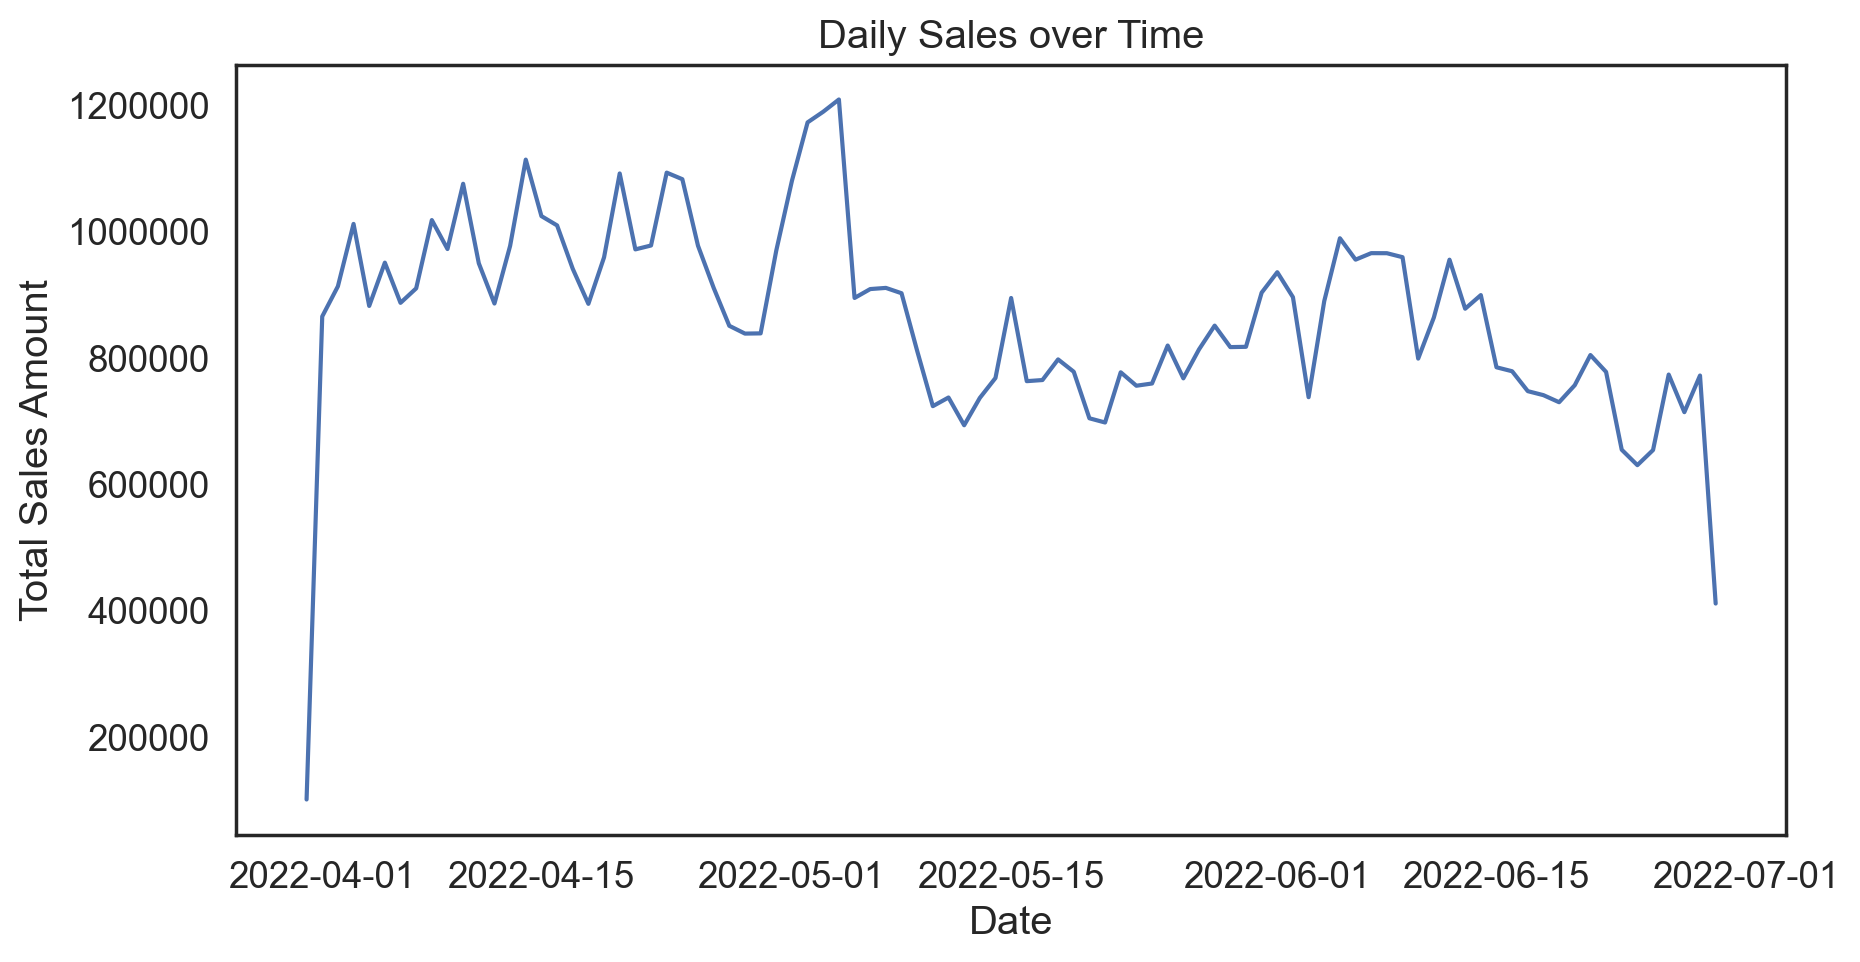

In [65]:
# plot the daily sales over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values)

plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Daily Sales over Time')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

fig.patch.set_facecolor('white')
plt.savefig('daily_sales_1.png',dpi=1000)

plt.show()

We can see two outliers at the beginning of the dataset and the end. Commands below will show, how to identify them.

In [66]:
print(clean['date'].max()) # last date available 
print(clean['date'].min()) # first date available

2022-06-29 00:00:00
2022-03-31 00:00:00


In [67]:
print(len(clean.loc[clean['date']=='2022-04-01']))
print(len(clean.loc[clean['date']=='2022-03-31']))

1362
162


Print statements above, are useful to see the number of observations in each date. We can see that the first date has only 162 observations, which suggest missing data. We therefore can drop the first available date for better analysis.

In [68]:
clean.drop(clean.loc[clean['date']=='2022-03-31'].index, inplace=True)

In [69]:
print(len(clean.loc[clean['date']=='2022-06-28']))
print(len(clean.loc[clean['date']=='2022-06-29']))

1134
629


Similarly, we can see that the last date has only 629 observations, which suggest missing data and therefore can be removed. 

In [70]:
clean.drop(clean.loc[clean['date']=='2022-06-29'].index, inplace=True)

In [71]:
start_date = pd.to_datetime('2022-04-01')  
end_date = pd.to_datetime('2022-06-28')

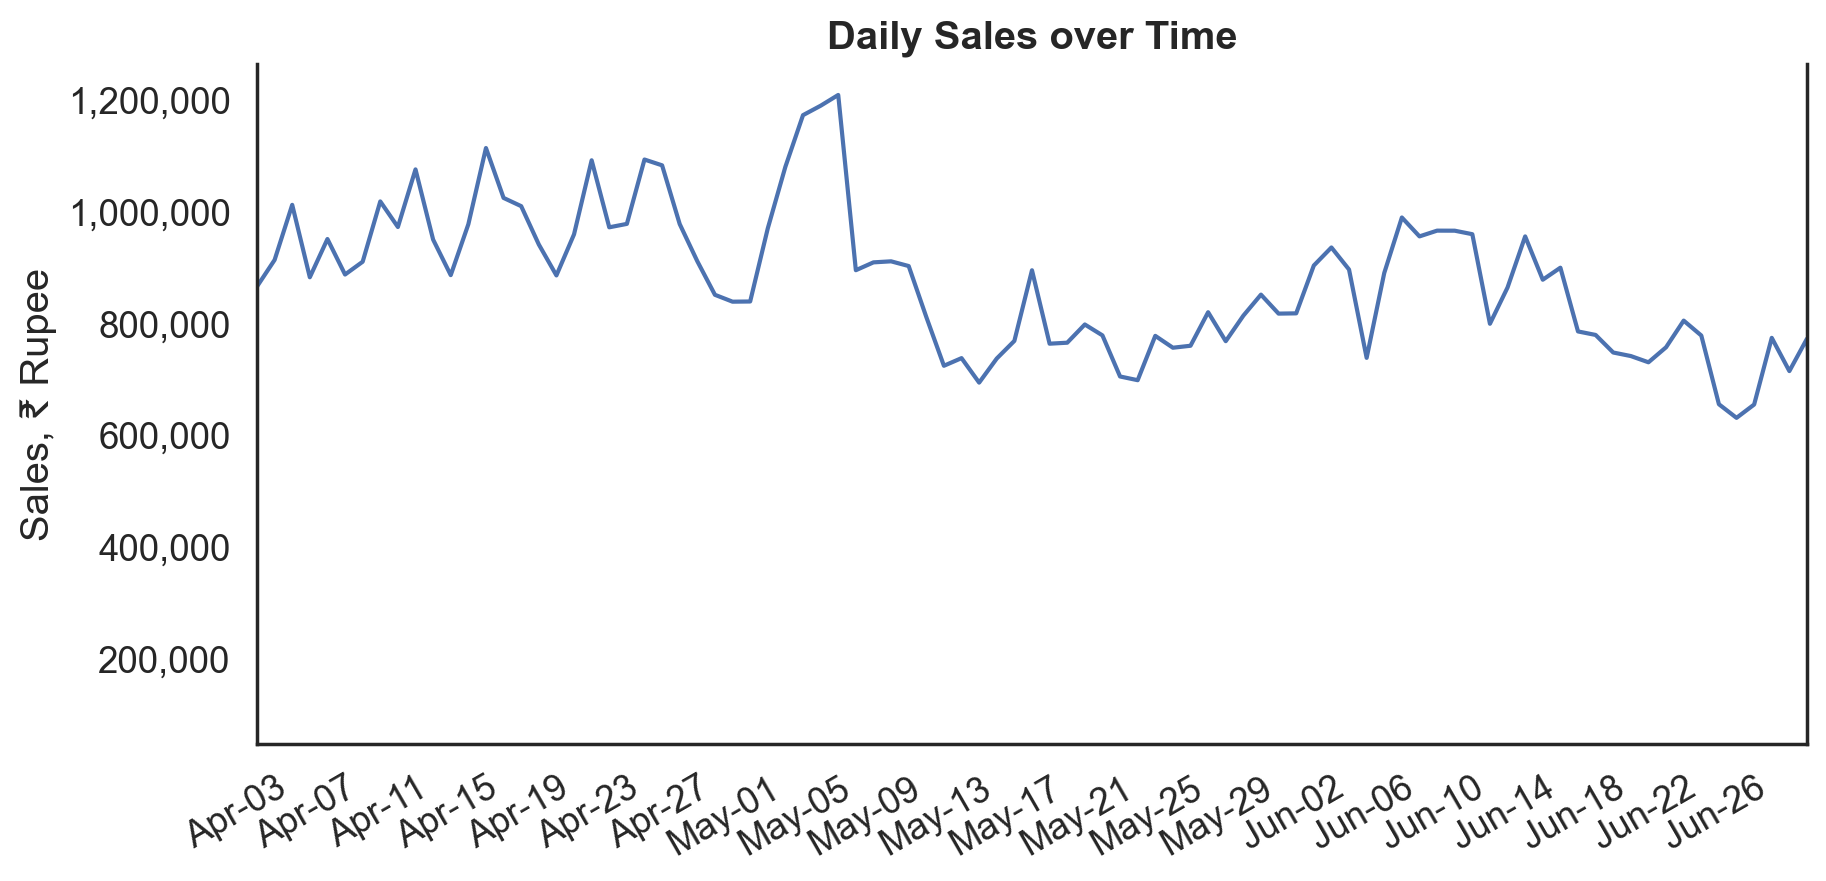

In [72]:
# plot the daily sales over time
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_sales.index, daily_sales.values)

plt.xlim(start_date, end_date) # set the x-axis label format and ticks


plt.ylabel('Sales, ₹ Rupee')
plt.title('Daily Sales over Time', fontweight='bold')

plt.gca().spines['right'].set_visible(True)  # removing the borders of the graph
plt.gca().spines['top'].set_visible(False)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # make the y-axis ticks have a comprehensive standard 
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4)) # adjust the number for the interval of x-axis ticks

plt.gcf().autofmt_xdate()  # format the date for the x-axis, so it is with an angle and Month-date format  
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.savefig('daily_sales_2.png',dpi=1000)
plt.show()

Making multiple adjustments, we can see a much better graph. 

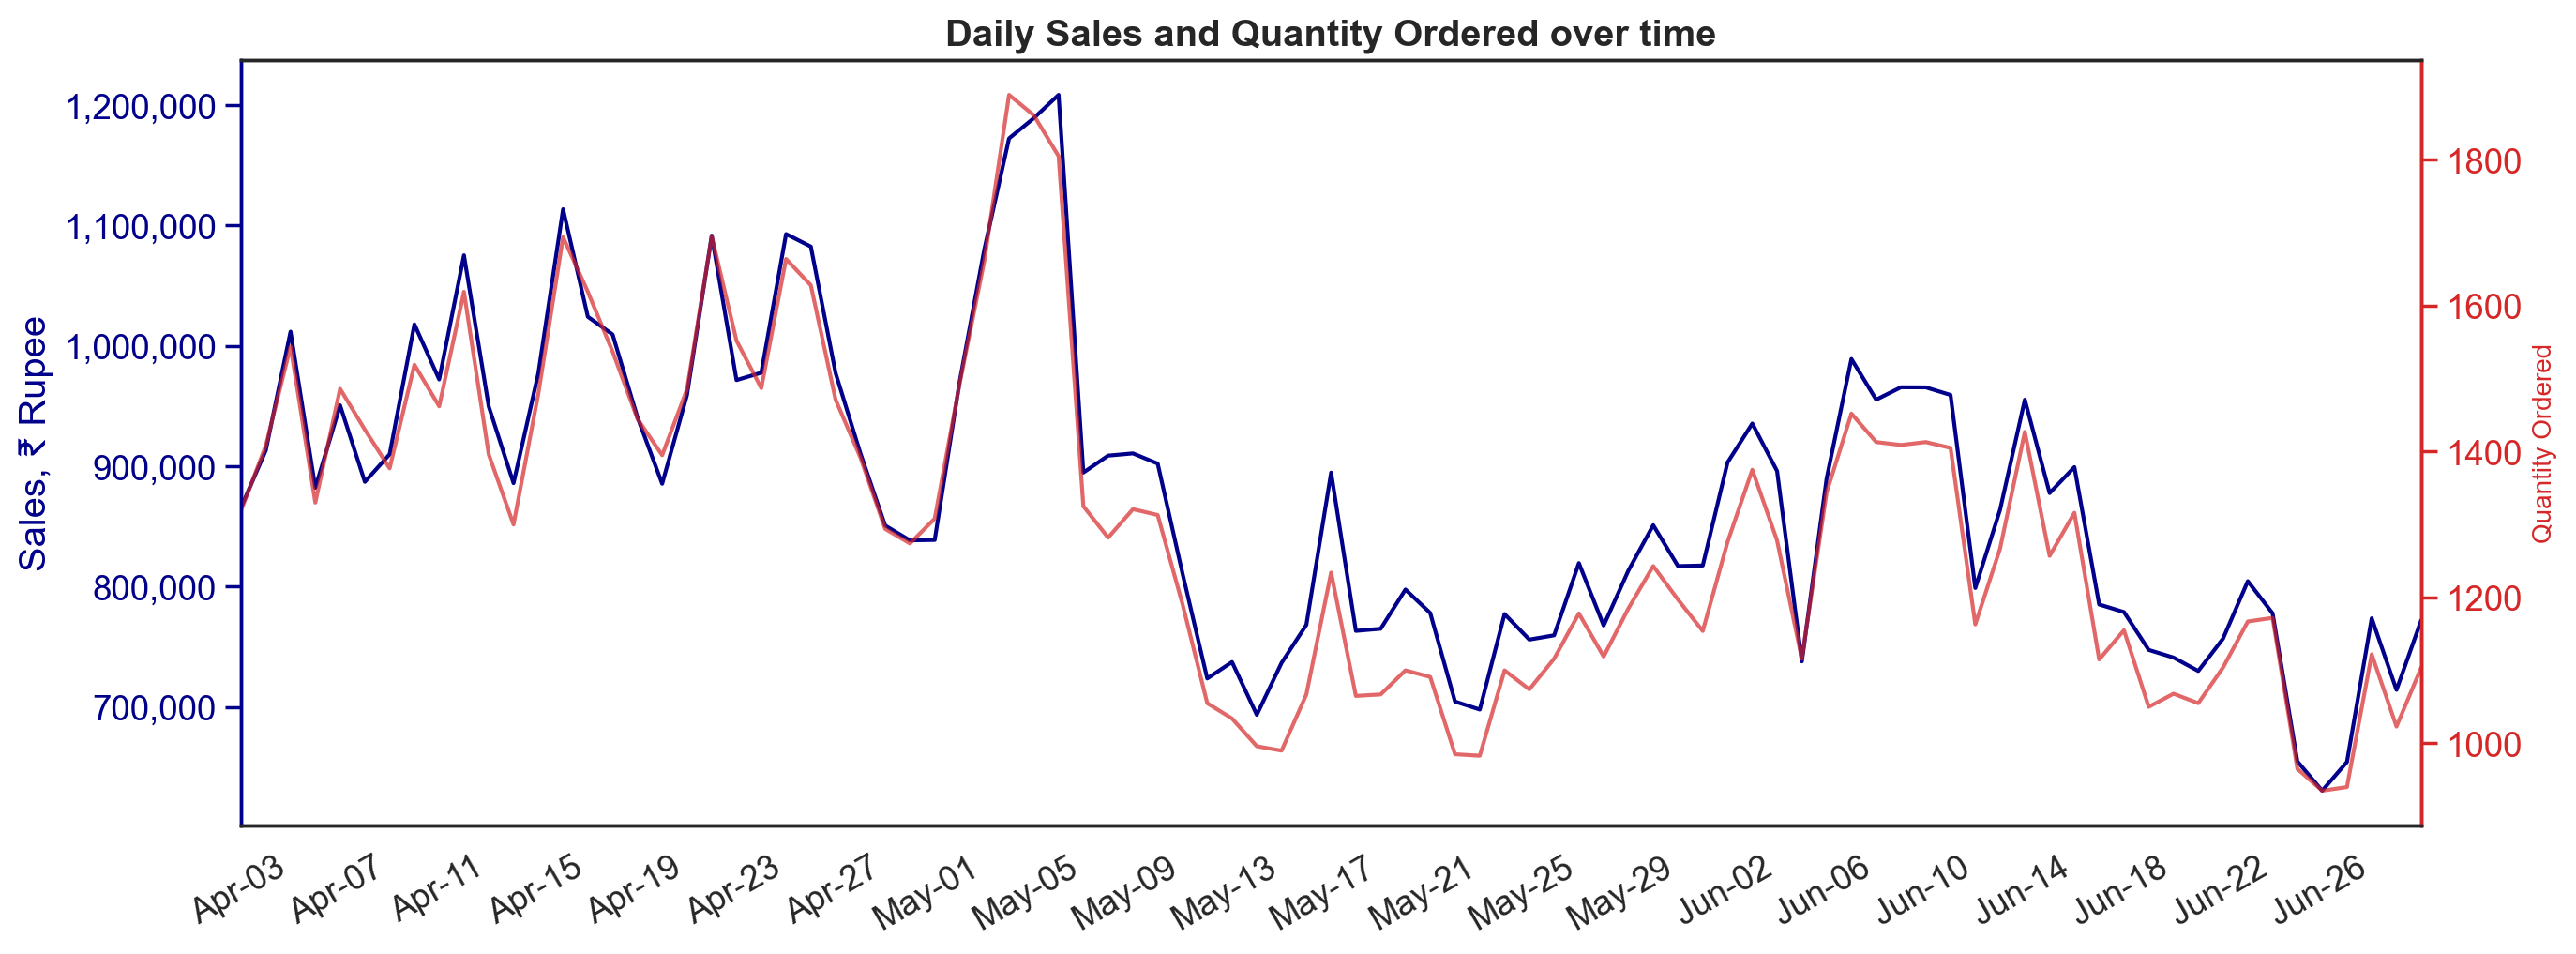

In [73]:
# convert date column to datetime
clean['date'] = pd.to_datetime(clean['date'])

# resample order_amount by date, and then sum the amounts by day
daily_sales = clean.set_index('date')['order_amount'].resample('D').sum()
daily_sales.index = pd.to_datetime(daily_sales.index)

daily_quantity_ordered = clean.set_index('date')['quantity_ordered'].resample('D').sum()
daily_quantity_ordered.index = pd.to_datetime(daily_quantity_ordered.index)


# plot the daily sales and daily quantity ordered over time, adding labels and a legend
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(daily_sales.index, daily_sales.values, label='Total Sales Amount', c="darkblue")

# set the x-axis label format and ticks
plt.xlim(start_date, end_date)

plt.ylabel('Sales, ₹ Rupee',c="darkblue" )
plt.title('Daily Sales and Quantity Ordered over time', fontweight='bold')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.gcf().autofmt_xdate()

myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(daily_quantity_ordered.index, daily_quantity_ordered.values,
         color="tab:red",
         alpha=0.7,
         label='Total Quantity Ordered')
ax2.set_ylabel("Quantity Ordered",color="tab:red",fontsize=10)

ax2.spines['left'].set_color('darkblue')  
ax.tick_params(axis='y', colors='darkblue')

ax2.spines['right'].set_color('tab:red')  
ax2.tick_params(axis='y', colors='tab:red')
plt.savefig('daily_sales_and_quantity.png',dpi=1000)

plt.show()


Adding the Quantity Ordered line on the second y-axis shows near perfect correlation, which makes this graph not valuable for the analysis.  

## Celebrations

After the initial inspection of the orders in the 3 months timeframe, we would like to identify the main patterns and potential reasons for the spikes in demand. One spike in May is particulary interesting, the first assumption would be the number of holidays which can suggest higher spending during the off work time.

It would be beneficial to add the markers for all the holidays in India to see if there is a pattern. We have compiled all the holidays during 2022 from this source: https://www.timeanddate.com/holidays/india/2022   

In [74]:
celebrations = pd.read_excel('celebration.xlsx')
celebrations.head()

Date   Column1                       Name                Type  \
0 2022-01-01  Saturday             New Year's Day  Restricted Holiday   
1 2022-01-09    Sunday  Guru Govind Singh Jayanti  Restricted Holiday   
2 2022-01-13  Thursday                      Lohri  Restricted Holiday   
3 2022-01-14    Friday                     Pongal  Restricted Holiday   
4 2022-01-14    Friday            Makar Sankranti  Restricted Holiday   

   Unnamed: 4 Unnamed: 5                                       Unnamed: 6  
0         NaN       Data  https://www.timeanddate.com/holidays/india/2022  
1         NaN        NaN                                              NaN  
2         NaN        NaN                                              NaN  
3         NaN        NaN                                              NaN  
4         NaN        NaN                                              NaN

In [75]:
celebrations = celebrations.iloc[:,0:4]  # remove the NaN columns

In [76]:
celebrations.rename(columns = {"Date":"date","Column1":"day","Name":"name","Type":"type"}, inplace = True)
# renaming all the columns for the ease of use

In [77]:
celebrations.drop(celebrations.loc[celebrations['type']=='Observance, Christian'].index, inplace=True)
celebrations.drop(celebrations.loc[celebrations['type']=='Observance'].index, inplace=True)
celebrations.drop(celebrations.loc[celebrations['type']=='Season'].index, inplace=True)
celebrations.drop(celebrations.loc[celebrations['type']=='Muslim, Common local holiday'].index, inplace=True)

In the cell above, we remove all the holidays that are not restricted or gazetted. 

"The Restricted holiday is also called an Optional holiday in the Indian leave management policy."  (.1.)

"Gazetted holidays, consists of a list of holidays that are mandatory once decided" (.2.)

This is done because, each Indian state has excepetions towards the holidays, some states might not celebrate it. We therefore, only look into the most common and national celebrations or "Gazetted holidays". 

Finally, there is a different term such as 'Public holiday'. (.2.)

"There is no uniform definition of a public holiday around the world. On this site we use it to indicate a day when public and private sector workers have a holiday on a day which would otherwise be a working day." 


Because of these inaccuracies, we would like to create two separate datasets. One for "Restricted and Gazetted" and the other one for "Public Holidays".


References:


(.1.) https://www.keka.com/glossary/restricted-holiday#:~:text=The%20Restricted%20holiday%20is%20also,wants%20to%20avail%20the%20same.

(.2.) https://www.officeholidays.com/about/definitions#:~:text=The%20meaning%20of%20the%20term,observe%20the%20holiday%20as%20well.

In [78]:
print(clean['date'].max())
print(clean['date'].min())

2022-06-28 00:00:00
2022-04-01 00:00:00


After this, we check our timeframes for our analysis which are : 2022-06-28 and 2022-04-01. We therefore can drop all the holidays which are not in this time frame. 

In [79]:
celebrations = celebrations[(celebrations['date'] > "2022-04-01") & (celebrations['date'] < '2022-06-28')]

In [80]:
celebrations = celebrations.drop_duplicates(subset='date', keep="first").reset_index()
celebrations = celebrations.replace("Mahavir Jayanti", "Vaisakhi")

Some holidays seem to have an overlap, where 2022-04-14 has three different celebrations, this can be considered as a duplicate and be removed. Manual check is needed and therefore, only the most common are inspected.


In [81]:
celebrations

index       date       day                            name  \
0     18 2022-04-02  Saturday                Chaitra Sukhladi   
1     21 2022-04-10    Sunday                     Rama Navami   
2     23 2022-04-14  Thursday                        Vaisakhi   
3     27 2022-04-15    Friday                     Good Friday   
4     29 2022-04-17    Sunday                      Easter Day   
5     30 2022-04-29    Friday  Jamat Ul-Vida (Tentative Date)   
6     32 2022-05-03   Tuesday          Ramzan Id/Eid-ul-Fitar   
7     35 2022-05-09    Monday        Birthday of Rabindranath   
8     36 2022-05-16    Monday            Buddha Purnima/Vesak   

                 type  
0  Restricted Holiday  
1  Restricted Holiday  
2    Gazetted Holiday  
3    Gazetted Holiday  
4  Restricted Holiday  
5  Restricted Holiday  
6    Gazetted Holiday  
7  Restricted Holiday  
8    Gazetted Holiday

Finally, we see a clean set of 9 holidays in our timeframe that can be mapped.

In [82]:
public_celebrations = celebrations.copy()

In [83]:
public_celebrations.drop(public_celebrations.loc[public_celebrations['name']=='Chaitra Sukhladi'].index, inplace=True)
public_celebrations.drop(public_celebrations.loc[public_celebrations['name']=='Easter Day'].index, inplace=True)
public_celebrations.drop(public_celebrations.loc[public_celebrations['name']=='Jamat Ul-Vida'].index, inplace=True)
public_celebrations.drop(public_celebrations.loc[public_celebrations['name']=='Birthday of Rabindranath'].index, inplace=True)

In [84]:
public_celebrations

index       date       day                            name  \
1     21 2022-04-10    Sunday                     Rama Navami   
2     23 2022-04-14  Thursday                        Vaisakhi   
3     27 2022-04-15    Friday                     Good Friday   
5     30 2022-04-29    Friday  Jamat Ul-Vida (Tentative Date)   
6     32 2022-05-03   Tuesday          Ramzan Id/Eid-ul-Fitar   
8     36 2022-05-16    Monday            Buddha Purnima/Vesak   

                 type  
1  Restricted Holiday  
2    Gazetted Holiday  
3    Gazetted Holiday  
5  Restricted Holiday  
6    Gazetted Holiday  
8    Gazetted Holiday

## Holiday Graph

Before we begin the inspection and visualisation of the holidays. It is useful to query the data and see which holiday days brought the most revenue or have the highest `order_amount`.

In [85]:
# create a list of holiday dates
holiday_dates = celebrations['date'].values
holiday_dates = pd.to_datetime(holiday_dates)

# extract sales amount for the dates that have holidays
holiday_sales = daily_sales.loc[holiday_dates]

# extract sales amount for the dates that fall on day of interest
weekend_sales = daily_sales[daily_sales.index.weekday.isin([6])]     #  add 5 or 6 for the weekends (Sat and Sunday)

In [86]:
holiday_sales_transformed = holiday_sales.to_frame().sort_values(by='order_amount', ascending=False).reset_index()

In [87]:
merged_public_hol = public_celebrations.merge(holiday_sales_transformed, left_on='date', right_on='index')
merged_public_hol = merged_public_hol.drop(['index_x', 'index_y'], axis=1)
merged_public_hol = merged_public_hol.sort_values(by='order_amount', ascending=False)

In [88]:
merged_public_hol

date       day                            name                type  \
4 2022-05-03   Tuesday          Ramzan Id/Eid-ul-Fitar    Gazetted Holiday   
1 2022-04-14  Thursday                        Vaisakhi    Gazetted Holiday   
0 2022-04-10    Sunday                     Rama Navami  Restricted Holiday   
2 2022-04-15    Friday                     Good Friday    Gazetted Holiday   
3 2022-04-29    Friday  Jamat Ul-Vida (Tentative Date)  Restricted Holiday   
5 2022-05-16    Monday            Buddha Purnima/Vesak    Gazetted Holiday   

   order_amount  
4    1189200.59  
1    1113487.56  
0    1075234.03  
2    1024143.13  
3     838703.65  
5     763146.91

Inspecting the Public holidays, we can see that  Eid al-Fitr, brought the most sales. It is hard to determine whether there is an impact solely based on these numbers and would require additional proof.

We therefore, would like to test the intial hypothesis and see if these holidays have a high degree of popularity in India. 
By utilising the Google Trends data, which unfortunately allows to only compare 5 search terms. Shows that there is a collosal difference in searches that could be argued as a proxy for their popularity.

For the Google Trends to be working fairly well, we need to adjust the search options, where each keayword should be a celebration, festivity or a holiday. Otherwise, the general search will skew the data.

Source:

https://trends.google.com/trends/explore?date=2022-04-01%202022-05-10&geo=IN&q=%2Fm%2F0148n3,%2Fm%2F04snl_,%2Fm%2F06wrcw,%2Fm%2F0fx7_,%2Fm%2F0cs_24


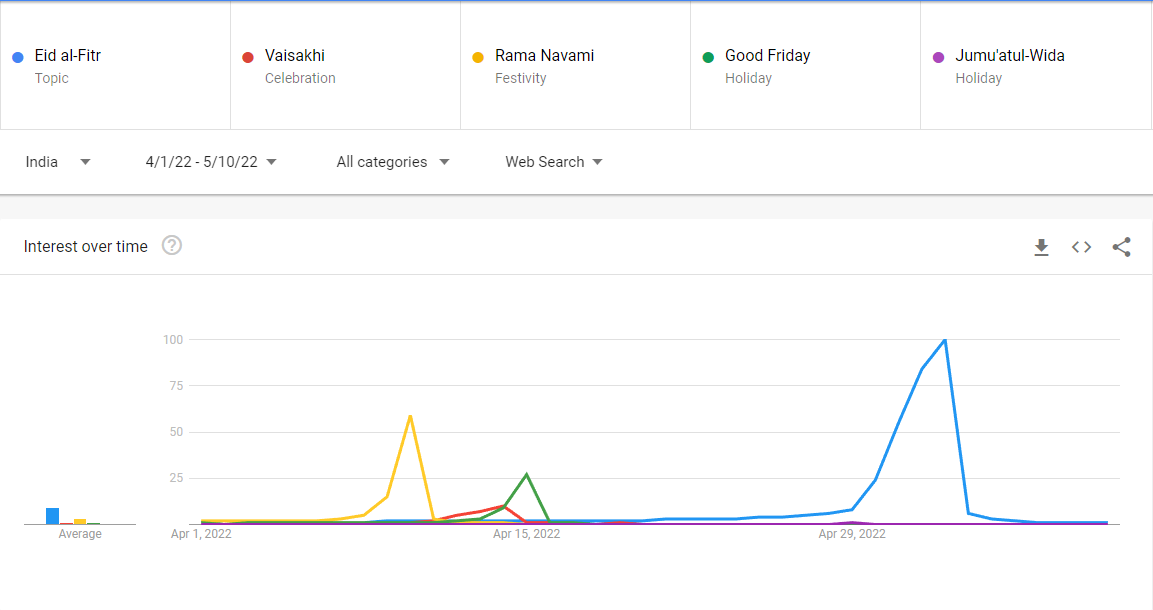

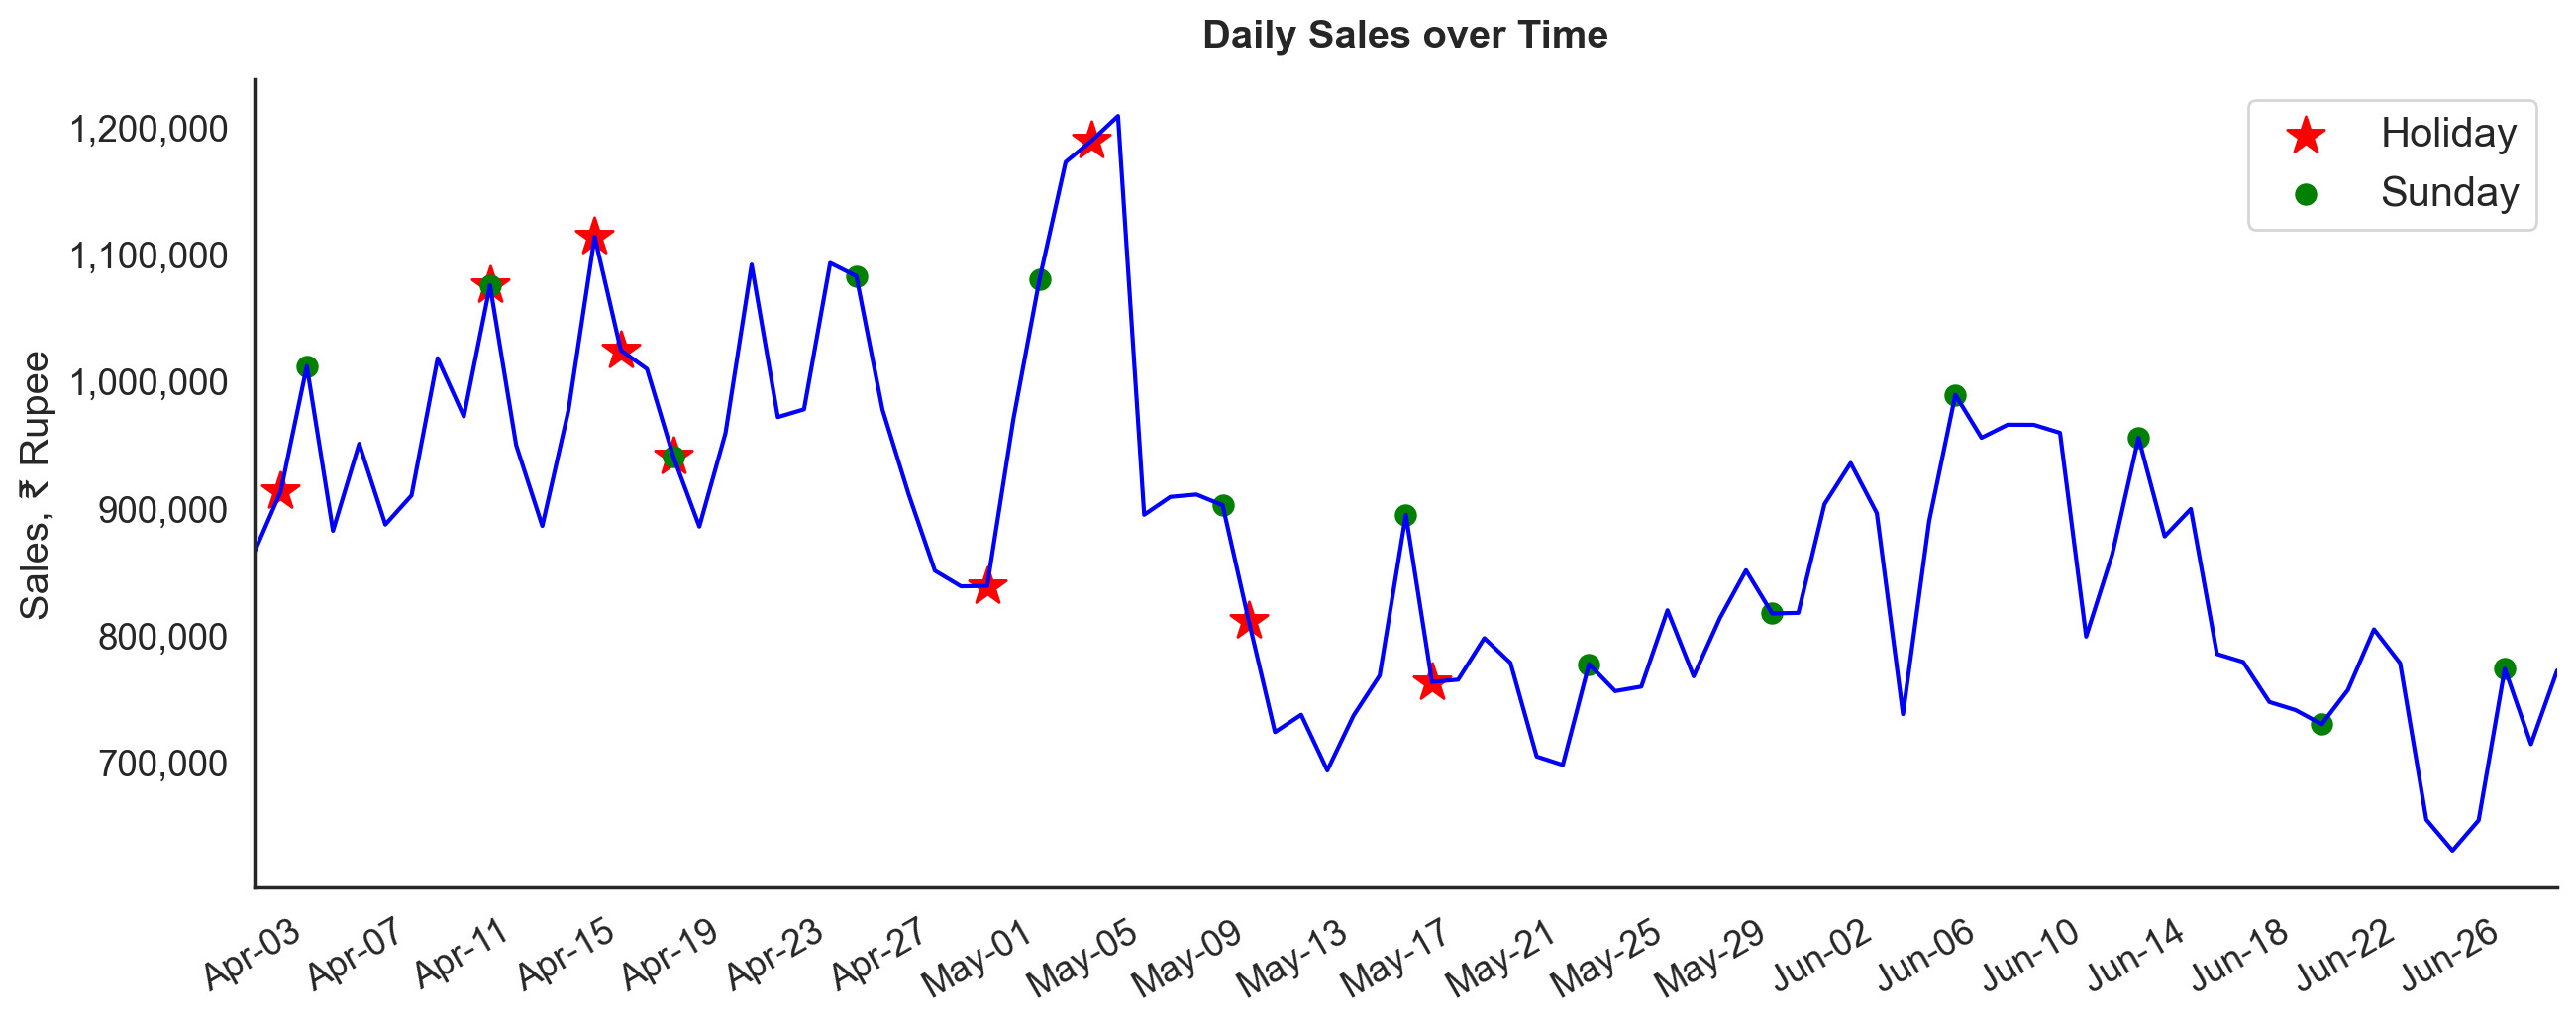

In [89]:
fig, ax = plt.subplots(figsize=(15, 6))

# plot the lines
ax.plot(daily_sales.index, daily_sales.values, c='blue')

# plot scatter plot for the dates that have holidays
ax.scatter(holiday_sales.index, holiday_sales.values, marker='*', s=200, color='red', label='Holiday')

# plot scatter plot for the dates that fall on Sundays
ax.scatter(weekend_sales.index, weekend_sales.values, marker='o', s=50, color='green', label='Sunday')

plt.xlim(start_date, end_date) # set the x-axis label format and ticks

plt.title('Daily Sales over Time', fontweight='bold', y=1.02) # Title settings

plt.gca().spines['right'].set_visible(False) # removing the borders of the graph
plt.gca().spines['top'].set_visible(False)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # make the y-axis ticks have a comprehensive standard 
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))   # adjust the number for the interval of x-axis ticks

plt.gcf().autofmt_xdate() # format the date for the x-axis, so it is with an angle and Month-date format  
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)

ax.legend(fontsize=15, loc = 'best') # Legend size and position 

plt.ylabel('Sales, ₹ Rupee') # y-axis labels
plt.savefig('daily_sales_time_1.png',dpi=1000)
plt.show()


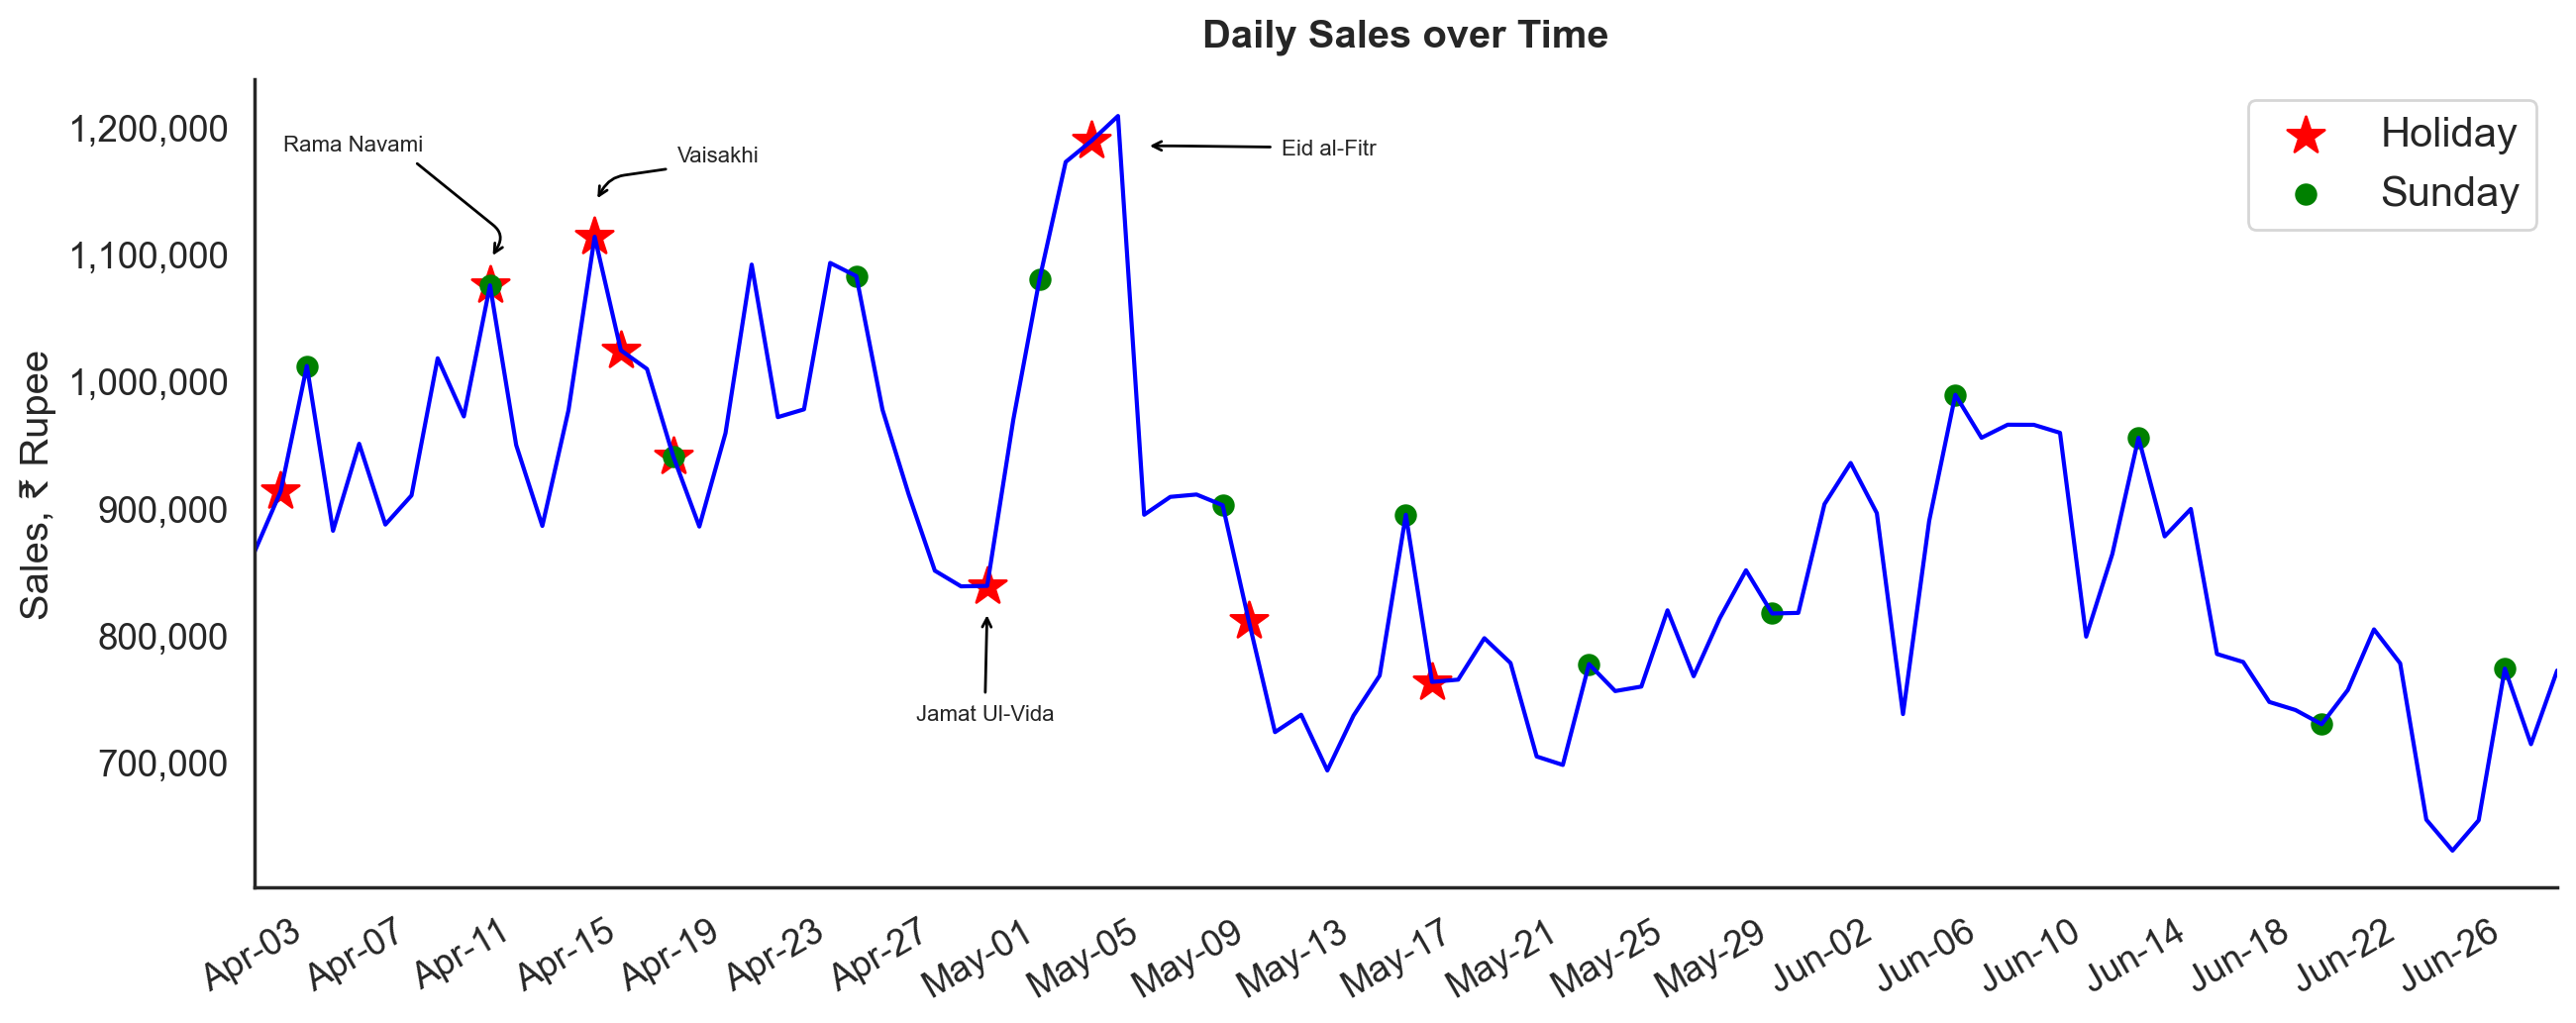

In [90]:
fig, ax = plt.subplots(figsize=(15, 6))

# plot the lines
ax.plot(daily_sales.index, daily_sales.values, c='blue')

# plot scatter plot for the dates that have holidays
ax.scatter(holiday_sales.index, holiday_sales.values, marker='*', s=200, color='red', label='Holiday')

# plot scatter plot for the dates that fall on Sundays
ax.scatter(weekend_sales.index, weekend_sales.values, marker='o', s=50, color='green', label='Sunday')

plt.xlim(start_date, end_date) # set the x-axis label format and ticks

plt.title('Daily Sales over Time', fontweight='bold', y=1.02) # Title settings

plt.gca().spines['right'].set_visible(False) # removing the borders of the graph
plt.gca().spines['top'].set_visible(False)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # make the y-axis ticks have a comprehensive standard 
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))   # adjust the number for the interval of x-axis ticks

plt.gcf().autofmt_xdate() # format the date for the x-axis, so it is with an angle and Month-date format  
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)

ax.legend(fontsize=15, loc = 'best') # Legend size and position 

# Annotations 
dr = pd.date_range('2022-04-01', '2022-06-28', freq='1D') # Transformation for the dates as x-coordinates
ax.annotate(
    'Eid al-Fitr', # title 
    xy=(dr[34], 1185000), xycoords='data',  # coordinates of the point of arrow 
    xytext=(+50, -3), textcoords='offset points',  # bending style of the text title
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=40,angleB=0,armB=30,rad=15"), size=8)
    #dict(arrowstyle="->"),color='black', size=8)

ax.annotate(
    'Jamat Ul-Vida',
    xy=(dr[28], 820000), xycoords='data',
    xytext=(-26, -40), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=0,angleB=0,armB=0,rad=0"), size=8)
    #dict(arrowstyle="->"),color='black', size=8)

ax.annotate(
    'Rama Navami',
    xy=(dr[9], 1095000), xycoords='data',
    xytext=(-75, 40), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=40,angleB=60,armB=30,rad=15"), size=8)
    #dict(arrowstyle="->"),color='black',size=8)

ax.annotate(
    'Vaisakhi',
    xy=(dr[13], 1140000), xycoords='data',
    xytext=(30, 15), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=40,angleB=60,armB=30,rad=15"), size=8)

plt.ylabel('Sales, ₹ Rupee') # y-axis labels
plt.savefig('daily_sales_time_2.png',dpi=1000)
plt.show()


After adding the holidays and sundays as markers we can see a clear pattern. Inspecting, the line chart of sales, we can see that nearly every sunday is a local maximum for various weeks. 

Inspecting the stars, or the Holiday days we can see an interesting pattern for the commencing week of April 19th. There are three consecutive holidays in mid April, which can explain why that specific Sunday which is also overalapping with Easter Day, is close to be the local minimum.


The main pattern of interest is the peak around May 4th. This peak, seems to be a near outlier level and therefore required a further imvestigation. After some research, we found that on the Eid al-Fitr evening, "people head to markets to finish their shopping for Eid, for clothing and gifts, and begin preparing their food for the next day." (.3.)

This Tradition during Eid al-Fitr seem to explain the spike in shopping habits very well.

(.3.)
https://en.wikipedia.org/wiki/Eid_al-Fitr


Holidays play a vital role in peoples live and it therefore can significantly affect the sale patterns for any business. One of the intial recommendations would be to target all the incoming customers during such peak periods, launch even more intesive ad campaign before Eid al-Fitr as well as the week commencing 8th of April which covers  Vaisakhi and Rama Navami celebrations. This analysis needs repetition every year due to changes calendar changes. 

Secondly, all the Amazon Warehouses should be stocked at a higher rate than usual. Otherwise, meeting the customer expectations may become troublesome, which will impact the number of returns.

## Mean inspection by the day of the week 

To create the visualisaion for the day of the week mean and inspect the patterns between specific days, we need to create the dataframe that holds this information.

In [91]:
daily_sales_days = clean.set_index('date')['order_amount'].resample('D').sum()
daily_sales_days= daily_sales_days.to_frame().reset_index()
daily_sales_days['day_of_week'] = daily_sales_days['date'].dt.day_name()
daily_sales_days 

date  order_amount day_of_week
0  2022-04-01     865478.60      Friday
1  2022-04-02     913101.53    Saturday
2  2022-04-03    1011763.38      Sunday
3  2022-04-04     882059.17      Monday
4  2022-04-05     950544.05     Tuesday
..        ...           ...         ...
84 2022-06-24     630349.29      Friday
85 2022-06-25     654234.58    Saturday
86 2022-06-26     773610.02      Sunday
87 2022-06-27     714124.67      Monday
88 2022-06-28     772085.53     Tuesday

[89 rows x 3 columns]

In [92]:
# order the days of week
daily_sales_days['day_of_week'] = pd.Categorical(daily_sales_days['day_of_week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Create the means dataframe for each days of the week 
means = daily_sales_days.groupby('day_of_week')['order_amount'].mean()
means

day_of_week
Monday       870616.087692
Tuesday      883672.543846
Wednesday    902732.965833
Thursday     854644.451667
Friday       830870.046154
Saturday     871807.736154
Sunday       925312.715385
Name: order_amount, dtype: float64

In [93]:
print(daily_sales_days['order_amount'].max()) # This command is used to understand the y-axis limits for the graphs
print(daily_sales_days['order_amount'].min())

1208509.17
630349.29


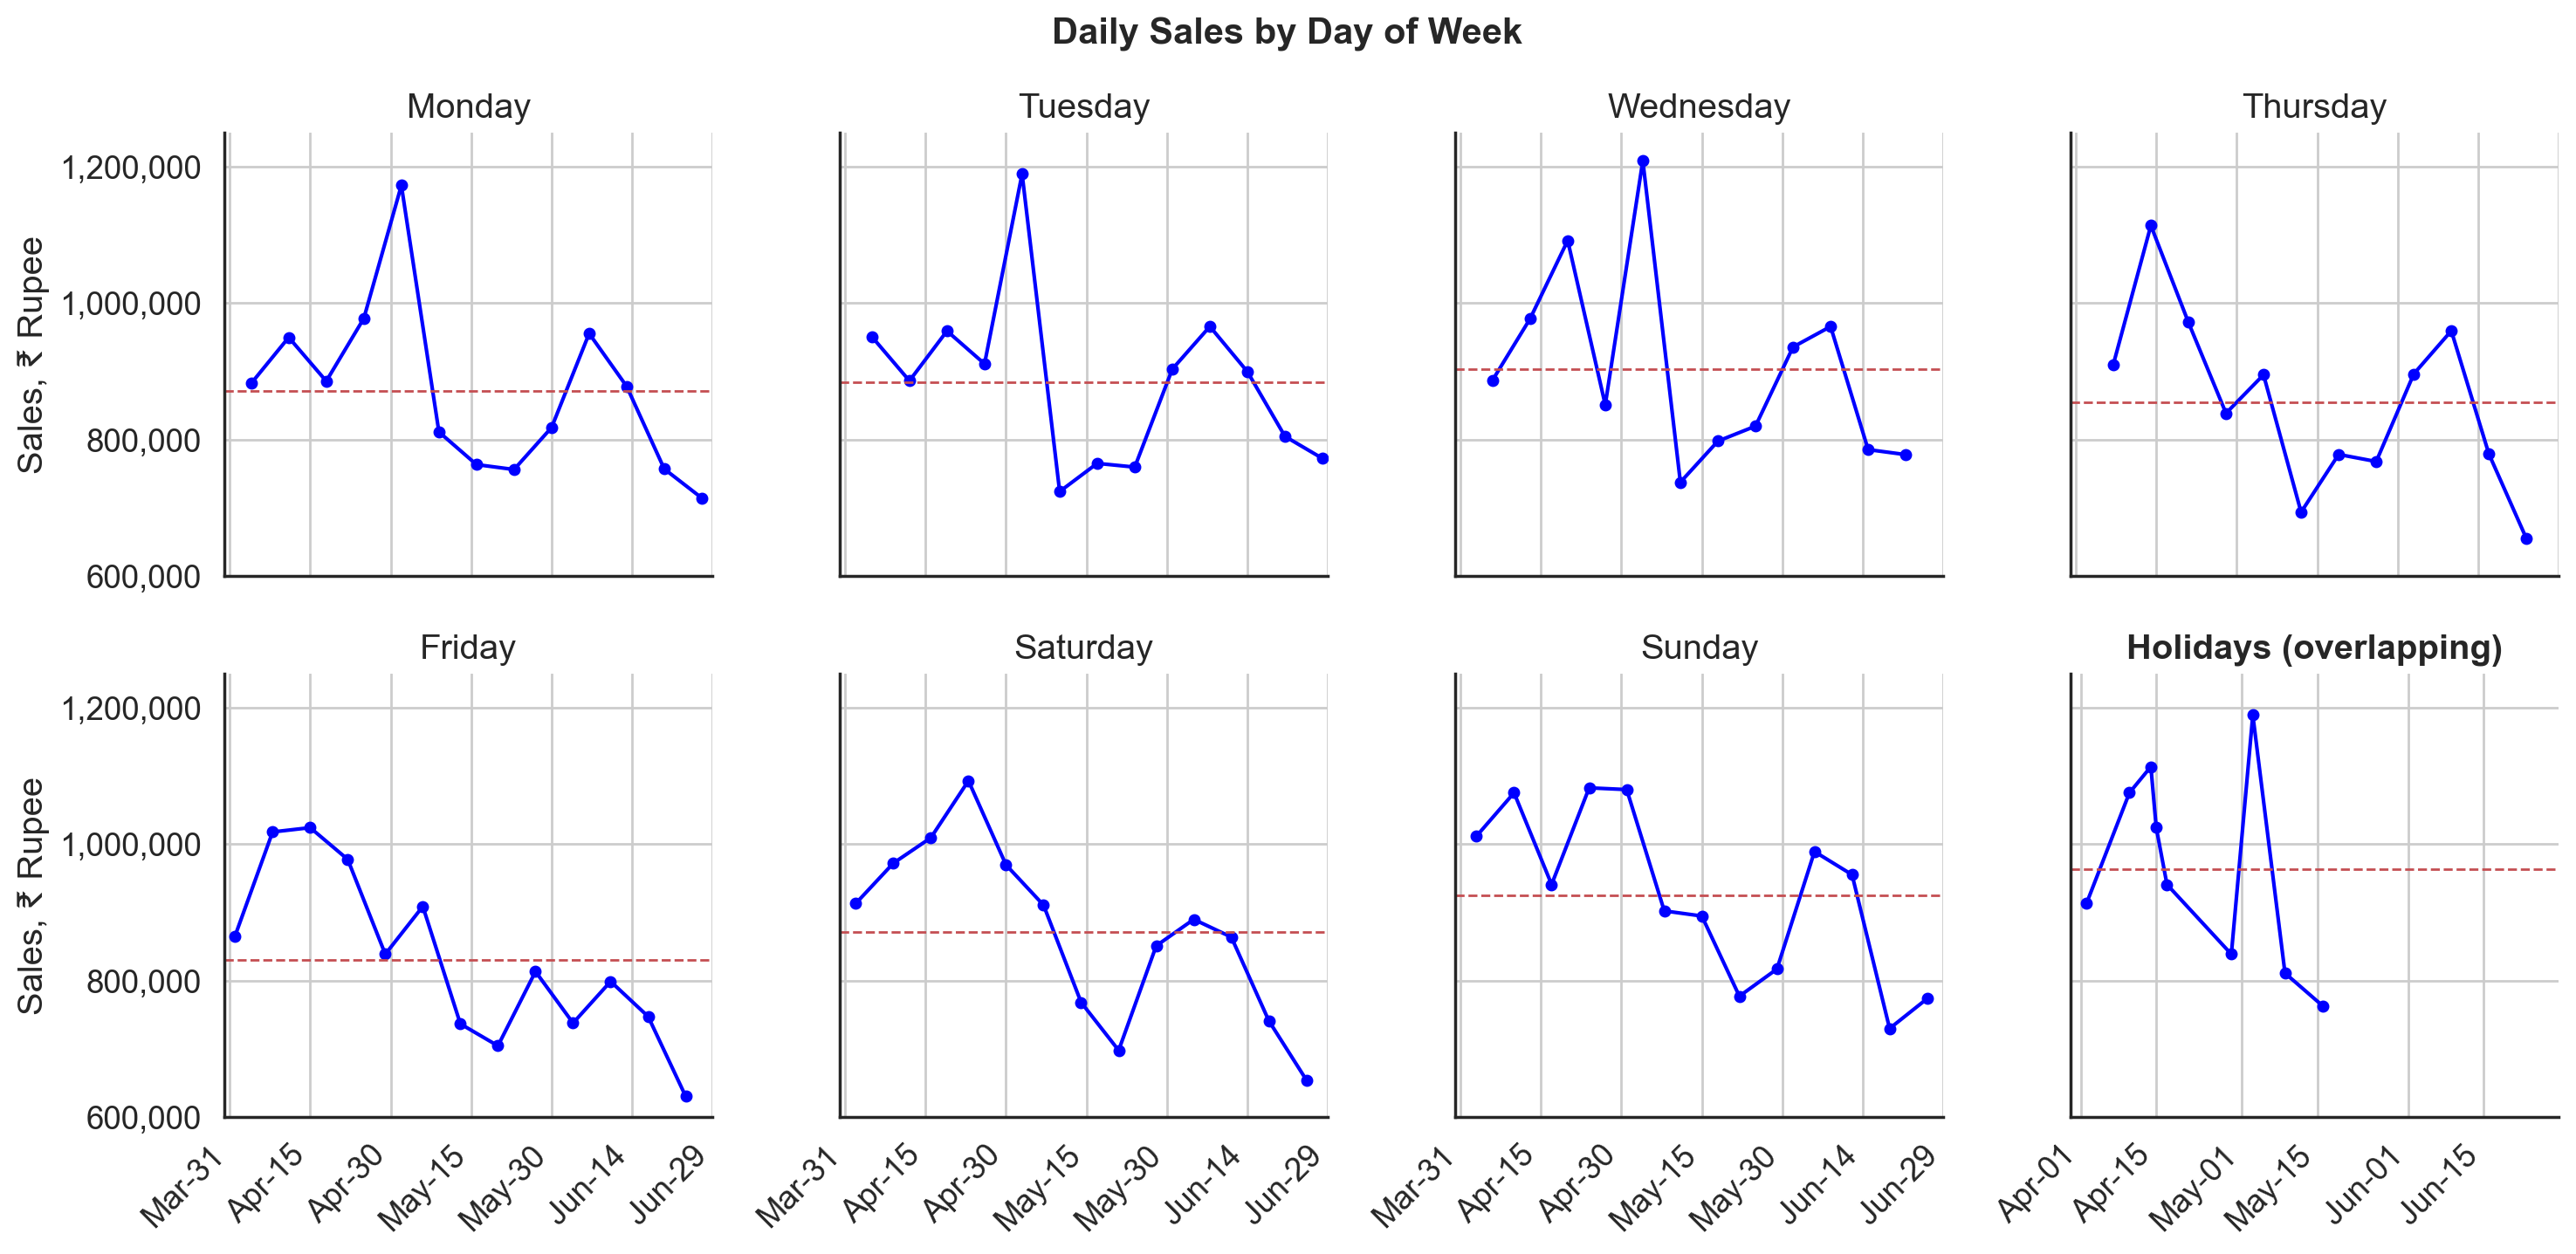

In [94]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))  # creates two rows with 4 graphs
axes = axes.ravel() # flatten the list of the axis

start_date = pd.to_datetime('2022-03-30') # sets the time frame for X-axes, slightly bigger for visibility
end_date = pd.to_datetime('2022-06-29')

x_labels_format = mdates.DateFormatter('%b-%d')   # sets the format for the dates in X-axis

# a loop for the first 7 graphs, that enumarates through the clenaned daily_sales_days 
for i, (day, data) in enumerate(daily_sales_days.groupby('day_of_week')):
    ax = axes[i]
    ax.plot(data['date'], data['order_amount'], 'o-', markersize=4, c='blue')
    
    ax.set_title(day) # sub-title for the days
    
    ax.set_ylabel('Sales, ₹ Rupee') # Y-axis labels 
    
    ax.set_ylim(600000, 1250000) # limits the graphs to see the dots better
    ax.set_xlim(start_date, end_date) # assigns the time frame for X-axis
    
    ax.spines['right'].set_visible(False) # removes the borders 
    ax.spines['top'].set_visible(False)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # make the y-axis ticks have a comprehensive standard 
    
    ax.axhline(means[day], color='r', linestyle='--', linewidth=1) # draws a mean line 
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # interval for the X-axis ticks 
    
    ax.xaxis.set_major_formatter(x_labels_format) # formating for the X-axis labels 
    
    ax.grid(True) # grid for the charts
    
    if i < 4:
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # remove ticks for the first row
    if i % 4 != 0:    # remove Y-axis titles for all graphs except the first column 
        ax.set_ylabel('')
    if i % 4 != 0:   # removes the ticks for Y-axis for top graphs 
        ax.yaxis.set_ticklabels([])

    
# Formatting for the final (8th) graph     
ax = axes[7]
ax.plot(holiday_sales.index, holiday_sales.values,'o-' ,markersize=4, c='blue') # dots for each datapoint
    
ax.set_title('Holidays (overlapping)', fontweight='bold') # sub title
 
ax.set_ylim(600000, 1250000) # limits the graphs to see the dots better
ax.set_xlim(start_date, end_date) # assigns the time frame for X-axis
    
ax.spines['right'].set_visible(False) # removes the borders 
ax.spines['top'].set_visible(False)

ax.axhline(holiday_sales.values.mean(), color='r', linestyle='--', linewidth=1)   # mean line for the data

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # make the y-axis ticks have a comprehensive standard 
ax.xaxis.set_major_formatter(x_labels_format)
    
ax.grid(True) # grid for the charts
plt.gca().axes.yaxis.set_ticklabels([]) # remove Y-axis lables for the 8th graph


fig.autofmt_xdate(rotation=45) # rotate all the X-axis ticks for ease of reading

plt.tight_layout() # put graphs closer together    
plt.suptitle('Daily Sales by Day of Week', fontweight='bold', y=1.03, fontsize=15) # graph title 


plt.savefig('sales_day_of_week_1.png',dpi=1000, bbox_inches='tight')
plt.show()


These graphs are the first iteration, where we can see a massive difference between the days of the week, with the final 8th graph where we can see the Holidays(overlapping) graph. We can notice a much higher mean line compared to any other day of the week. 

However, this graph is not perfect and is now showing extensive quantitive results.


In [95]:
def human_format(num):  # formats any big numbers with various Letters e.g. K = 1000
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

Source for the above function: https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings

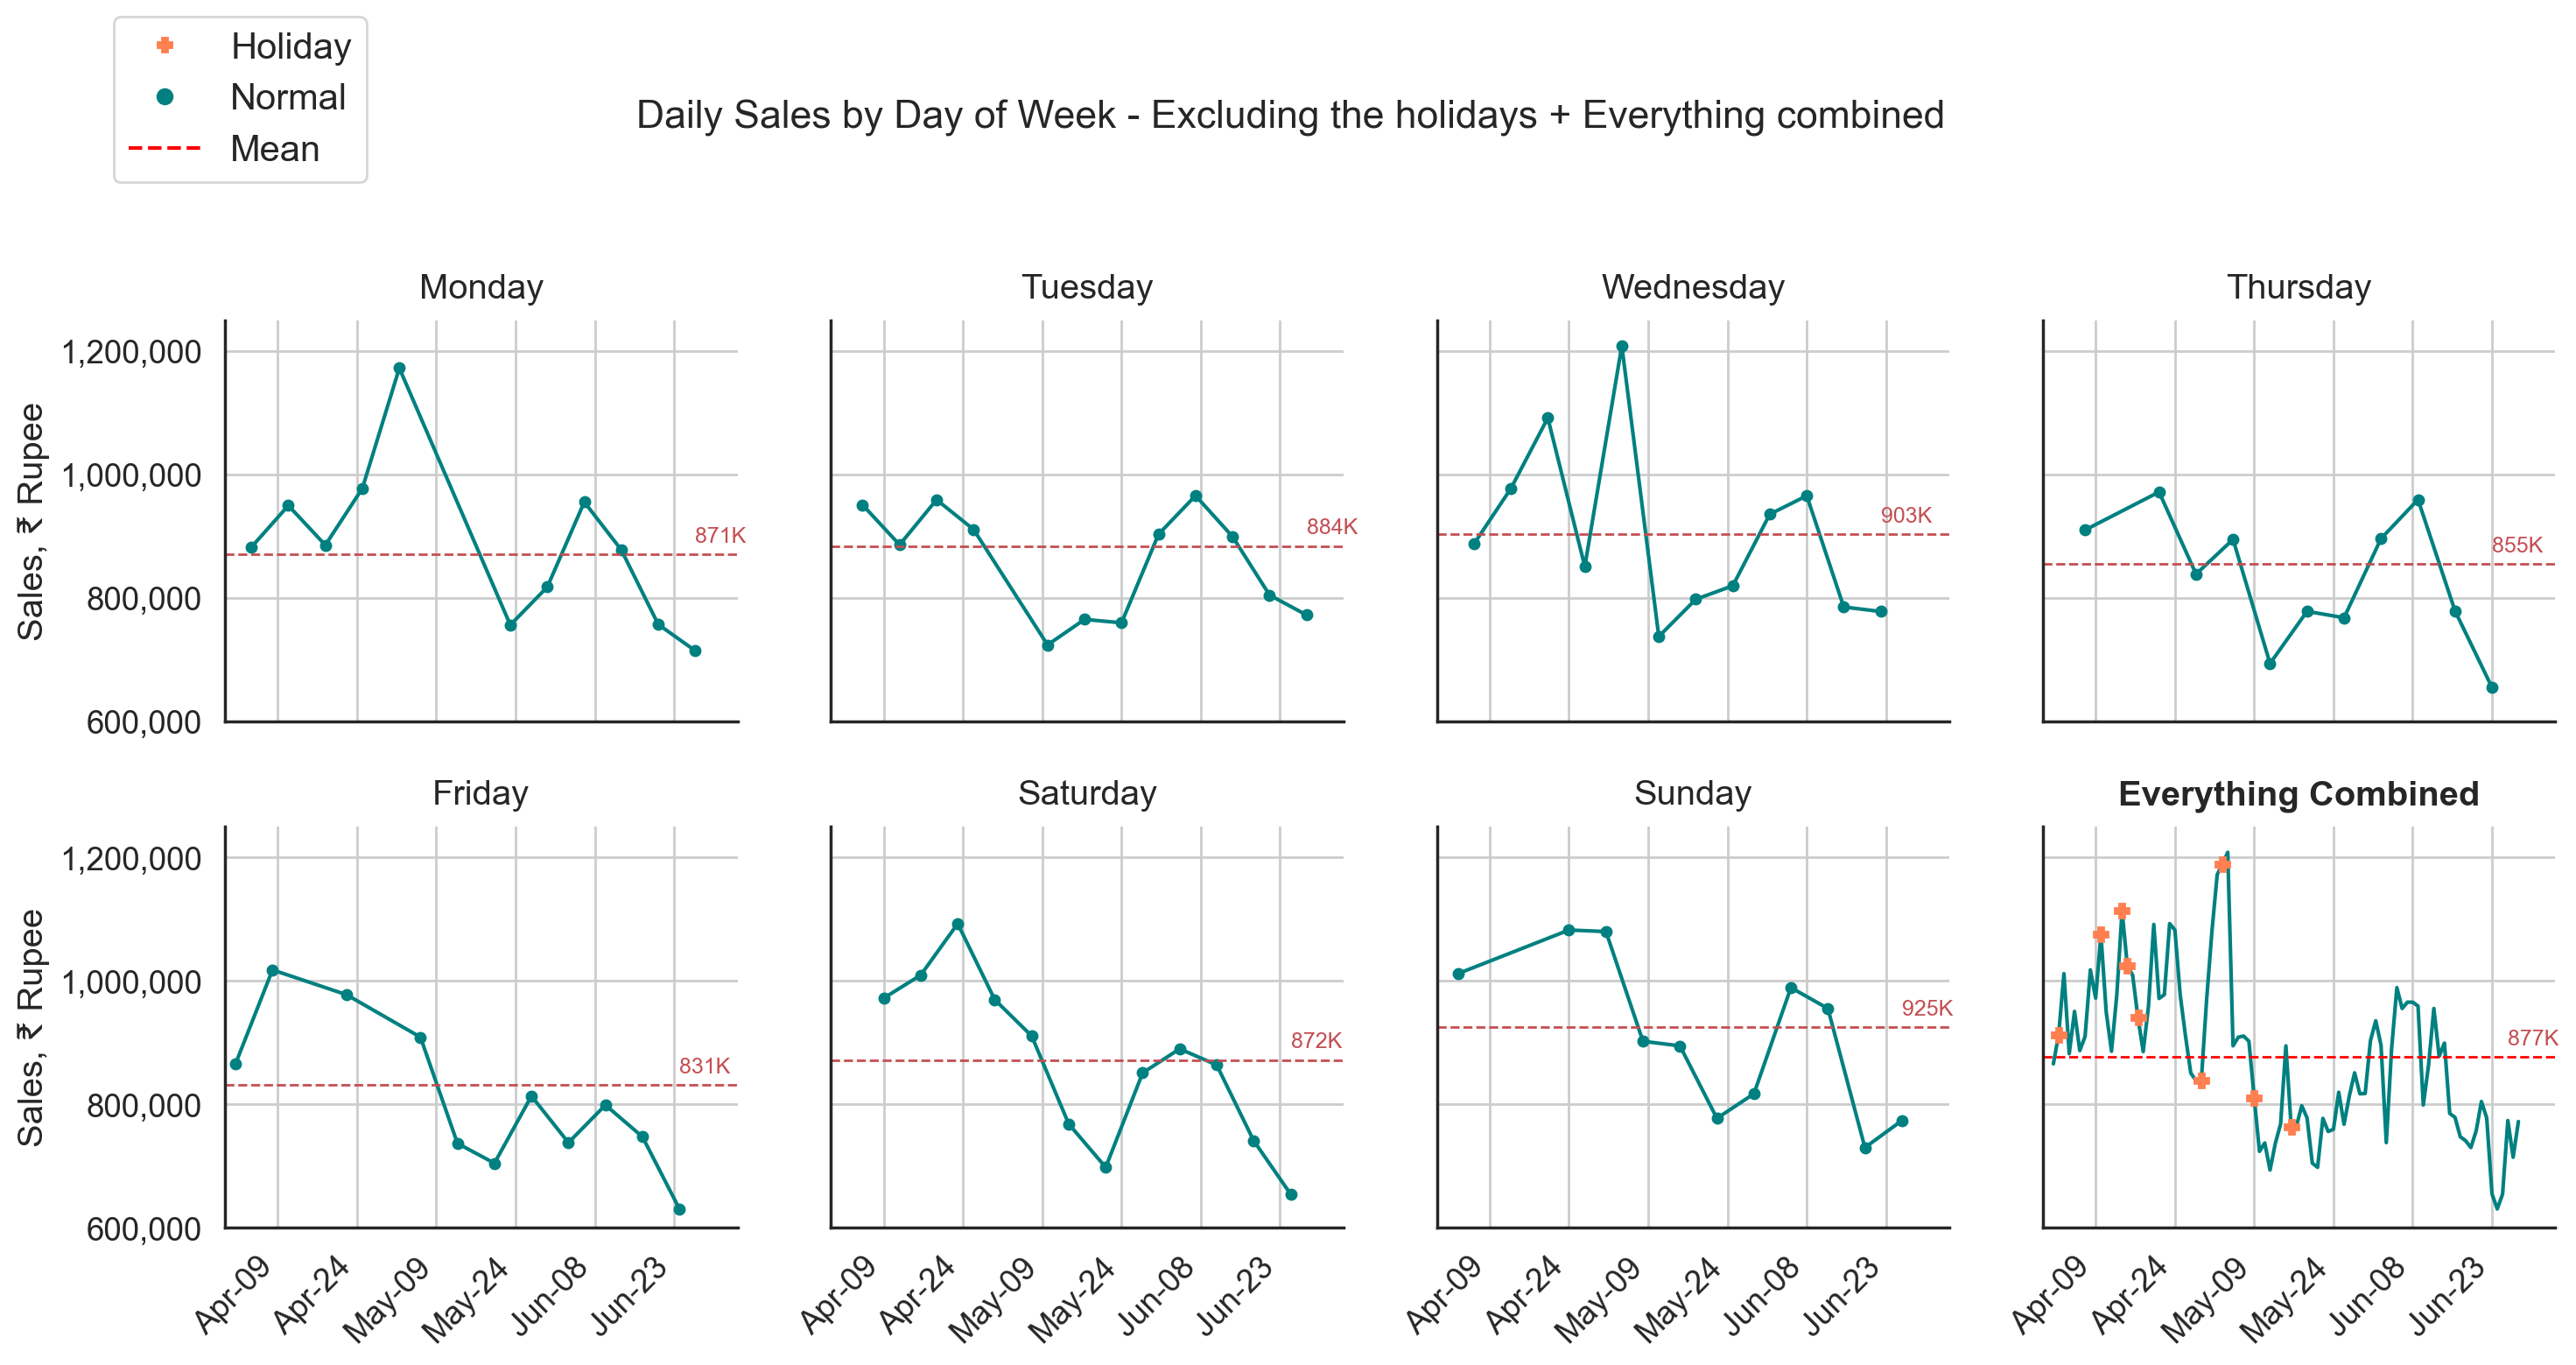

In [96]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7)) # creates two rows with 4 graphs
axes = axes.ravel() # flatten the list of the axis
 
start_date = pd.to_datetime('2022-03-30') # sets the time frame for X-axes, slightly bigger for visibility
end_date = pd.to_datetime('2022-07-05')

x_labels_format = mdates.DateFormatter('%b-%d') # sets the format for the dates in X-axis

# loop for the first 7 graphs, that enumarates through the clenaned daily_sales_days 
for i, (day, data) in enumerate(daily_sales_days.groupby('day_of_week')):
    ax = axes[i]
    
    # filter out holiday dates
    holiday_dates = celebrations['date'].values
    mask = np.in1d(data['date'].values, holiday_dates)
    sales_data = data[~mask]  # only non-holiday sales data
    
    ax.plot(sales_data['date'], sales_data['order_amount'], 'o-', markersize=4, color='teal')# plot non-holiday sales data
    
    ax.axhline(means[day], color='r', linestyle='--', linewidth=1)  # mean line 
    
    ax.set_title(day, y=1.02) # sub-title for the days
    ax.set_ylabel('Sales, ₹ Rupee') # Y-axis labels 
    
    ax.set_ylim(600000, 1250000) # limits the graphs to see the dots better
    ax.set_xlim(start_date, end_date)   # assigns the time frame for X-axis
    
    ax.spines['right'].set_visible(False) # removes the borders 
    ax.spines['top'].set_visible(False)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # make the y-axis ticks have a comprehensive standard 
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # interval for the X-axis ticks 
    ax.xaxis.set_major_formatter(x_labels_format) # formating for the X-axis labels
    
    ax.grid(True) 
    
    mean_value = sales_data['order_amount'].mean()
    ax.text(sales_data['date'].iloc[-1], means[day]+20000, f"{human_format(means[day])}", 
            color='r', fontsize=9)
    
    if i < 4:   # remove ticks for the first row
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if i % 4 != 0:    # remove Y-axis titles for all graphs except the first column 
        ax.set_ylabel('')
    if i % 4 != 0:     # removes the ticks for Y-axis for top graphs 
        ax.yaxis.set_ticklabels([])
    
    
# Formatting for the final (8th) graph  
ax = axes[7]

ax.plot(daily_sales_days['date'], daily_sales_days['order_amount'], c= "teal") # draws the line

ax.plot(holiday_sales.index, holiday_sales.values, 'P', markersize=6, color='coral') # add the holiday dots

ax.axhline(daily_sales_days['order_amount'].mean(), color='red', linestyle='--', linewidth=1)    # draws a mean line  
ax.text(sales_data['date'].iloc[-1],  # text lines for the mean line 
        daily_sales_days['order_amount'].mean()+20000, 
        f"{human_format(daily_sales_days['order_amount'].mean())}", 
        color='r', fontsize=9)


ax.set_title('Everything Combined', fontweight='bold', y=1.02) # Sub-title for the  8th graph 
 
ax.set_ylim(600000, 1250000) # limits the graphs to see the dots better
ax.set_xlim(start_date, end_date) # assigns the time frame for X-axis
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # make the y-axis ticks have a comprehensive standard 
plt.gca().axes.yaxis.set_ticklabels([]) # remove Y-axis lables for the 8th graph

ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # interval for the X-axis ticks 
ax.xaxis.set_major_formatter(x_labels_format)   # formating for the X-axis labels 
    
ax.grid(True) # grid for the charts

fig.autofmt_xdate(rotation=45)  # rotate all the X-axis ticks for ease of reading
    
plt.suptitle('Daily Sales by Day of Week - Excluding the holidays + Everything combined', fontsize=16, y = 1.05)

plt.tight_layout() # put graphs closer together

# custom features for the Legend
custom = [Line2D([], [], marker='P',color ="coral", markersize=6, linestyle='None'),
          Line2D([], [], marker='o',color ="teal", markersize=6, linestyle='None'),
          Line2D([], [], marker='',color ="red", markersize=10, linestyle='dashed')]
fig.legend(custom, ['Holiday', 'Normal','Mean'], loc='center', fontsize=15, bbox_to_anchor=(0.1,1.05))
plt.savefig('sales_day_of_week_2.png',dpi=1000, bbox_inches='tight')
plt.show()

This is the final version of the graph, which can tell us the differences in sales between various days of the week. This is especially useful because we removed the main holidays during our timeframe, which allows us to inspect the mean differences. Finally, even with such short time period, we can conifdenlty say that Sundays have much higher sales than any other day.

Moreover, it seems that sales on Friday are the lowest compared to any other days, which is not expected. 

There are two main startegies and implenrations to be done: 


1. Stock preparation for the Sunday. Amazon operates on the FBA basis and it should be adjusted to demand as closely as possible to achieve higher efficiency for logisitcs and delivery costs.
2. Friday sales as well as Tuesdays are the potential time periods where increasing the ad intensity would prove to be the most effective. Since it is currently, one of the lowest sales days, trialling the ad campaigns can have the highest perecnteage to daily sales increase. 


# Interactive Visualisation

As this analysis might be important to outline for other business purposes. It is useful to be able to interacts with the given data. This can be done with "%matplotlib" command which creates a separate window for interaction which allows zoom in, and other manual configurations to be done.

In [97]:
holiday_sales_transformed = holiday_sales.to_frame().sort_values(by='order_amount', ascending=False).reset_index()

In [98]:
merged_hol = celebrations.merge(holiday_sales_transformed, left_on='date', right_on='index')
merged_hol = merged_hol.drop(['index_x', 'index_y'], axis=1)
merged_hol = merged_hol.sort_values(by='order_amount', ascending=False)

In [99]:
merged_hol

date       day                            name                type  \
6 2022-05-03   Tuesday          Ramzan Id/Eid-ul-Fitar    Gazetted Holiday   
2 2022-04-14  Thursday                        Vaisakhi    Gazetted Holiday   
1 2022-04-10    Sunday                     Rama Navami  Restricted Holiday   
3 2022-04-15    Friday                     Good Friday    Gazetted Holiday   
4 2022-04-17    Sunday                      Easter Day  Restricted Holiday   
0 2022-04-02  Saturday                Chaitra Sukhladi  Restricted Holiday   
5 2022-04-29    Friday  Jamat Ul-Vida (Tentative Date)  Restricted Holiday   
7 2022-05-09    Monday        Birthday of Rabindranath  Restricted Holiday   
8 2022-05-16    Monday            Buddha Purnima/Vesak    Gazetted Holiday   

   order_amount  
6    1189200.59  
2    1113487.56  
1    1075234.03  
3    1024143.13  
4     940843.90  
0     913101.53  
5     838703.65  
7     810945.89  
8     763146.91

Creating the dataframe for the holidays, so it can be picked up by the hover cursors 

Simplified graph with the new interactive annotation. Remove the # to begin the interaction


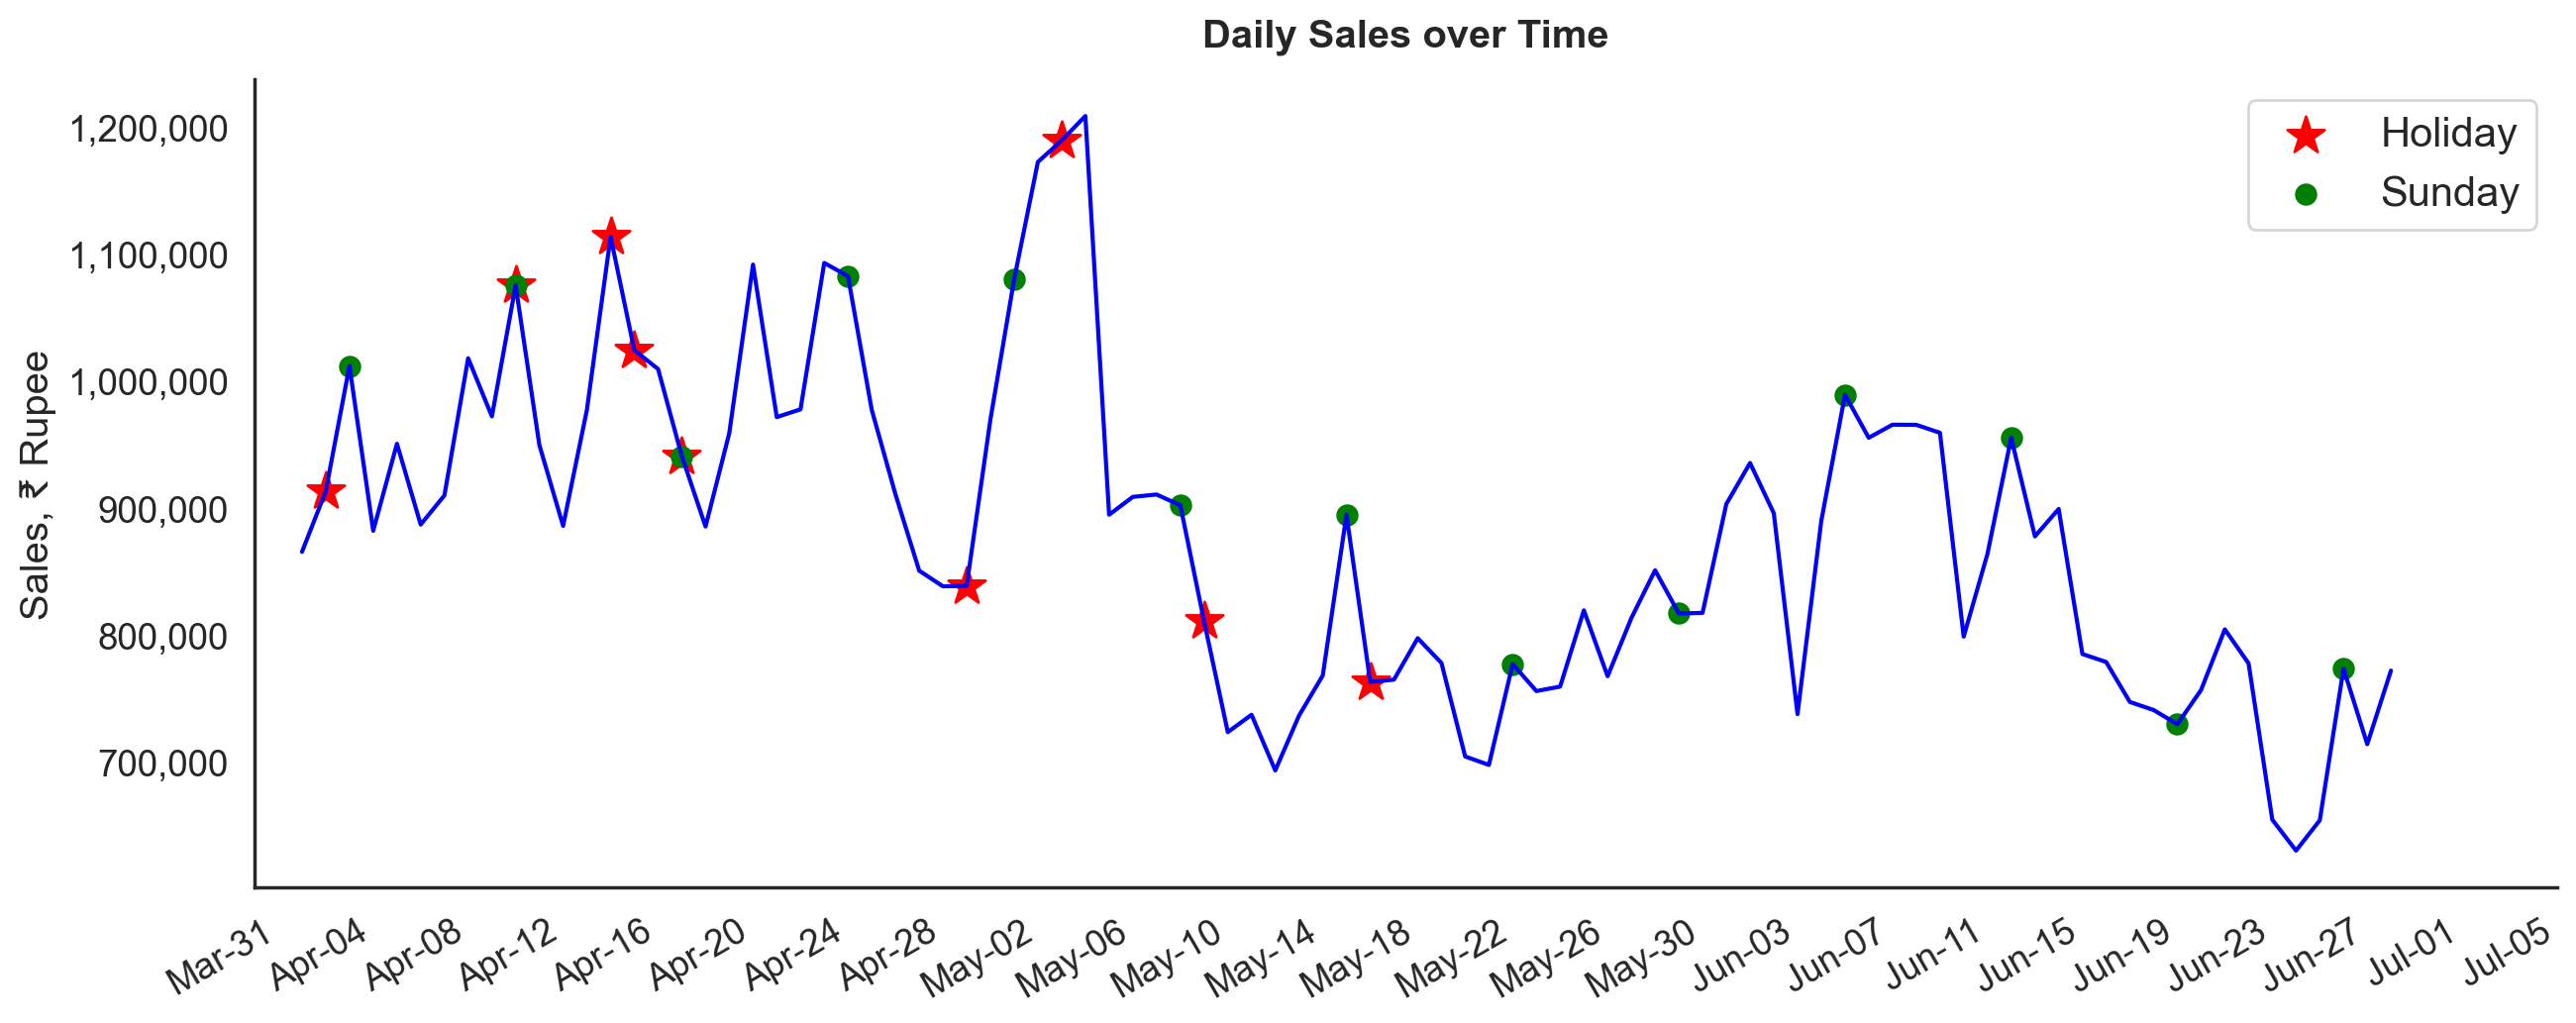

In [100]:
# %matplotlib



fig, ax = plt.subplots(figsize=(15, 6))

# plot the lines
ax.plot(daily_sales.index, daily_sales.values, c='blue')

# plot scatter plot for the dates that have holidays
holiday_scatter = ax.scatter(merged_hol.date, merged_hol.order_amount, marker='*', s=200, color='red', label='Holiday')

# plot scatter plot for the dates that fall on Sundays
ax.scatter(weekend_sales.index, weekend_sales.values, marker='o', s=50, color='green', label='Sunday')

plt.xlim(start_date, end_date) # set the x-axis label format and ticks
plt.title('Daily Sales over Time', fontweight='bold', y=1.02) # Title settings
plt.gca().spines['right'].set_visible(False) # removing the borders of the graph
plt.gca().spines['top'].set_visible(False)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # make the y-axis ticks have a comprehensive standard 
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))   # adjust the number for the interval of x-axis ticks
plt.gcf().autofmt_xdate() # format the date for the x-axis, so it is with an angle and Month-date format  
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)

ax.legend(fontsize=15, loc = 'best') # Legend size and position 

# CURSORS
mplcursors.cursor(holiday_scatter,  
                  hover=True,
                  highlight=True
                 ).connect(
    "add", lambda sel: sel.annotation.set_text(holiday_sales.index[sel.target.index].strftime('%b-%d') + ': ' + str(merged_hol.name[sel.target.index])))


plt.ylabel('Sales, ₹ Rupee') # y-axis labels
plt.show()

# Colored versions for the presentation 


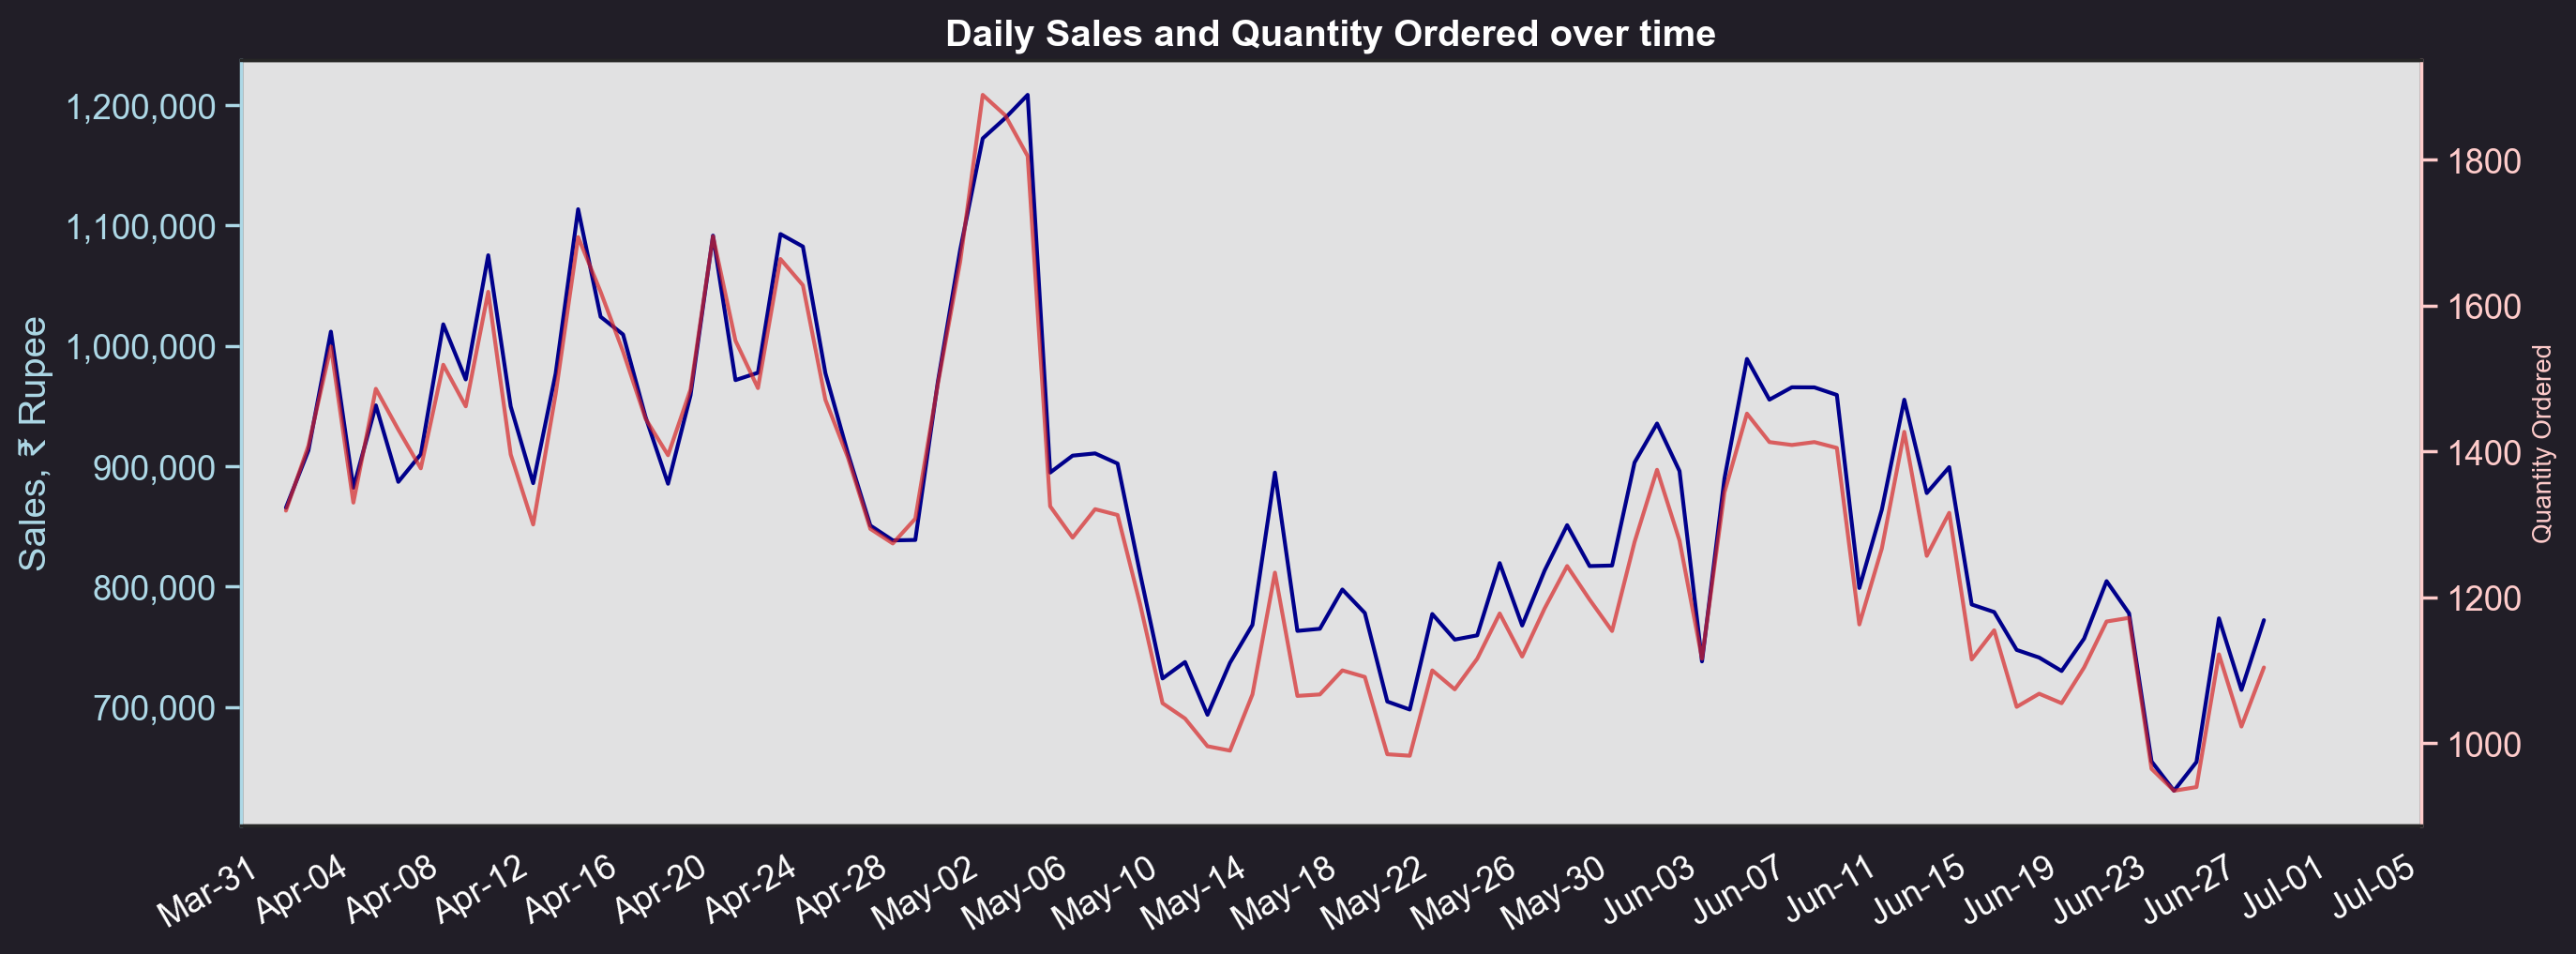

In [101]:
# convert date column to datetime
clean['date'] = pd.to_datetime(clean['date'])

# resample order_amount by date, and then sum the amounts by day
daily_sales = clean.set_index('date')['order_amount'].resample('D').sum()
daily_sales.index = pd.to_datetime(daily_sales.index)

daily_quantity_ordered = clean.set_index('date')['quantity_ordered'].resample('D').sum()
daily_quantity_ordered.index = pd.to_datetime(daily_quantity_ordered.index)

titles_col = 'white'
first_axis_col = 'lightblue'
second_axis_col = '#ffcccb'

# plot the daily sales and daily quantity ordered over time, adding labels and a legend
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(daily_sales.index, daily_sales.values, label='Total Sales Amount', c="darkblue")

# set the x-axis label format and ticks
plt.xlim(start_date, end_date)

plt.ylabel('Sales, ₹ Rupee',c=first_axis_col )
plt.title('Daily Sales and Quantity Ordered over time', c= titles_col,fontweight='bold')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.gcf().autofmt_xdate()

myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(daily_quantity_ordered.index, daily_quantity_ordered.values,
         color="tab:red",
         alpha=0.7,
         label='Total Quantity Ordered')
ax2.set_ylabel("Quantity Ordered",color=second_axis_col,fontsize=10)

ax2.spines['left'].set_color(first_axis_col)  
ax.tick_params(axis='y', colors=first_axis_col)
ax.tick_params(axis='x', colors='white')

ax2.spines['right'].set_color(second_axis_col)  
ax2.tick_params(axis='y', colors=second_axis_col)

ax.set_facecolor('#E1E1E2')
fig.patch.set_facecolor('#211e27')

plt.savefig('daily_sales_and_quantity.png',dpi=1000)
plt.show()


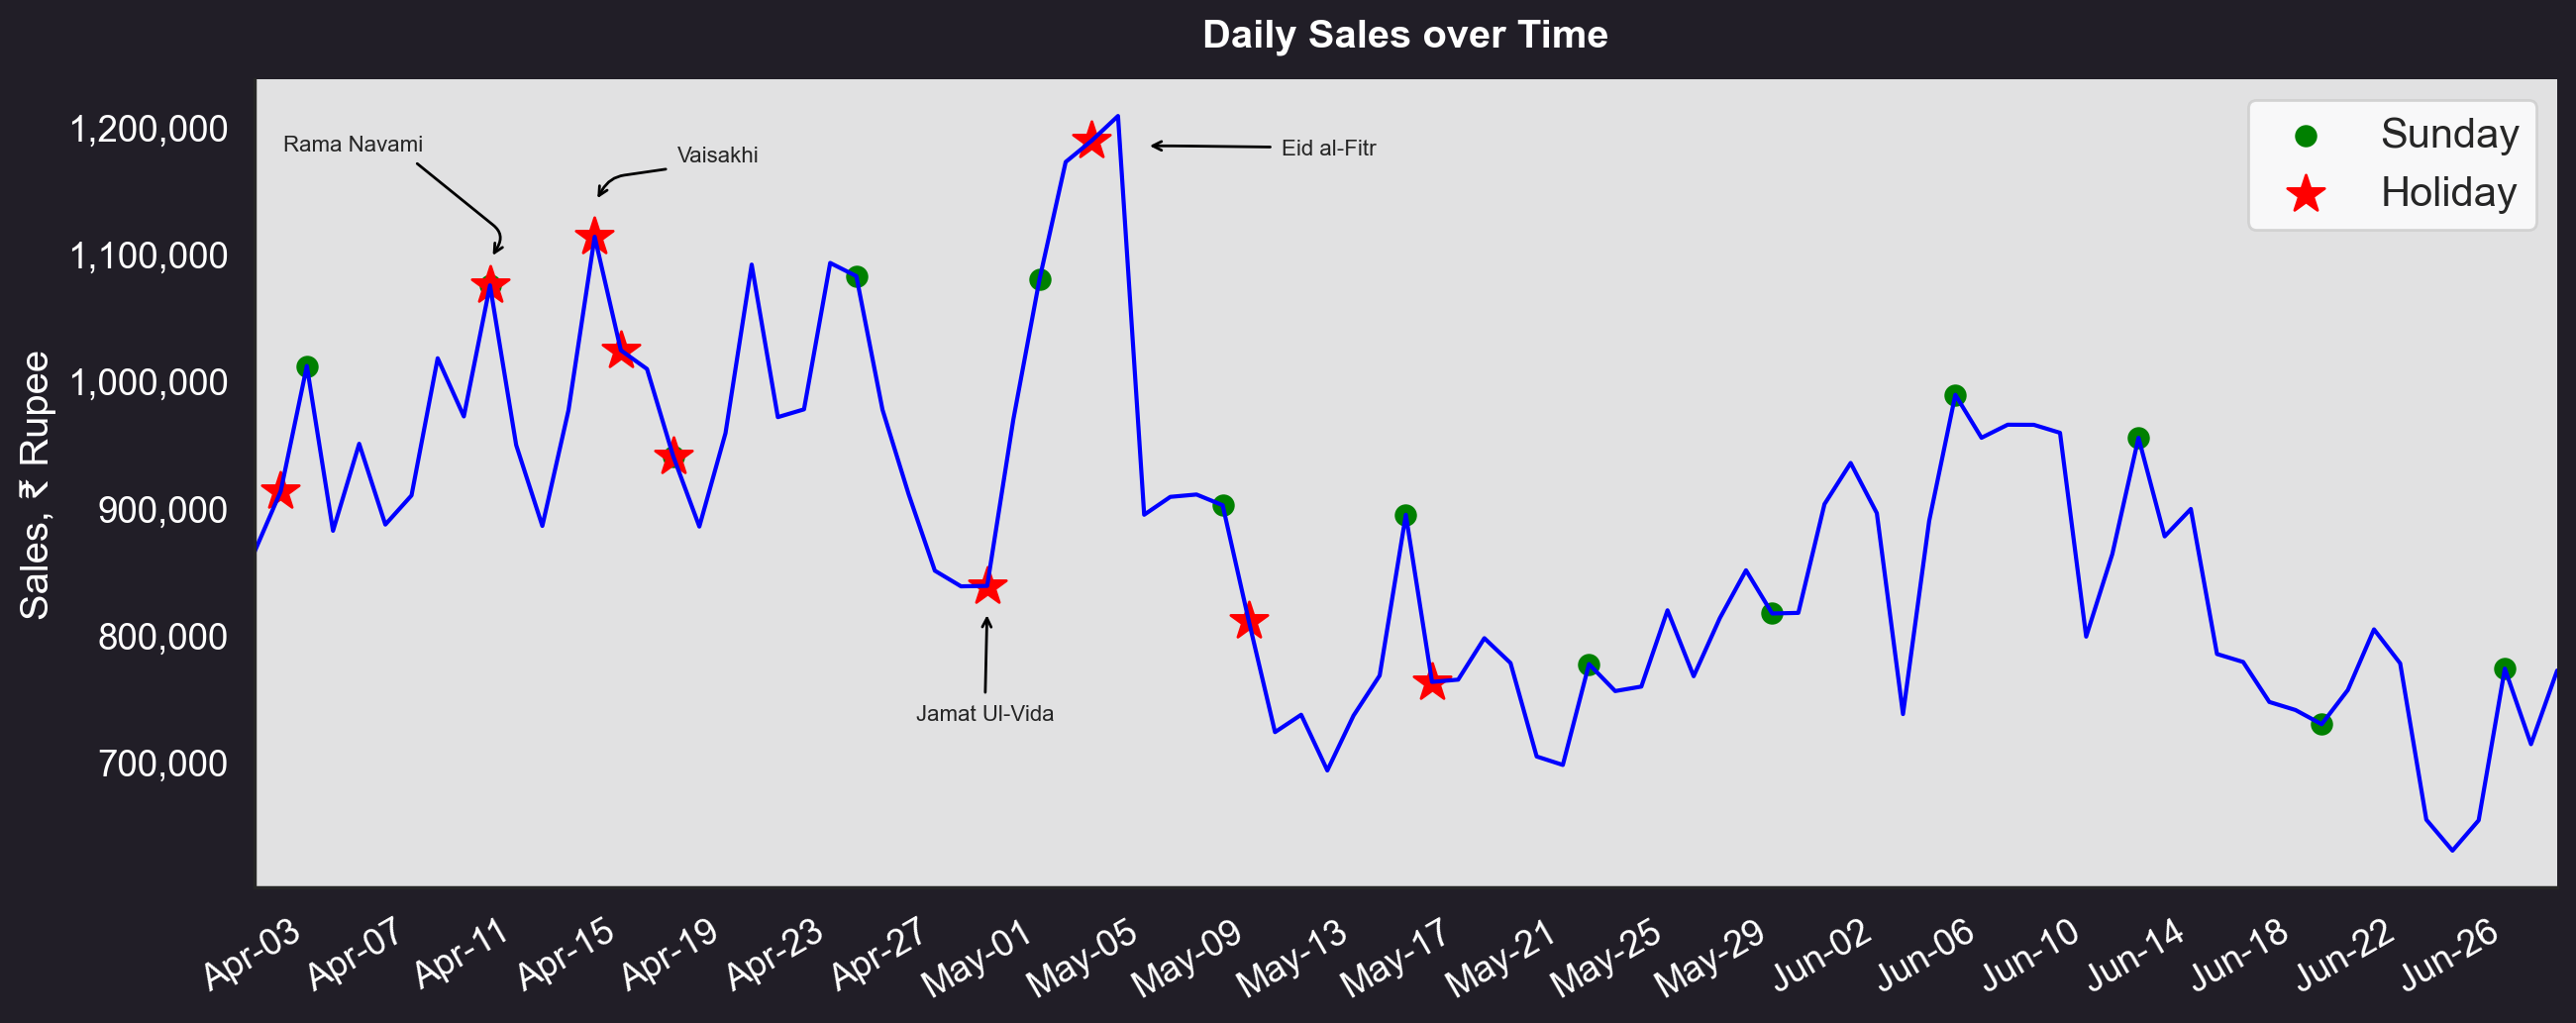

In [102]:
fig, ax = plt.subplots(figsize=(15, 6))


titles_col = 'white'
first_axis_col = 'lightblue'
second_axis_col = '#ffcccb'

# plot the lines
ax.plot(daily_sales.index, daily_sales.values, c='blue')

# plot scatter plot for the dates that fall on Sundays
ax.scatter(weekend_sales.index, weekend_sales.values, marker='o', s=50, color='green', label='Sunday')

# plot scatter plot for the dates that have holidays
ax.scatter(holiday_sales.index, holiday_sales.values, marker='*', s=200, color='red', label='Holiday')

start_date = pd.to_datetime('2022-04-01')  
end_date = pd.to_datetime('2022-06-28')
plt.xlim(start_date, end_date) # set the x-axis label format and ticks

plt.title('Daily Sales over Time', fontweight='bold', y=1.02, c=titles_col) # Title settings

plt.gca().spines['right'].set_visible(False) # removing the borders of the graph
plt.gca().spines['top'].set_visible(False)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # make the y-axis ticks have a comprehensive standard 
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))   # adjust the number for the interval of x-axis ticks

plt.gcf().autofmt_xdate() # format the date for the x-axis, so it is with an angle and Month-date format  
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)

ax.legend(fontsize=15, loc = 'best') # Legend size and position 

# Annotations 
dr = pd.date_range('2022-04-01', '2022-06-28', freq='1D') # Transformation for the dates as x-coordinates
ax.annotate(
    'Eid al-Fitr', # title 
    xy=(dr[34], 1185000), xycoords='data',  # coordinates of the point of arrow 
    xytext=(+50, -3), textcoords='offset points',  # bending style of the text title
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=40,angleB=0,armB=30,rad=15"), size=8)
    #dict(arrowstyle="->"),color='black', size=8)

ax.annotate(
    'Jamat Ul-Vida',
    xy=(dr[28], 820000), xycoords='data',
    xytext=(-26, -40), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=0,angleB=0,armB=0,rad=0"), size=8)
    #dict(arrowstyle="->"),color='black', size=8)

ax.annotate(
    'Rama Navami',
    xy=(dr[9], 1095000), xycoords='data',
    xytext=(-75, 40), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=40,angleB=60,armB=30,rad=15"), size=8)
    #dict(arrowstyle="->"),color='black',size=8)

ax.annotate(
    'Vaisakhi',
    xy=(dr[13], 1140000), xycoords='data',
    xytext=(30, 15), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='black',
        connectionstyle="arc,angleA=0,armA=40,angleB=60,armB=30,rad=15"), size=8)

ax.set_facecolor('#E1E1E2')
fig.patch.set_facecolor('#211e27')

ax.tick_params(axis='x', colors=titles_col)
ax.tick_params(axis='y', colors=titles_col)


plt.ylabel('Sales, ₹ Rupee', c=titles_col ) # y-axis labels
plt.savefig('daily_sales_time_colored.png',dpi=1000)
plt.show()

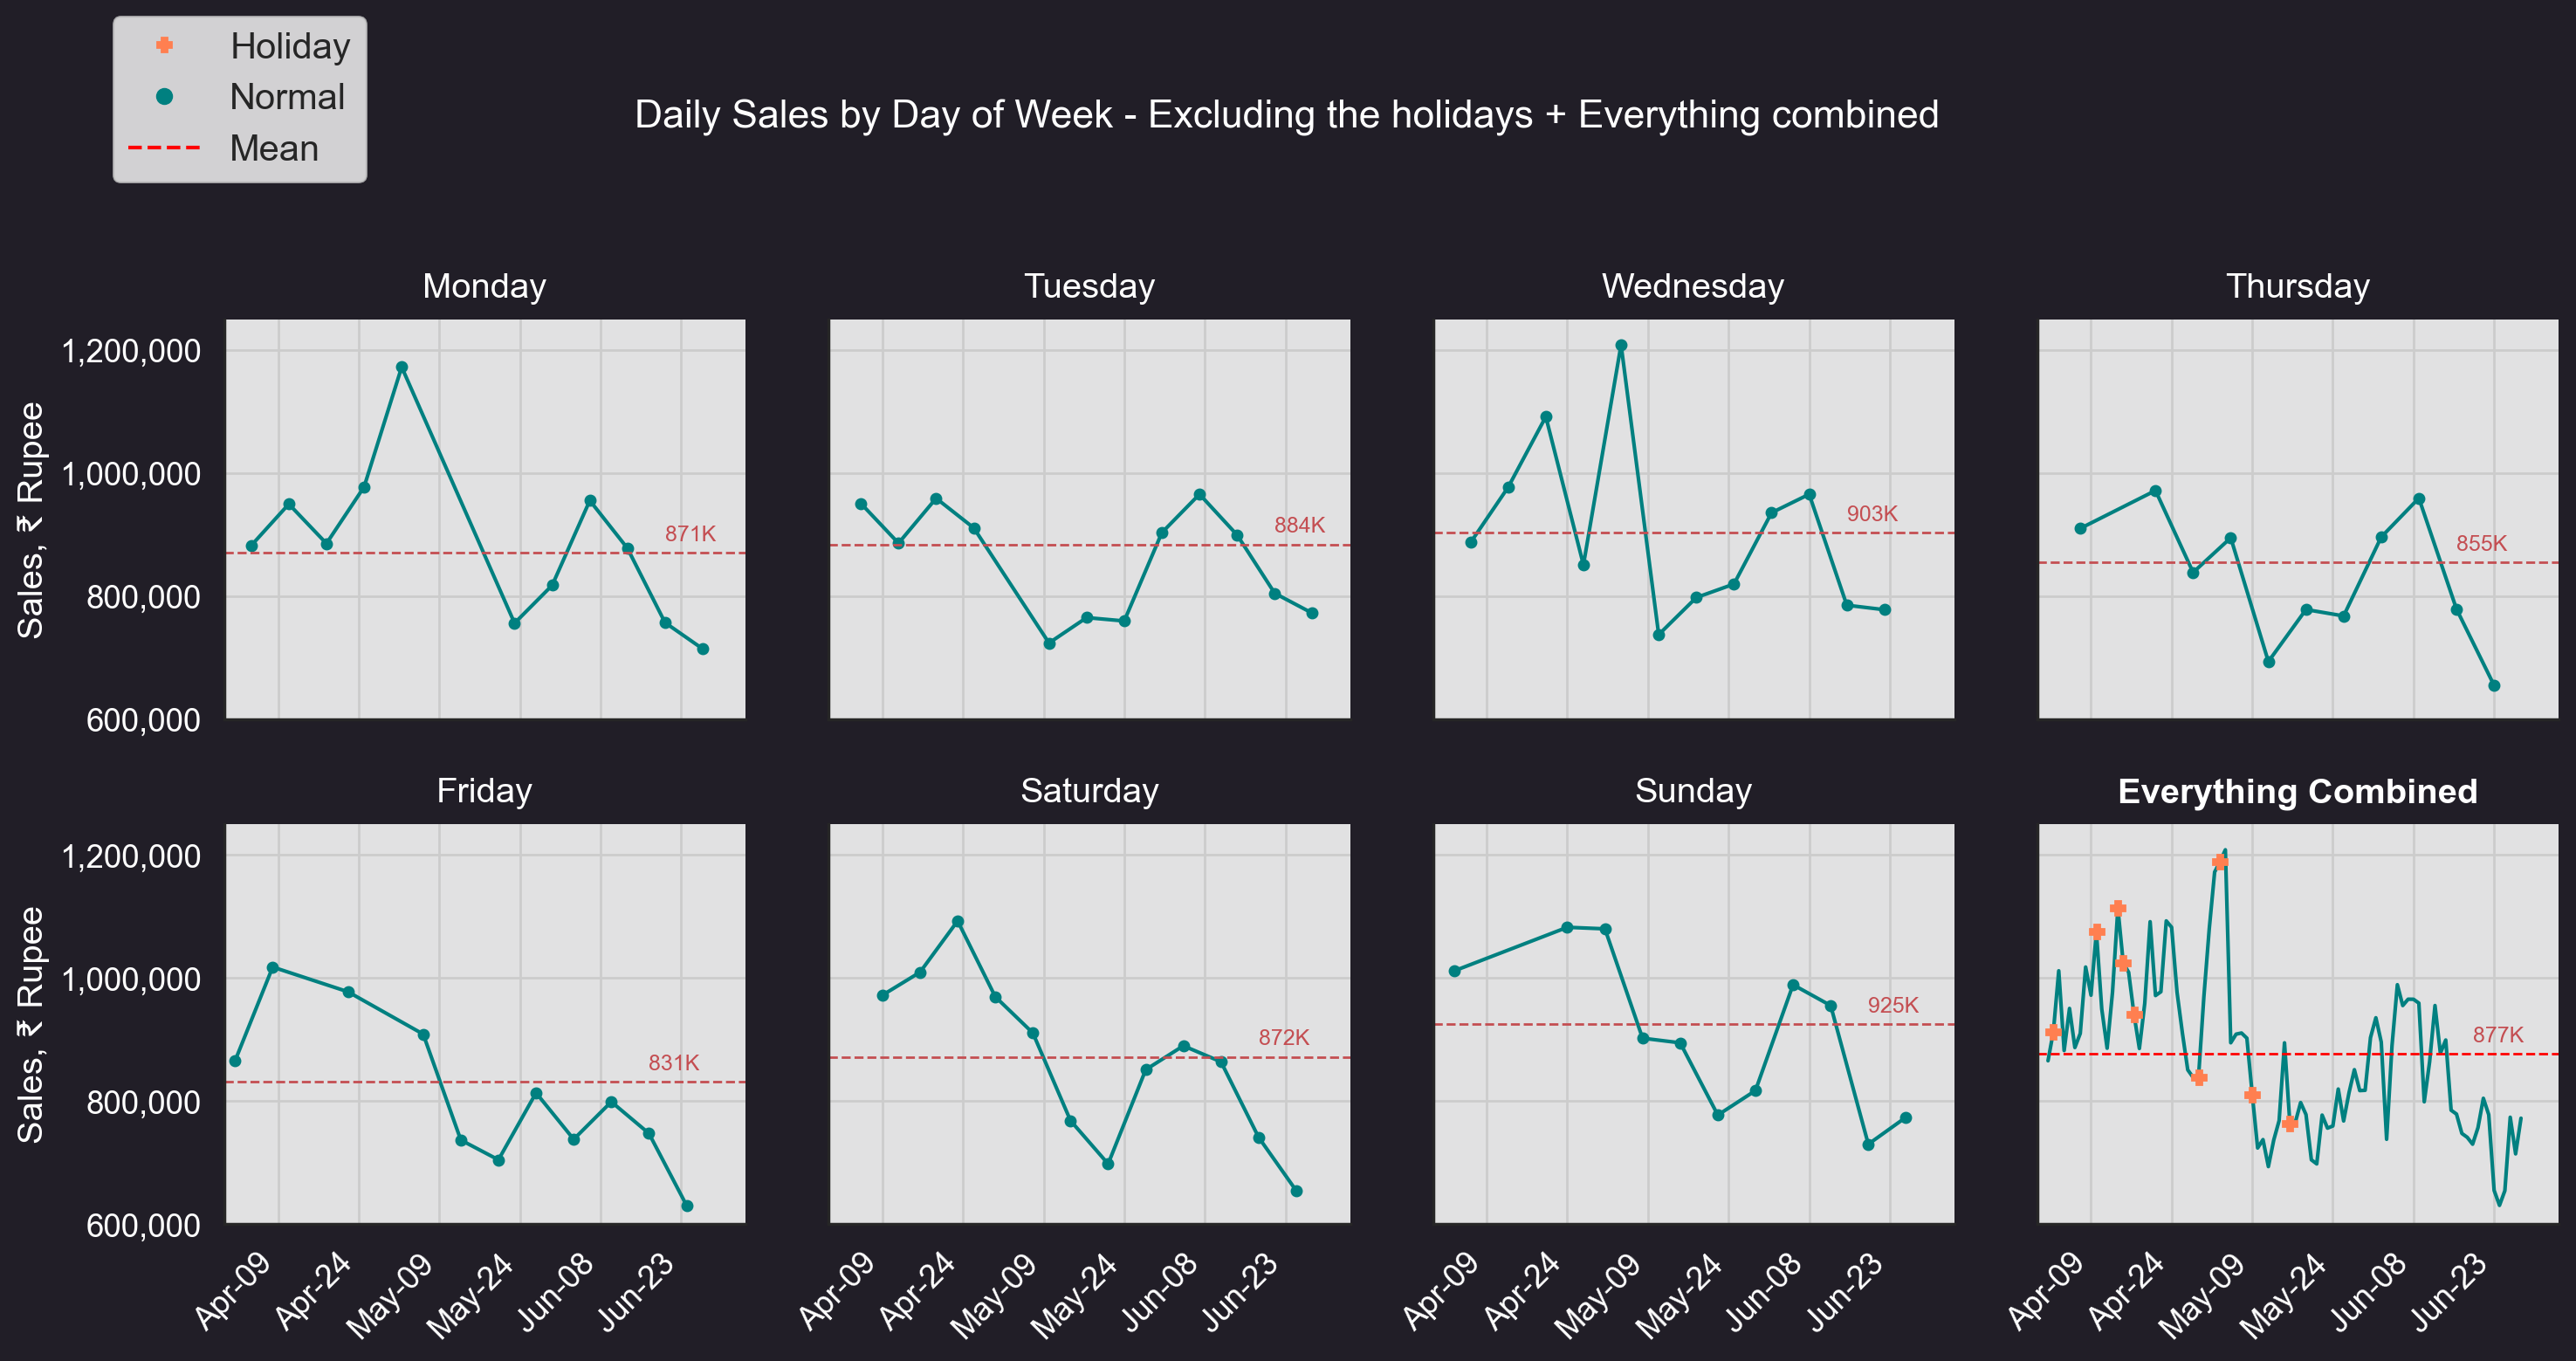

In [103]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7)) # creates two rows with 4 graphs
axes = axes.ravel() # flatten the list of the axis

titles_col = 'white'
first_axis_col = 'lightblue'
second_axis_col = '#ffcccb'
 
start_date = pd.to_datetime('2022-03-30') # sets the time frame for X-axes, slightly bigger for visibility
end_date = pd.to_datetime('2022-07-05')

x_labels_format = mdates.DateFormatter('%b-%d') # sets the format for the dates in X-axis

# loop for the first 7 graphs, that enumarates through the clenaned daily_sales_days 
for i, (day, data) in enumerate(daily_sales_days.groupby('day_of_week')):
    ax = axes[i]
    
    # filter out holiday dates
    holiday_dates = celebrations['date'].values
    mask = np.in1d(data['date'].values, holiday_dates)
    sales_data = data[~mask]  # only non-holiday sales data
    
    ax.plot(sales_data['date'], sales_data['order_amount'], 'o-', markersize=4, color='teal')# plot non-holiday sales data
    
    ax.axhline(means[day], color='r', linestyle='--', linewidth=1)  # mean line 
    
    ax.set_title(day, y=1.02, c=titles_col) # sub-title for the days
    ax.set_ylabel('Sales, ₹ Rupee', c=titles_col) # Y-axis labels 
    
    ax.set_ylim(600000, 1250000) # limits the graphs to see the dots better
    ax.set_xlim(start_date, end_date)   # assigns the time frame for X-axis
    
    ax.spines['right'].set_visible(False) # removes the borders 
    ax.spines['top'].set_visible(False)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # make the y-axis ticks have a comprehensive standard 
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # interval for the X-axis ticks 
    ax.xaxis.set_major_formatter(x_labels_format) # formating for the X-axis labels
    
    ax.grid(True) 
    # colors
    ax.tick_params(axis='x', colors=titles_col)
    ax.tick_params(axis='y', colors=titles_col) 
    ax.set_facecolor('#E1E1E2')
    
    mean_value = sales_data['order_amount'].mean()
    ax.text(sales_data['date'].iloc[-2], means[day]+20000, f"{human_format(means[day])}", 
            color='r', fontsize=9)
    
    if i < 4:   # remove ticks for the first row
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if i % 4 != 0:    # remove Y-axis titles for all graphs except the first column 
        ax.set_ylabel('')
    if i % 4 != 0:     # removes the ticks for Y-axis for top graphs 
        ax.yaxis.set_ticklabels([])
    
    
# Formatting for the final (8th) graph  
ax = axes[7]

ax.plot(daily_sales_days['date'], daily_sales_days['order_amount'], c= "teal") # draws the line

ax.plot(holiday_sales.index, holiday_sales.values, 'P', markersize=6, color='coral') # add the holiday dots

ax.axhline(daily_sales_days['order_amount'].mean(), color='red', linestyle='--', linewidth=1)    # draws a mean line  
ax.text(sales_data['date'].iloc[-2],  # text lines for the mean line 
        daily_sales_days['order_amount'].mean()+20000, 
        f"{human_format(daily_sales_days['order_amount'].mean())}", 
        color='r', fontsize=9)


ax.set_title('Everything Combined', fontweight='bold', y=1.02, c=titles_col) # Sub-title for the  8th graph 
 
ax.set_ylim(600000, 1250000) # limits the graphs to see the dots better
ax.set_xlim(start_date, end_date) # assigns the time frame for X-axis
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # make the y-axis ticks have a comprehensive standard 
plt.gca().axes.yaxis.set_ticklabels([]) # remove Y-axis lables for the 8th graph

ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # interval for the X-axis ticks 
ax.xaxis.set_major_formatter(x_labels_format)   # formating for the X-axis labels 
    
ax.set_facecolor('#E1E1E2')
fig.patch.set_facecolor('#211e27')

ax.tick_params(axis='x', colors=titles_col)
ax.tick_params(axis='y', colors=titles_col)    
    
ax.grid(True) # grid for the charts

fig.autofmt_xdate(rotation=45)  # rotate all the X-axis ticks for ease of reading
    
plt.suptitle('Daily Sales by Day of Week - Excluding the holidays + Everything combined', fontsize=16, y = 1.05, c=titles_col)

plt.tight_layout() # put graphs closer together

# custom features for the Legend
custom = [Line2D([], [], marker='P',color ="coral", markersize=6, linestyle='None'),
          Line2D([], [], marker='o',color ="teal", markersize=6, linestyle='None'),
          Line2D([], [], marker='',color ="red", markersize=10, linestyle='dashed')]
fig.legend(custom, ['Holiday', 'Normal','Mean'], loc='center', fontsize=15, bbox_to_anchor=(0.1,1.05))
plt.savefig('sales_day_of_week_final.png',dpi=1000, bbox_inches='tight')
plt.show()